In [1]:
%reset -f

In [3]:
from bs4 import BeautifulSoup
import nbformat
from nbformat.v4 import output_from_msg
from nbconvert.preprocessors import ExecutePreprocessor
import markdown

# Lire le notebook
with open("EDA.ipynb") as f:
    nb = nbformat.read(f, as_version=4)

# Récupérer le contenu Markdown des cellules
md_content = ""
for cell in nb.cells:
    if cell.cell_type == "markdown":
        md_content += cell.source + "\n"

# Parser le contenu Markdown pour extraire les titres
html_content = markdown.markdown(md_content)
title_tags = ["h1", "h2", "h3", "h4", "h5", "h6"]
titles = [t.text for t in BeautifulSoup(html_content, "html.parser").find_all(title_tags)]

# Afficher les titres et créer un sommaire
#print("Titres :")
#for title in titles:
#    print(title)

print("Sommaire :")
for i, title in enumerate(titles):
    print(f"{i+1}. {title}")


Titres :
Fonction de préprocessing fusion des dataframe
HC_desc
app_test
app_train
balance
bureau
cc_balance
installmnt
POS
prv_app
sample
Controle de l'useage de la mémoire
Changement de format int vers object
Passage des valeurs numériques de int64 à int8
Passage des valeurs numériques de float64 à float16
Traitement des Nan
Traitement des Nan des features numériques
Analyse univariée du df app_train
Analyse exploratoire univariée
Distribution des variables catégorielles
Statistiques générales
Distribution des variables numérique
Sommaire :
1. Fonction de préprocessing fusion des dataframe
2. HC_desc
3. app_test
4. app_train
5. balance
6. bureau
7. cc_balance
8. installmnt
9. POS
10. prv_app
11. sample
12. Controle de l'useage de la mémoire
13. Changement de format int vers object
14. Passage des valeurs numériques de int64 à int8
15. Passage des valeurs numériques de float64 à float16
16. Traitement des Nan
17. Traitement des Nan des features numériques
18. Analyse univariée du df a

In [4]:
import numpy as np
import pandas as pd 
import moduleexplo

from tabulate import tabulate

from sklearn.preprocessing import LabelEncoder

import os
 
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import datetime
now  = datetime.datetime.now().isoformat()

print('Lancé le      : ' + now)

Lancé le      : 2023-07-25T10:41:23.587337


In [5]:
# Réglage de l'affichage de données
pd.set_option('display.max_row',250)
pd.set_option('display.max_column',300)
pd.set_option('display.precision', 5)

In [6]:
#Importation du jeu de données
missing_values = ["n/a", "na", "--","nan","NaN"]
app_test = pd.read_csv('application_test.csv', decimal=".", index_col=0, encoding='utf_8', low_memory=False,na_values = missing_values).reset_index()
app_train = pd.read_csv('application_train.csv', decimal=".", index_col=0, encoding='utf_8', low_memory=False,na_values = missing_values).reset_index()
balance = pd.read_csv('bureau_balance.csv', decimal=".", index_col=0, encoding='utf_8', low_memory=False,na_values = missing_values).reset_index()
bureau = pd.read_csv('bureau.csv', decimal=".", index_col=0, encoding='utf_8', low_memory=False,na_values = missing_values).reset_index()
cc_balance = pd.read_csv('credit_card_balance.csv', decimal=".", index_col=0, encoding='utf_8', low_memory=False,na_values = missing_values).reset_index()
hc_desc = pd.read_csv('HomeCredit_columns_description.csv', decimal=".", index_col=None, encoding='latin1', low_memory=False, na_values=missing_values).reset_index()
installmnt = pd.read_csv('installments_payments.csv', decimal=".", index_col=0, encoding='utf_8', low_memory=False,na_values = missing_values).reset_index()
POS = pd.read_csv('POS_CASH_balance.csv', decimal=".", index_col=0, encoding='utf_8', low_memory=False,na_values = missing_values).reset_index()
prv_app = pd.read_csv('previous_application.csv', decimal=".", index_col=0, encoding='utf_8', low_memory=False,na_values = missing_values).reset_index()
sample = pd.read_csv('sample_submission.csv', decimal=".", index_col=0, encoding='utf_8', low_memory=False,na_values = missing_values).reset_index()

In [7]:
#Format de pourcentage avec 2 virgules en décimale
def format_percentage(value):
    return "{0:.2f}%".format(value * 100)

In [8]:
# Affichage des informations du dataframe
def info(df):

    display(df.head(3))
    print(f'Taille :-------------------------------------------------------------- {df.shape}')
    print("--"*50)
    print(f'Types :{df.dtypes.value_counts()}')
    print("--"*50)
    print(f'Types :{df.dtypes}')
    print("--"*50)
    print("Valeurs manquantes par colonnes (%): ")
    print((((df.isna().sum()/df.shape[0])*100).round(2)).sort_values(ascending=False))
    print("--"*50)
    print("Valeurs différentes par variables : ")
    for cols in df:
        if df[cols].nunique() < 30:
            print(f'{cols :-<70} {df[cols].unique()}')
        else:
            print(f'{cols :-<70} contient {df[cols].nunique()} valeurs différentes')
    print("--"*50)
    print(f"Nombre de doublons : {df.duplicated().sum()}")


# Fonction de comptage de lignes et de colonne du dataset, affichage d'une representation\
# graphique des sonnées manquantes

def valeurs(df):

    # Affichage du nombre de lignes et de colonnes
    lignes = len(df.index)
    colonnes = len(df.columns)
    print('Le nombre de lignes du fichier est de ', lignes, 'et de son nombre de colonnes est de', colonnes)

    # Representation graphique des données manquantes
    sns.set(rc={'figure.figsize': (20, 10)})
    sns.heatmap(df.isnull(), cbar=False)
    plt.rcParams.update({'font.size': 30})
    plt.tight_layout()
    plt.title('Representation graphique des valeurs manquantes', size=15)
    plt.plot()


def manquant(df):

    # Affichage des colonnes pour lesquelles il manque des données en pourcentage
    nb_na_sum = df.isnull().sum()
    round(nb_na_sum[nb_na_sum > 0]*100, 2).sort_values(ascending=True)
    print(nb_na_sum)
    # Affichage des colonnes pour lesquelles il manque des données en pourcentage
    nb_na = df.isnull().mean()
    round(nb_na[nb_na > 0]*100, 2).sort_values(ascending=True)
    print(nb_na)
    # Taux de remplissage moyen
    nulles = df.isnull().sum().sum()
    nb_donnees_tot = np.product(df.shape)
    pourcentage_valeurs = round(df.isna().sum().sum() / df.size * 100, 2)
    print('Le jeu de données contient', nulles, 'valeurs manquantes pour ', nb_donnees_tot, 'valeurs, soit',
          pourcentage_valeurs, '%')


# Format des données
def format_data(df):

    # On affiche le format des données
    print(df.shape[0], "produits")
    print(df.shape[1], "variables")
    print("\nType des variables:\n", df.dtypes.value_counts())
    # On affiche un graphique
    df.dtypes.value_counts().plot.pie()
    plt.title('Répartition du type de variable', size=15)
    plt.plot()


def doublons(df, colonne):
    # Ne pas oublier les '' dans le nom de la colonne
    data_doublons = df.loc[:, colonne:].columns
    data_double = df.duplicated(subset=data_doublons, keep='first').value_counts()
    return data_double


# fonction pour afficher la table de description statistique
def stat_descriptives(df, variables):
    warnings.filterwarnings('ignore')
    """
    Statistiques descriptives moyenne, médiane, variance, écart-type,
    skewness et kurtosis du dataframe transmis en paramètre
    ----------
    @param IN : dataframe : DataFrame, obligatoire
                liste_variables : colonne dont on veut voir les stat descr
    @param OUT : dataframe des statistiques descriptives
    """
    liste_mean = ['mean']
    liste_median = ['median']
    liste_var = ['var']
    liste_std = ['std']
    liste_skew = ['skew']
    liste_kurtosis = ['kurtosis']
    liste_mode = ['mode']
    liste_cols = ['Desc']
    liste_max = ['Max']
    liste_min = ['Min']

    for col in variables:
        liste_mean.append(df[col].mean())
        liste_median.append(df[col].median())
        liste_var.append(df[col].var(ddof=0))
        liste_std.append(df[col].std(ddof=0))
        liste_skew.append(df[col].skew())
        liste_kurtosis.append(df[col].kurtosis())
        liste_cols.append(col)
        liste_mode.append(df[col].mode().to_string())
        liste_min.append(df[col].min())
        liste_max.append(df[col].max())

    data_stats = [liste_mean, liste_median, liste_var, liste_std, liste_skew,
                  liste_kurtosis, liste_mode, liste_min, liste_max]
    df_stat = pd.DataFrame(data_stats, columns=liste_cols)

    return df_stat.style.hide_index()

import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

def distribution(dataset):
    warnings.filterwarnings('ignore')

    sns.set_context("talk")
    sns.set_style("whitegrid")
    
    num_cols = dataset.select_dtypes(include=[np.number]).columns
    num_features = len(num_cols)
    
    fig, axes = plt.subplots(nrows=int(np.ceil(num_features / 3)), ncols=3, figsize=(21, 6 * int(np.ceil(num_features / 3))))
    axes = axes.flatten()

    for i, colonne in enumerate(num_cols):
        ax = axes[i]

        column_data = dataset[colonne].copy()
        column_data.replace([np.inf, -np.inf], np.nan, inplace=True)
        column_data.dropna(inplace=True)

        bins = int(np.sqrt(len(column_data)))
        kstest = stats.kstest(column_data, 'norm')
        sns.distplot(column_data, fit=stats.norm, kde=False, bins=bins, ax=ax)
        ax.set_title("Distribution vs loi normale : {}".format(colonne))
        ax.text(1, 1, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue,
                                                                                         kstest.statistic),
                horizontalalignment='right',
                verticalalignment='top',
                style='italic', transform=ax.transAxes, fontsize=12,
                bbox={'facecolor': '#00afe6', 'alpha': 0.5, 'pad': 0})

    fig.tight_layout()
    plt.show()


def distib_feature(dataframe, feature):
    plt.figure(figsize=(10, 6))
    plt.title("Distribution de %s" % feature)
    sns.distplot(dataframe[feature].dropna(), kde=True, bins=100)
    plt.show()


In [9]:
def convert_float64_to_float16(dataframes):
    for df_name in dataframes:
        dataframe = dataframes[df_name]
        float_cols = dataframe.select_dtypes(include=['float64']).columns

        for col in float_cols:
            if not col.startswith('SK_ID_'):
                dataframe[col] = dataframe[col].astype('float16')
    
    return dataframes

def convert_int64_to_int8(dataframes):
    for df_name in dataframes:
        dataframe = dataframes[df_name]
        int_cols = dataframe.select_dtypes(include=['int64']).columns

        for col in int_cols:
            if not col.startswith('SK_ID_'):
                dataframe[col] = dataframe[col].astype('int8')
    
    return dataframes


# Fonction de préprocessing fusion des dataframe 

In [10]:
from contextlib import contextmanager

@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

In [11]:
# One-hot encoding for categorical columns with get_dummies
def one_hot_encoder(df, nan_as_category=True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns
                           if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns=categorical_columns,
                        dummy_na=nan_as_category)
    new_columns = [c for c in df.columns
                   if c not in original_columns]
    return df, new_columns

In [12]:
dataframes = {
    'app_test': app_test,
    'app_train': app_train,
    'balance': balance,
    'bureau': bureau,
    'cc_balance': cc_balance,
    'hc_desc': hc_desc,
    'installmnt': installmnt,
    'POS': POS,
    'prv_app': prv_app,
    'sample': sample
}


In [13]:
filenames = [
    'application_test.csv',
    'application_train.csv',
    'bureau_balance.csv',
    'bureau.csv',
    'credit_card_balance.csv',
    'HomeCredit_columns_description.csv',
    'installments_payments.csv',
    'POS_CASH_balance.csv',
    'previous_application.csv',
    'sample_submission.csv'
]


In [14]:
description = ["application_test = Static data for all applications. One row represents one loan in our data sample",
               "application_train = Static data for all applications. One row represents one loan in our data sample",
               "bureau_balance = Monthly balances of previous credits in Credit Bureau",
               "bureau = All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample)",
               "credit_card_balance = Monthly balance snapshots of previous credit cards that the applicant has with Home Credit",
               "HomeCredit_columns_description = This file contains descriptions for the columns in the various data files",
               "installments_payments = Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample", 
               "POS_CASH_balance = Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit",
               "previous_application = All previous applications for Home Credit loans of clients who have loans in our sample",
               "sample_submission = ..."]

In [15]:
import pandas as pd

def get_file_info(filename):
    missing_values = ["n/a", "na", "--", "nan", "NaN"]
    df = pd.read_csv(filename, decimal=".", index_col=0, encoding='latin-1', low_memory=False, na_values=missing_values).reset_index()
    info = {
        'Nb lignes': len(df.index),
        'Nb colonnes': len(df.columns),
        # Add other file info as needed
        'Nom des Dataframes': filename.split('.')[0]
    }
    return info


In [16]:
files_description = []
for filename in filenames:
    file_info = get_file_info(filename)
    files_description.append(file_info)


In [17]:
files_description_df = pd.DataFrame(files_description)
files_description_df.set_index('Nom des Dataframes', inplace=True)
files_description_df


Nb lignes  Nb colonnes
Nom des Dataframes                                    
application_test                    48744          121
application_train                  307511          122
bureau_balance                   27299925            3
bureau                            1716428           17
credit_card_balance               3840312           23
HomeCredit_columns_description        219            5
installments_payments            13605401            8
POS_CASH_balance                 10001358            8
previous_application              1670214           37
sample_submission                   48744            2

In [18]:
import pandas as pd

def format_percentage(value):
    return f'{value:.2%}'

def get_file_info(filename):
    missing_values = ["n/a", "na", "--", "nan", "NaN"]
    df = pd.read_csv(filename, decimal=".", index_col=0, encoding='latin-1', low_memory=False, na_values=missing_values).reset_index()

    info = {
        'Nb lignes': len(df.index),
        'Nb colonnes': len(df.columns),
        'Taux remplissage moyen': format_percentage(df.notna().mean().mean()),
        'Doublons': df.duplicated().sum(),
        'Description': description[0] ,
        'Nom des Dataframes': filename.split('.')[0]
    }
    return info

files_description = []
for filename in filenames:
    file_info = get_file_info(filename)
    files_description.append(file_info)

files_description_df = pd.DataFrame(files_description)
files_description_df.set_index('Nom des Dataframes', inplace=True)
files_description_df


Nb lignes  Nb colonnes Taux remplissage moyen  \
Nom des Dataframes                                                              
application_test                    48744          121                 76.19%   
application_train                  307511          122                 75.60%   
bureau_balance                   27299925            3                100.00%   
bureau                            1716428           17                 86.50%   
credit_card_balance               3840312           23                 93.35%   
HomeCredit_columns_description        219            5                 87.85%   
installments_payments            13605401            8                 99.99%   
POS_CASH_balance                 10001358            8                 99.93%   
previous_application              1670214           37                 82.02%   
sample_submission                   48744            2                100.00%   

                                Doublons  \
Nom des Dataframes                         
application_test                       0   
application_train                      0   
bureau_balance                         0   
bureau                                 0   
credit_card_balance                    0   
HomeCredit_columns_description         0   
installments_payments                  0   
POS_CASH_balance                       0   
previous_application                   0   
sample_submission                      0   

                                                                      Description  
Nom des Dataframes                                                                 
application_test                application_test = Static data for all applica...  
application_train               application_test = Static data for all applica...  
bureau_balance                  application_test = Static data for all applica...  
bureau                          application_test = Static data for all applica...  
credit_card_balance             application_test = Static data for all applica...  
HomeCredit_columns_description  application_test = Static data for all applica...  
installments_payments           application_test = Static data for all applica...  
POS_CASH_balance                application_test = Static data for all applica...  
previous_application            application_test = Static data for all applica...  
sample_submission               application_test = Static data for all applica...

In [19]:
#variables for each dataframe
pd.DataFrame([app_test.columns,
              app_train.columns,
              balance.columns,
              bureau.columns,
              cc_balance.columns,
              hc_desc.columns,
              installmnt.columns,
              POS.columns,
              prv_app.columns,
              sample.columns],
             index = [
    'application_test.csv',
    'application_train.csv',
    'bureau_balance.csv',
    'bureau.csv',
    'credit_card_balance.csv',
    'HomeCredit_columns_description.csv',
    'installments_payments.csv',
    'POS_CASH_balance.csv',
    'previous_application.csv',
    'sample_submission.csv']).T

application_test.csv         application_train.csv  \
0                      SK_ID_CURR                    SK_ID_CURR   
1              NAME_CONTRACT_TYPE                        TARGET   
2                     CODE_GENDER            NAME_CONTRACT_TYPE   
3                    FLAG_OWN_CAR                   CODE_GENDER   
4                 FLAG_OWN_REALTY                  FLAG_OWN_CAR   
5                    CNT_CHILDREN               FLAG_OWN_REALTY   
6                AMT_INCOME_TOTAL                  CNT_CHILDREN   
7                      AMT_CREDIT              AMT_INCOME_TOTAL   
8                     AMT_ANNUITY                    AMT_CREDIT   
9                 AMT_GOODS_PRICE                   AMT_ANNUITY   
10                NAME_TYPE_SUITE               AMT_GOODS_PRICE   
11               NAME_INCOME_TYPE               NAME_TYPE_SUITE   
12            NAME_EDUCATION_TYPE              NAME_INCOME_TYPE   
13             NAME_FAMILY_STATUS           NAME_EDUCATION_TYPE   
14              NAME_HOUSING_TYPE            NAME_FAMILY_STATUS   
15     REGION_POPULATION_RELATIVE             NAME_HOUSING_TYPE   
16                     DAYS_BIRTH    REGION_POPULATION_RELATIVE   
17                  DAYS_EMPLOYED                    DAYS_BIRTH   
18              DAYS_REGISTRATION                 DAYS_EMPLOYED   
19                DAYS_ID_PUBLISH             DAYS_REGISTRATION   
20                    OWN_CAR_AGE               DAYS_ID_PUBLISH   
21                     FLAG_MOBIL                   OWN_CAR_AGE   
22                 FLAG_EMP_PHONE                    FLAG_MOBIL   
23                FLAG_WORK_PHONE                FLAG_EMP_PHONE   
24               FLAG_CONT_MOBILE               FLAG_WORK_PHONE   
25                     FLAG_PHONE              FLAG_CONT_MOBILE   
26                     FLAG_EMAIL                    FLAG_PHONE   
27                OCCUPATION_TYPE                    FLAG_EMAIL   
28                CNT_FAM_MEMBERS               OCCUPATION_TYPE   
29           REGION_RATING_CLIENT               CNT_FAM_MEMBERS   
30    REGION_RATING_CLIENT_W_CITY          REGION_RATING_CLIENT   
31     WEEKDAY_APPR_PROCESS_START   REGION_RATING_CLIENT_W_CITY   
32        HOUR_APPR_PROCESS_START    WEEKDAY_APPR_PROCESS_START   
33     REG_REGION_NOT_LIVE_REGION       HOUR_APPR_PROCESS_START   
34     REG_REGION_NOT_WORK_REGION    REG_REGION_NOT_LIVE_REGION   
35    LIVE_REGION_NOT_WORK_REGION    REG_REGION_NOT_WORK_REGION   
36         REG_CITY_NOT_LIVE_CITY   LIVE_REGION_NOT_WORK_REGION   
37         REG_CITY_NOT_WORK_CITY        REG_CITY_NOT_LIVE_CITY   
38        LIVE_CITY_NOT_WORK_CITY        REG_CITY_NOT_WORK_CITY   
39              ORGANIZATION_TYPE       LIVE_CITY_NOT_WORK_CITY   
40                   EXT_SOURCE_1             ORGANIZATION_TYPE   
41                   EXT_SOURCE_2                  EXT_SOURCE_1   
42                   EXT_SOURCE_3                  EXT_SOURCE_2   
43                 APARTMENTS_AVG                  EXT_SOURCE_3   
44               BASEMENTAREA_AVG                APARTMENTS_AVG   
45    YEARS_BEGINEXPLUATATION_AVG              BASEMENTAREA_AVG   
46                YEARS_BUILD_AVG   YEARS_BEGINEXPLUATATION_AVG   
47                 COMMONAREA_AVG               YEARS_BUILD_AVG   
48                  ELEVATORS_AVG                COMMONAREA_AVG   
49                  ENTRANCES_AVG                 ELEVATORS_AVG   
50                  FLOORSMAX_AVG                 ENTRANCES_AVG   
51                  FLOORSMIN_AVG                 FLOORSMAX_AVG   
52                   LANDAREA_AVG                 FLOORSMIN_AVG   
53           LIVINGAPARTMENTS_AVG                  LANDAREA_AVG   
54                 LIVINGAREA_AVG          LIVINGAPARTMENTS_AVG   
55        NONLIVINGAPARTMENTS_AVG                LIVINGAREA_AVG   
56              NONLIVINGAREA_AVG       NONLIVINGAPARTMENTS_AVG   
57                APARTMENTS_MODE             NONLIVINGAREA_AVG   
58              BASEMENTAREA_MODE               APARTMENTS_M

## HC_desc

This file contains descriptions for the columns in the various data files.

In [20]:
info(hc_desc)

index  Unnamed: 0                         Table                 Row  \
0      0           1  application_{train|test}.csv          SK_ID_CURR   
1      1           2  application_{train|test}.csv              TARGET   
2      2           5  application_{train|test}.csv  NAME_CONTRACT_TYPE   

                                         Description Special  
0                           ID of loan in our sample     NaN  
1  Target variable (1 - client with payment diffi...     NaN  
2        Identification if loan is cash or revolving     NaN

Taille :-------------------------------------------------------------- (219, 6)
----------------------------------------------------------------------------------------------------
Types :object    4
int64     2
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Types :index           int64
Unnamed: 0      int64
Table          object
Row            object
Description    object
Special        object
dtype: object
----------------------------------------------------------------------------------------------------
Valeurs manquantes par colonnes (%): 
Special        60.73
index           0.00
Unnamed: 0      0.00
Table           0.00
Row             0.00
Description     0.00
dtype: float64
----------------------------------------------------------------------------------------------------
Valeurs différentes par variables : 
index----------------------------------------------------------------- contient 219 valeur

Le nombre de lignes du fichier est de  219 et de son nombre de colonnes est de 6


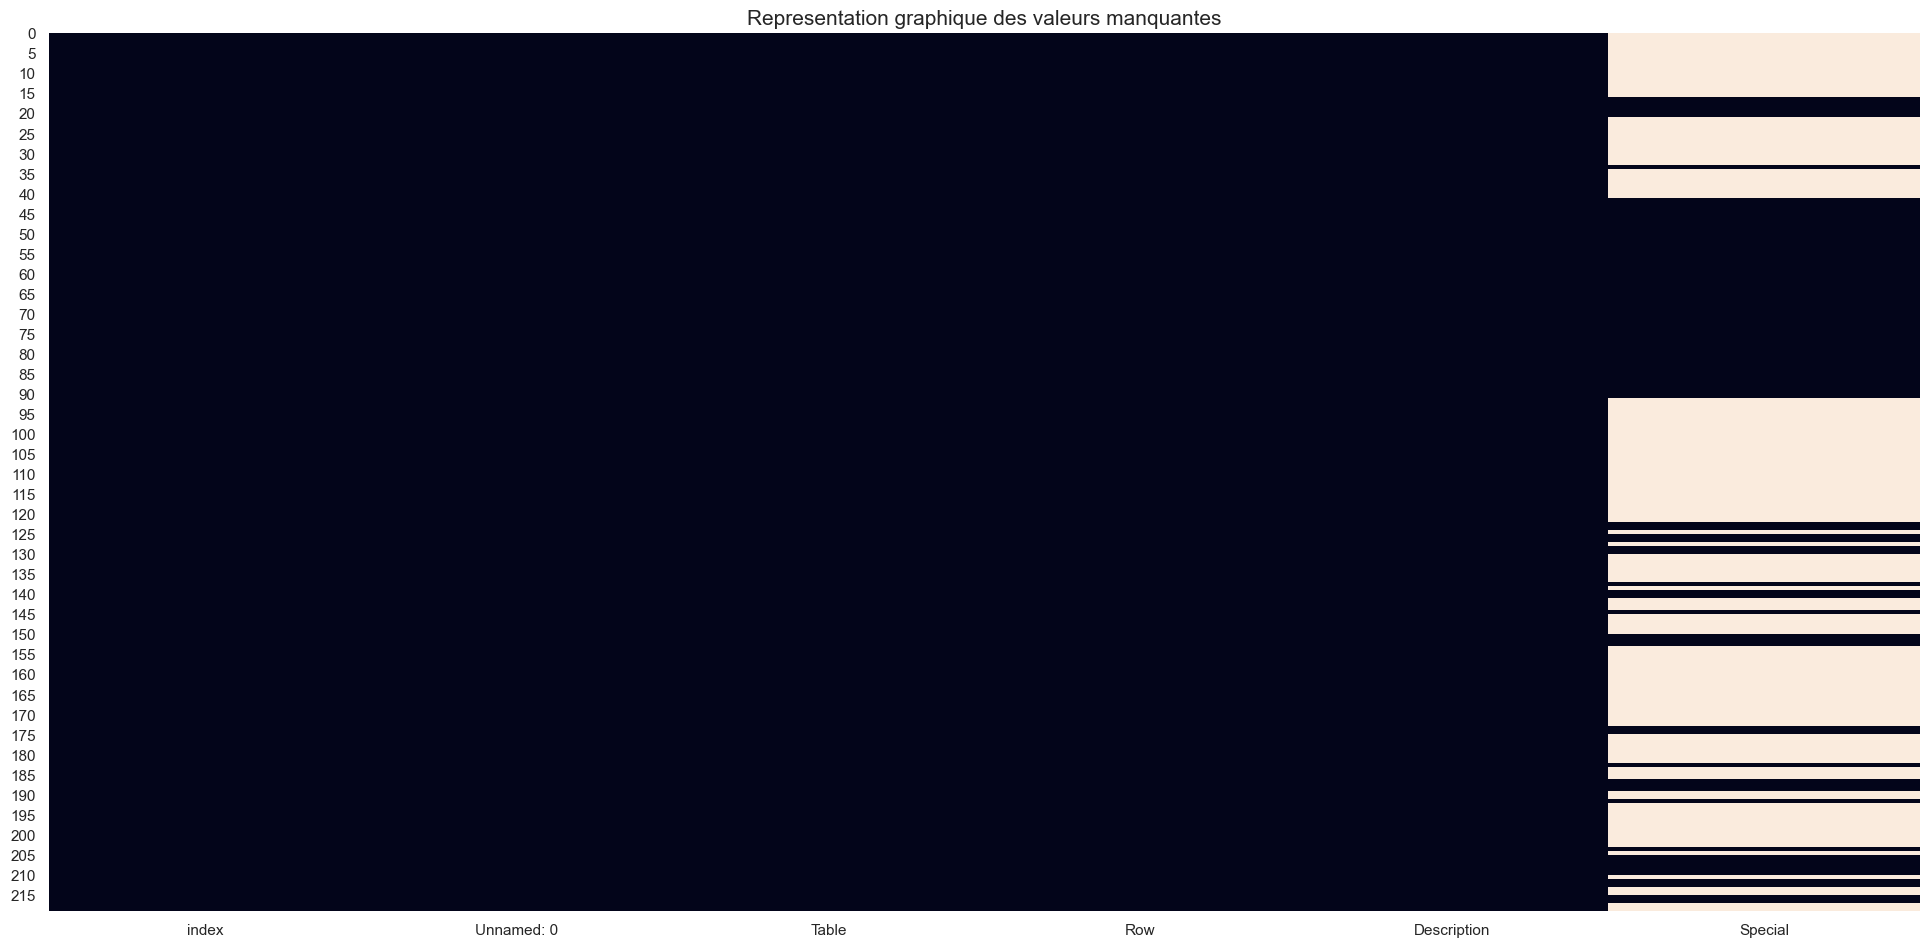

In [21]:
valeurs(hc_desc)

219 produits
6 variables

Type des variables:
 object    4
int64     2
Name: count, dtype: int64


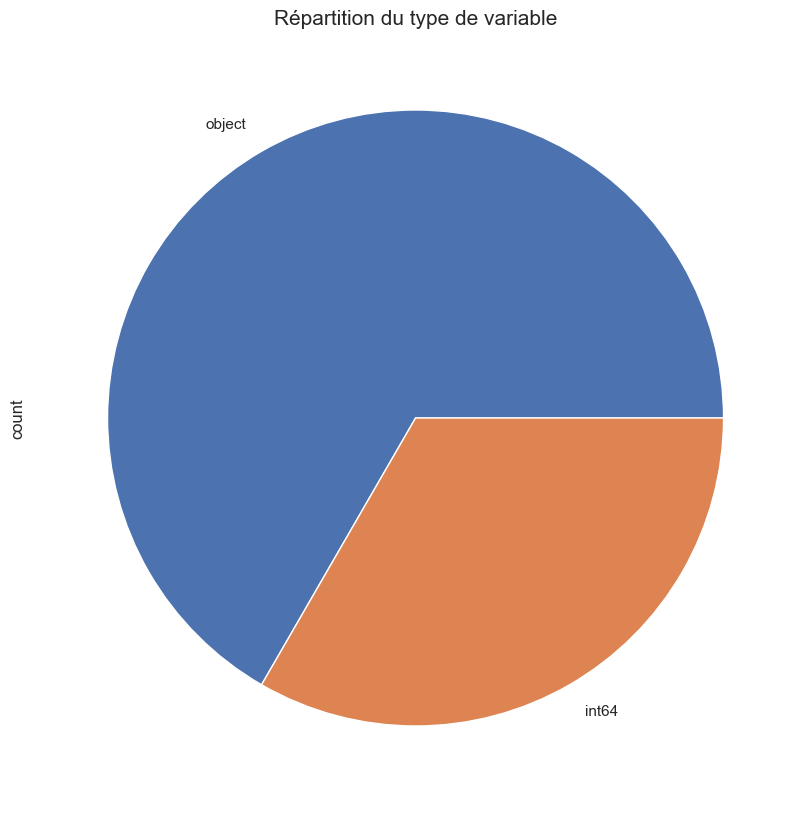

In [22]:
format_data(hc_desc)

In [23]:
hc_desc.head()

index  Unnamed: 0                         Table                 Row  \
0      0           1  application_{train|test}.csv          SK_ID_CURR   
1      1           2  application_{train|test}.csv              TARGET   
2      2           5  application_{train|test}.csv  NAME_CONTRACT_TYPE   
3      3           6  application_{train|test}.csv         CODE_GENDER   
4      4           7  application_{train|test}.csv        FLAG_OWN_CAR   

                                         Description Special  
0                           ID of loan in our sample     NaN  
1  Target variable (1 - client with payment diffi...     NaN  
2        Identification if loan is cash or revolving     NaN  
3                               Gender of the client     NaN  
4                      Flag if the client owns a car     NaN

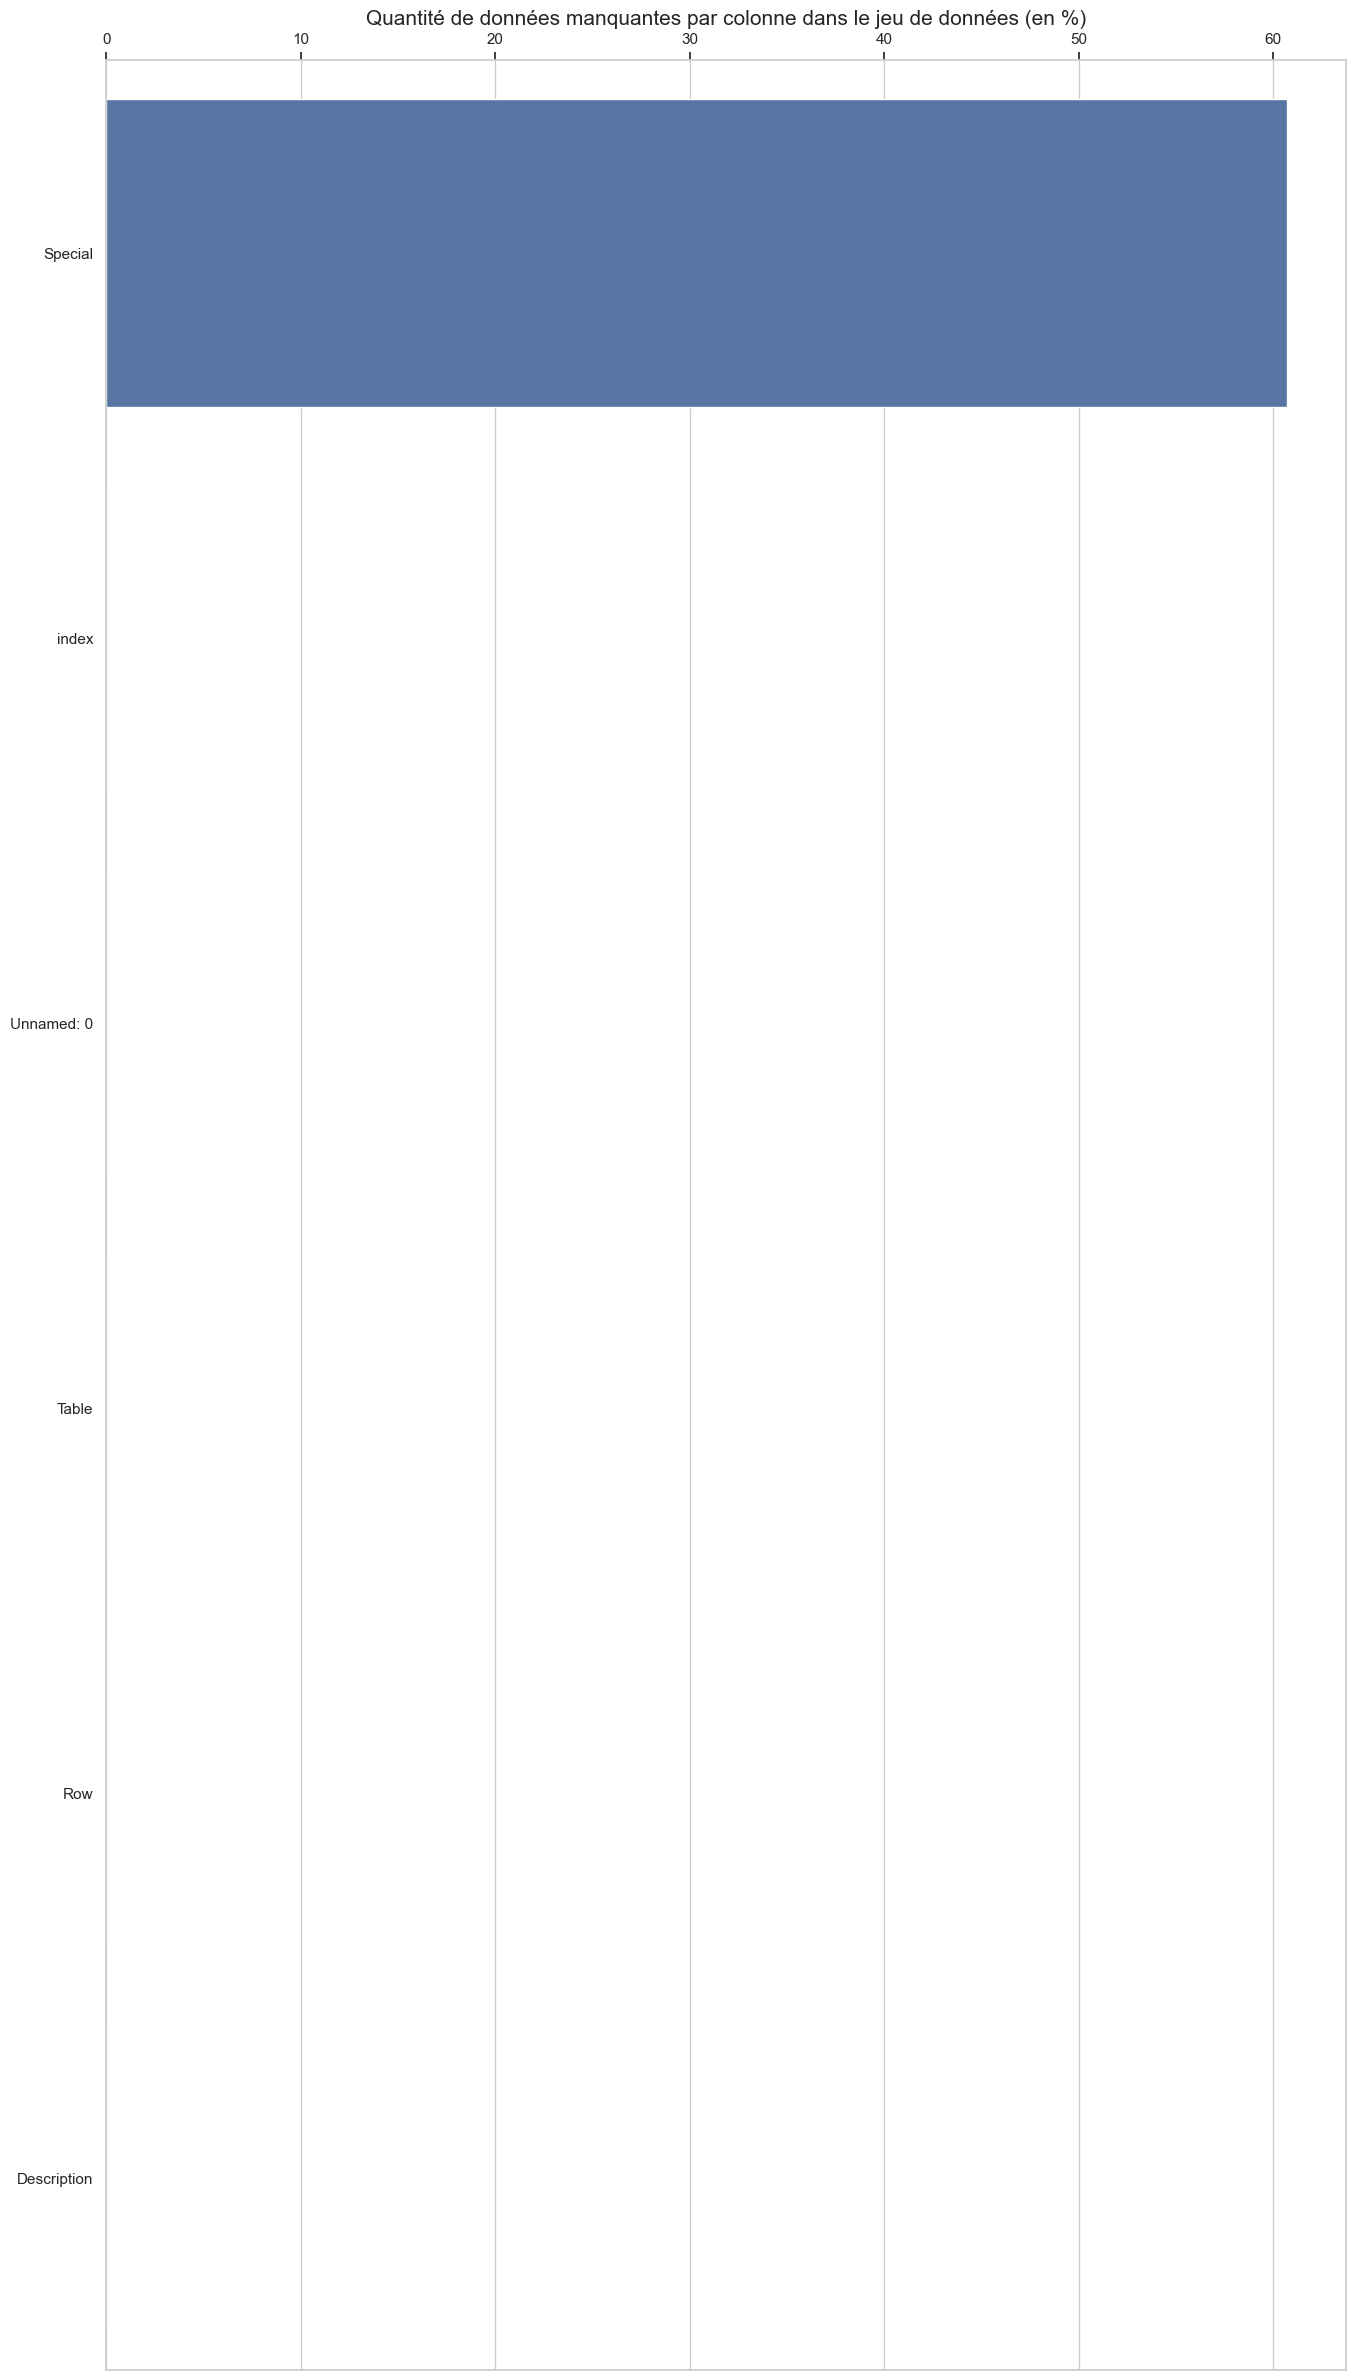

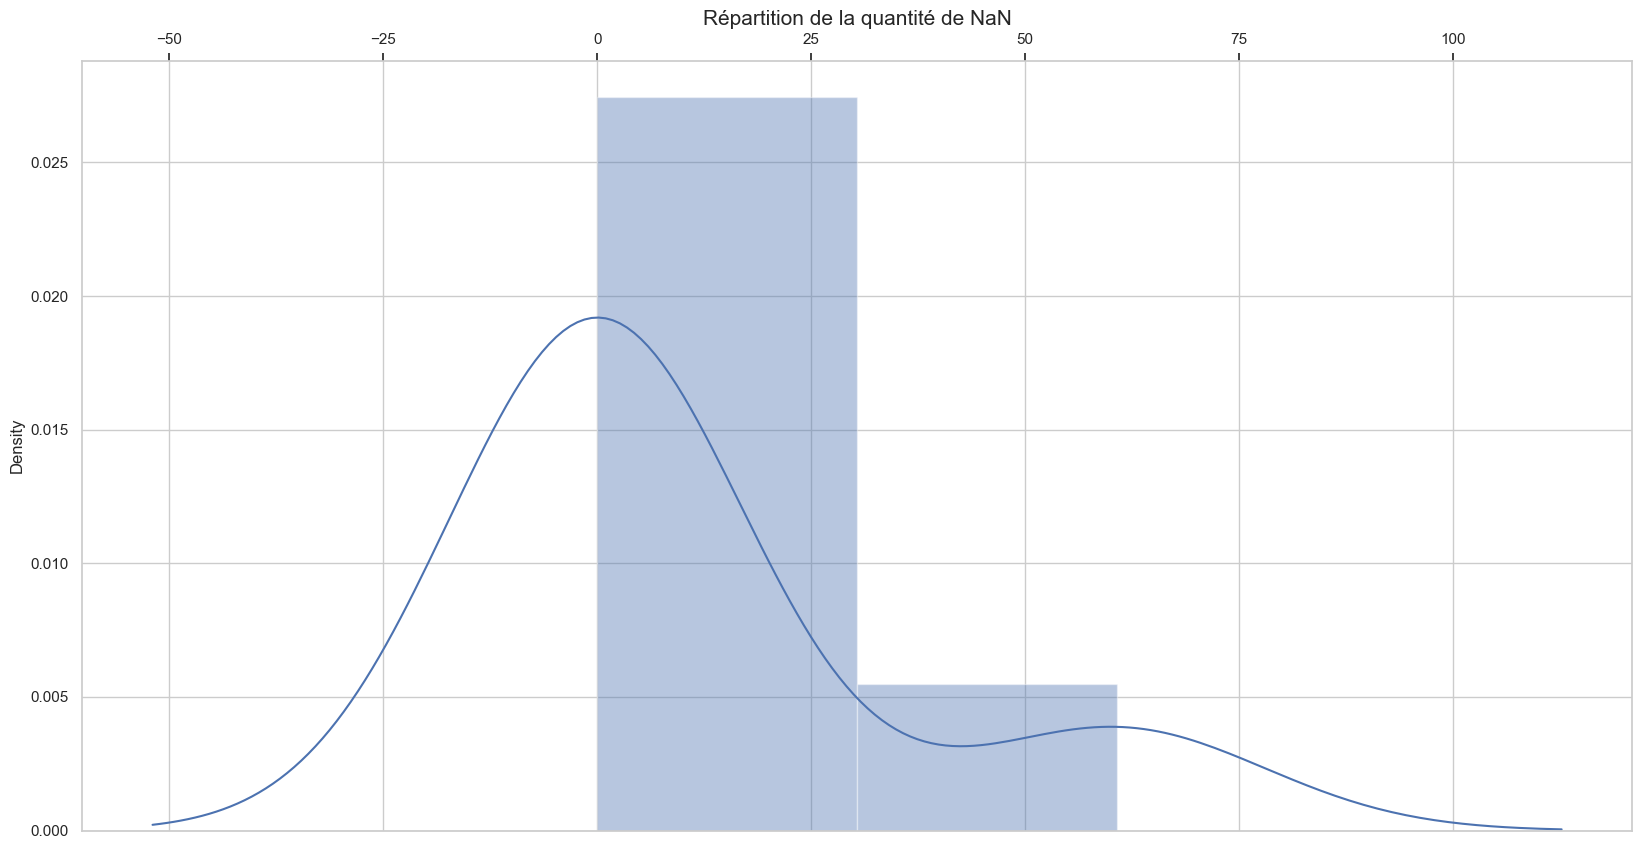

In [24]:
moduleexplo.proportion_nan(hc_desc)

In [25]:
# Remplissage de la feature Special
hc_desc.Special.value_counts()

Special
normalized                               53
time only relative to the application    19
hashed                                    9
rounded                                   2
normalized                                1
recoded                                   1
grouped                                   1
Name: count, dtype: int64

In [26]:
# Remplissage de la feature Table
hc_desc.Table.value_counts()

Table
application_{train|test}.csv    122
previous_application.csv         38
credit_card_balance.csv          23
bureau.csv                       17
POS_CASH_balance.csv              8
installments_payments.csv         8
bureau_balance.csv                3
Name: count, dtype: int64

## app_test

This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
Static data for all applications. One row represents one loan in our data sample.

In [27]:
info(app_test)

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2             NaN          Working               Higher education   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                     0.01885   
1            Married  House / apartment                     0.03579   
2            Married  House / apartment                     0.01910   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -19241          -2329            -5170.0             -812          NaN   
1      -18064          -4469            -9118.0            -1623          NaN   
2      -20038          -4458            -2175.0            -3503          5.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1                 NaN              2.0                     2   
1           0  Low-skill Laborers              2.0                     2   
2           0             Drivers              2.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   

   ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0       Kindergarten       0.75261       0.78965       0.15952   
1      Self-employed       0.56499       0.29166       0.43296   
2  Transport: type 3           NaN       0.69979       0.61099   

   APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0           0.066             0.059                       0.9732   
1             NaN               NaN                          NaN   
2             NaN               NaN                          NaN   

   YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0              NaN             NaN            NaN         0.1379   
1              NaN             NaN            NaN            NaN   
2              NaN             NaN            NaN            NaN   

   FLOORSMAX_

Taille :-------------------------------------------------------------- (48744, 121)
----------------------------------------------------------------------------------------------------
Types :float64    65
int64      40
object     16
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Types :SK_ID_CURR                        int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      

Le nombre de lignes du fichier est de  48744 et de son nombre de colonnes est de 121


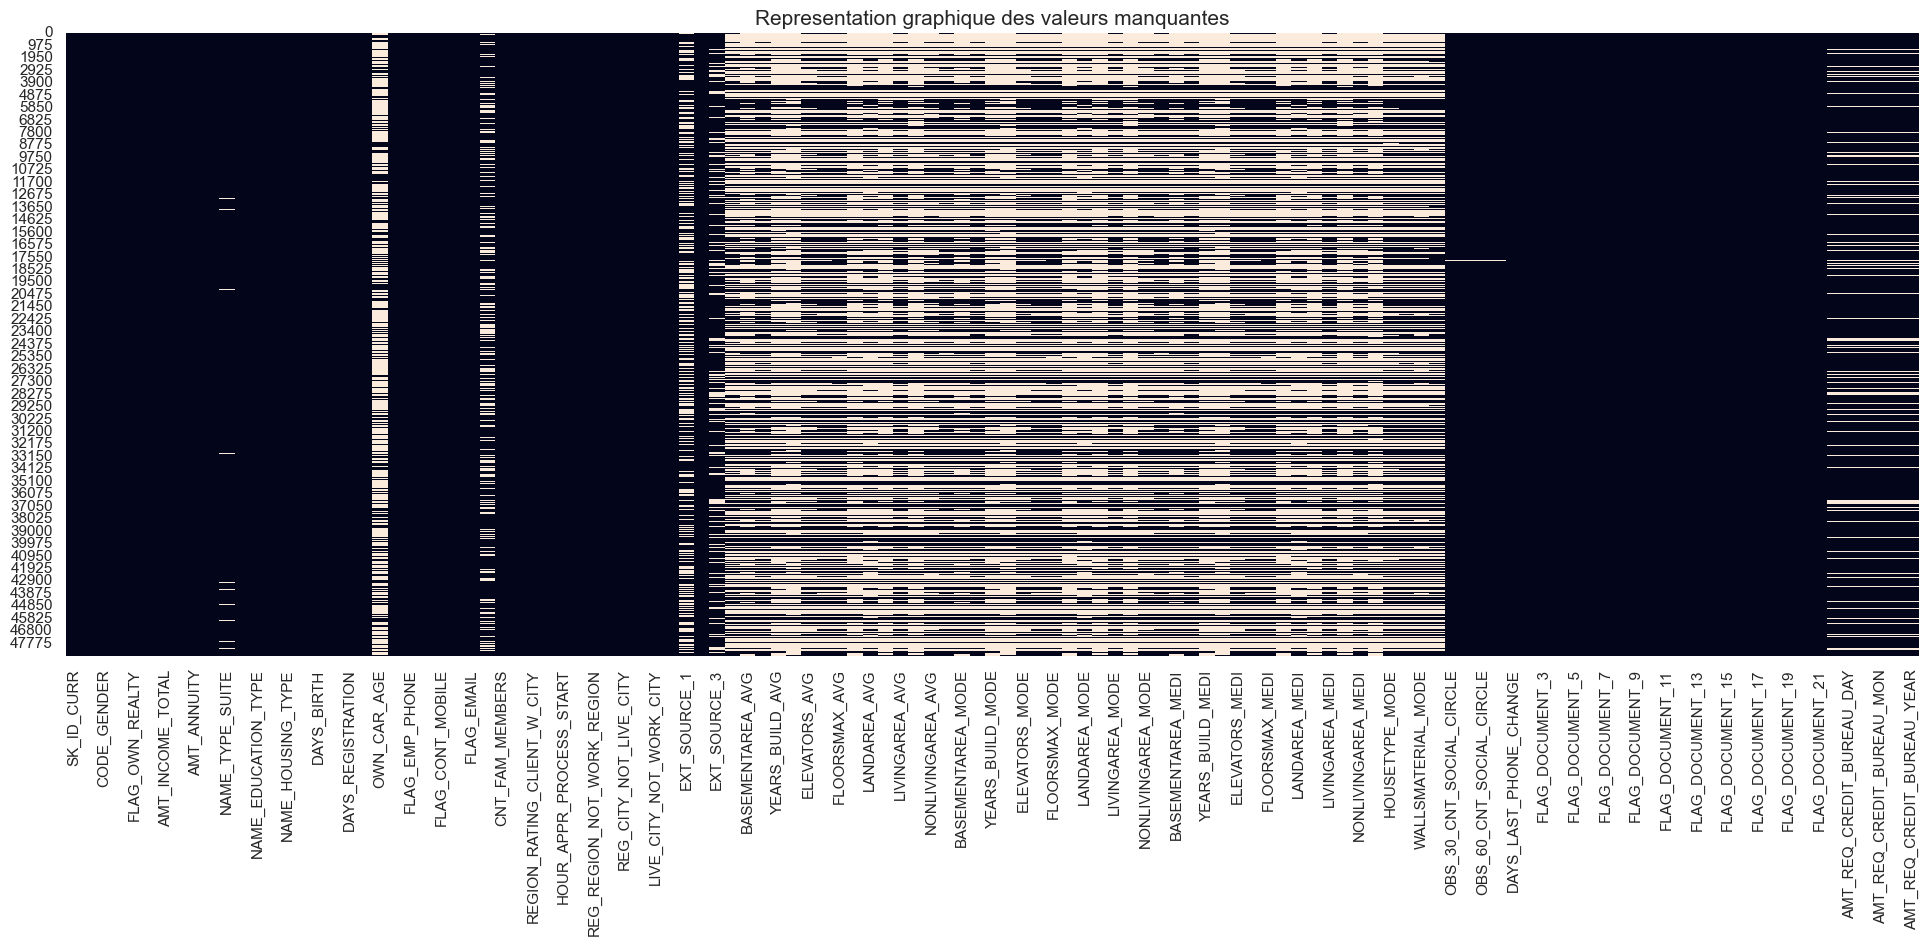

In [28]:
valeurs(app_test)

48744 produits
121 variables

Type des variables:
 float64    65
int64      40
object     16
Name: count, dtype: int64


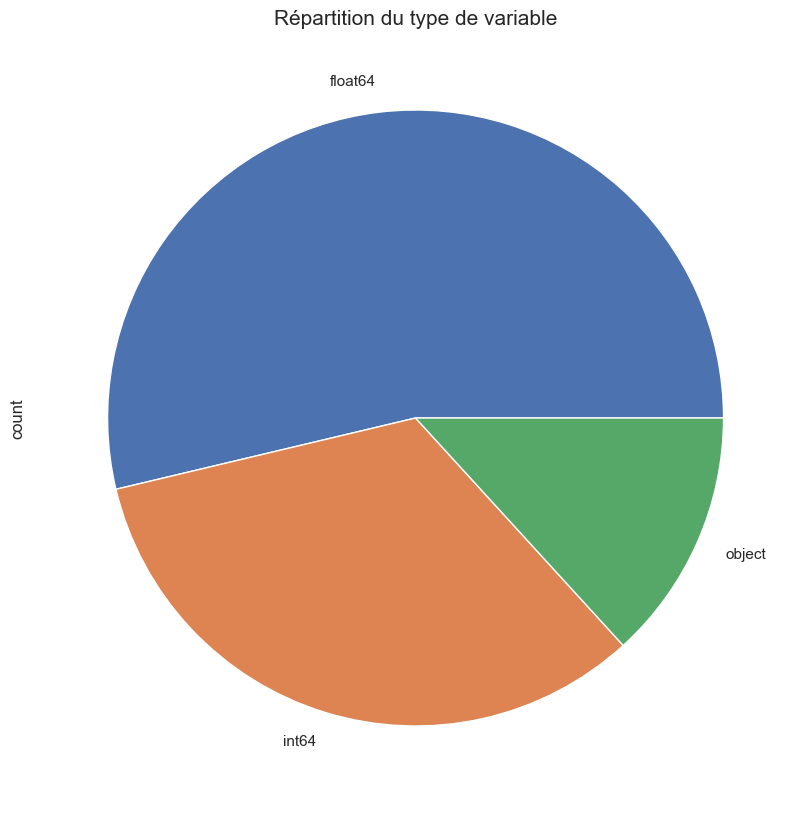

In [29]:
format_data(app_test)

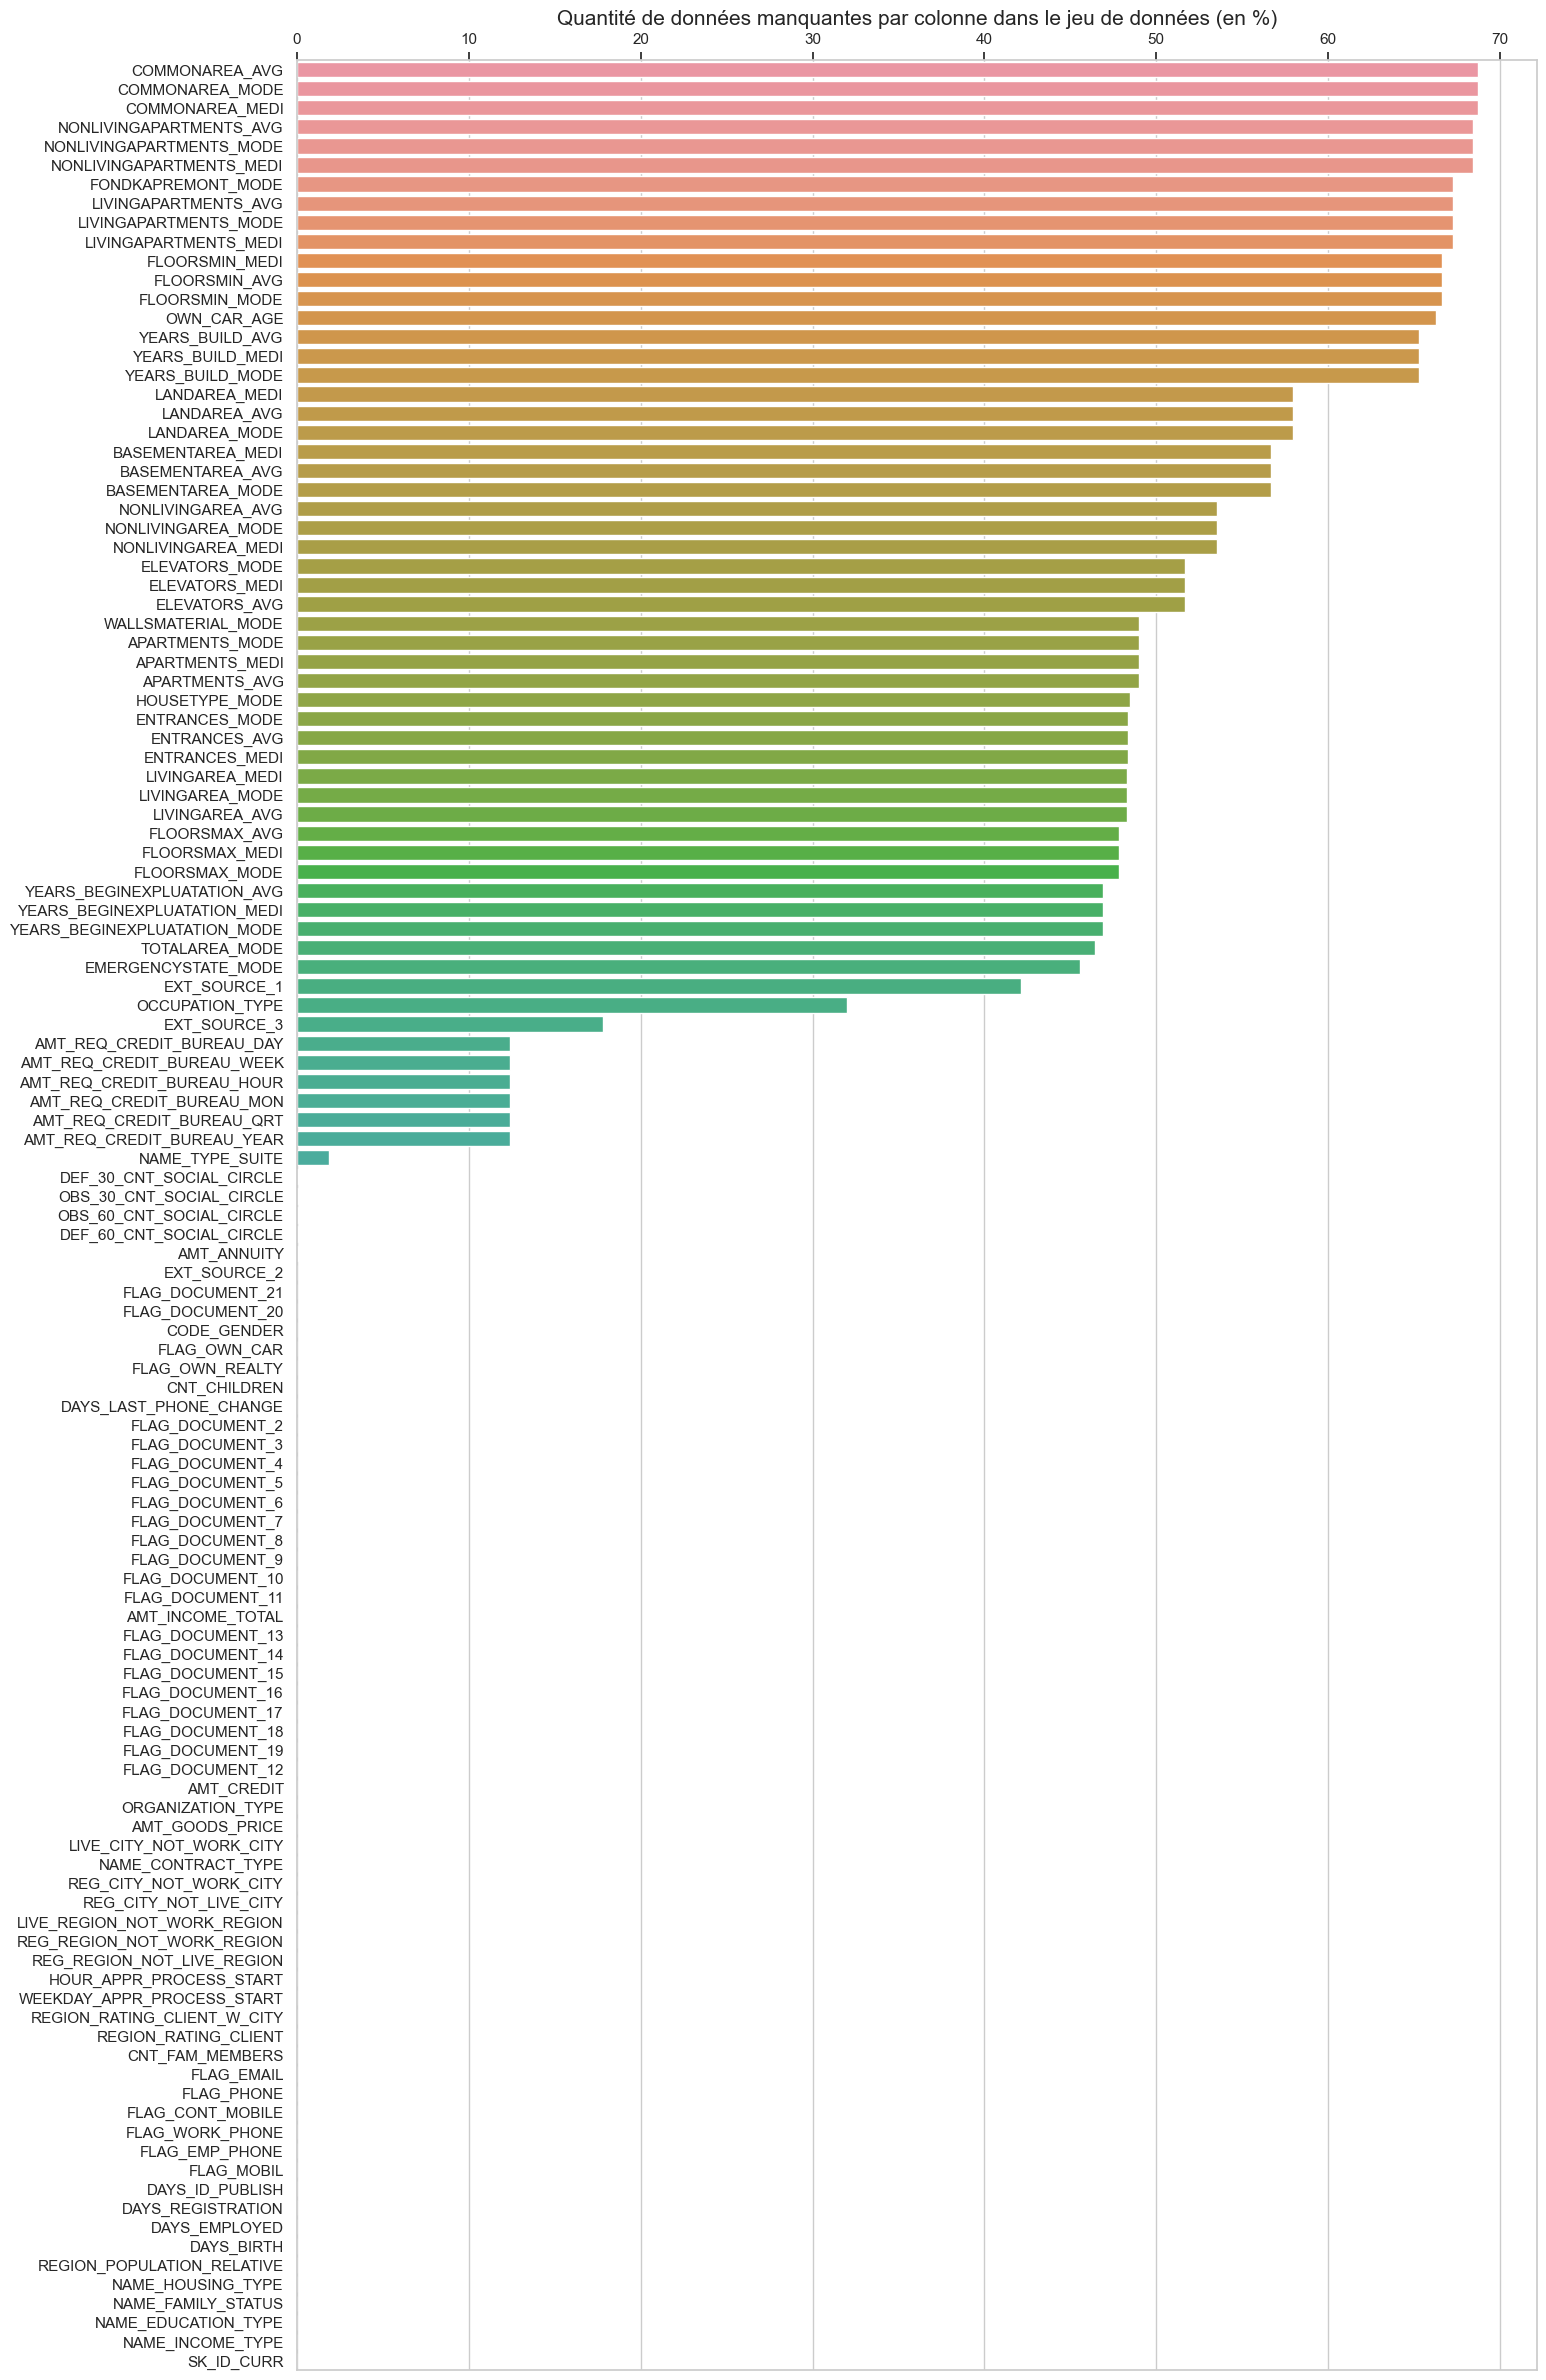

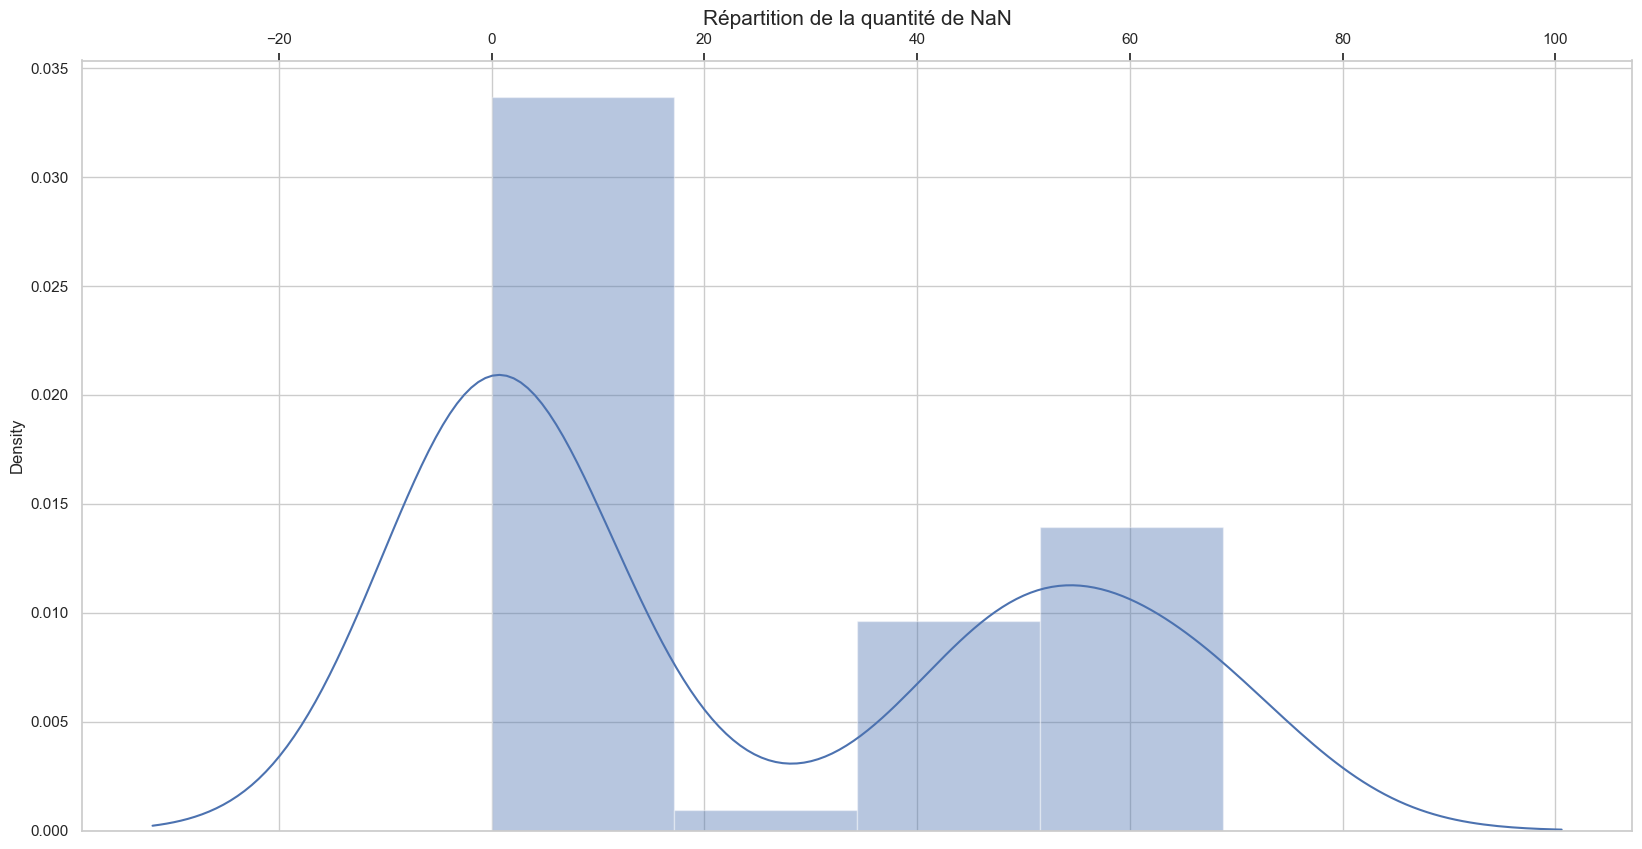

In [30]:
moduleexplo.proportion_nan(app_test)

In [31]:
# Remplissage de la feature Special
app_test.CODE_GENDER.value_counts()

CODE_GENDER
F    32678
M    16066
Name: count, dtype: int64

In [32]:
# Cible : Population ayant fini les études secondaires ou tertiaires
pd.set_option('max_colwidth', None)
test=[row for row in hc_desc['Table'] if ('application_{train|test}.csv') in row]
desc_test = hc_desc[hc_desc['Table'].isin(test)][['Row', 'Description']]
desc = desc_test.head(130)
print(tabulate(desc))

---  ----------------------------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  0  SK_ID_CURR                    ID of loan in our sample
  1  TARGET                        Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)
  2  NAME_CONTRACT_TYPE            Identification if loan is cash or revolving
  3  CODE_GENDER                   Gender of the client
  4  FLAG_OWN_CAR                  Flag if the client owns a car
  5  FLAG_OWN_REALTY               Flag if client owns a house or flat
  6  CNT_CHILDREN                  Number of children the client has
  7  AMT_INCOME_TOTAL              Income of the client
  8  AMT_

In [33]:
view_test = app_test.head(10).T
print(tabulate(view_test))

----------------------------  ------------------  -----------------------------  ------------------  -----------------------------  -----------------------------  -----------------------------  ---------------------  --------------------  ------------------  ------------------
SK_ID_CURR                    100001              100005                         100013              100028                         100038                         100042                         100057                 100065                100066              100067
NAME_CONTRACT_TYPE            Cash loans          Cash loans                     Cash loans          Cash loans                     Cash loans                     Cash loans                     Cash loans             Cash loans            Cash loans          Cash loans
CODE_GENDER                   F                   M                              M                   F                              M                              F                      

## app_train

This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
Static data for all applications. One row represents one loan in our data sample.

In [34]:
info(app_train)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.01880       -9461           -637            -3648.0   
1                     0.00354      -16765          -1188            -1186.0   
2                     0.01003      -19046           -225            -4260.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0       0.08304       0.26295       0.13938          0.0247            0.0369   
1       0.31127       0.62225           NaN          0.0959            0.0529   
2           NaN       0.55591       0.72957             NaN               NaN   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
0                       0.9722           0.6192          0.0143   
1                       0.9851           0.7960          0.0605   
2                          NaN              NaN             NaN   

   ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0     

Taille :-------------------------------------------------------------- (307511, 122)
----------------------------------------------------------------------------------------------------
Types :float64    65
int64      41
object     16
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Types :SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE              

Le nombre de lignes du fichier est de  307511 et de son nombre de colonnes est de 122


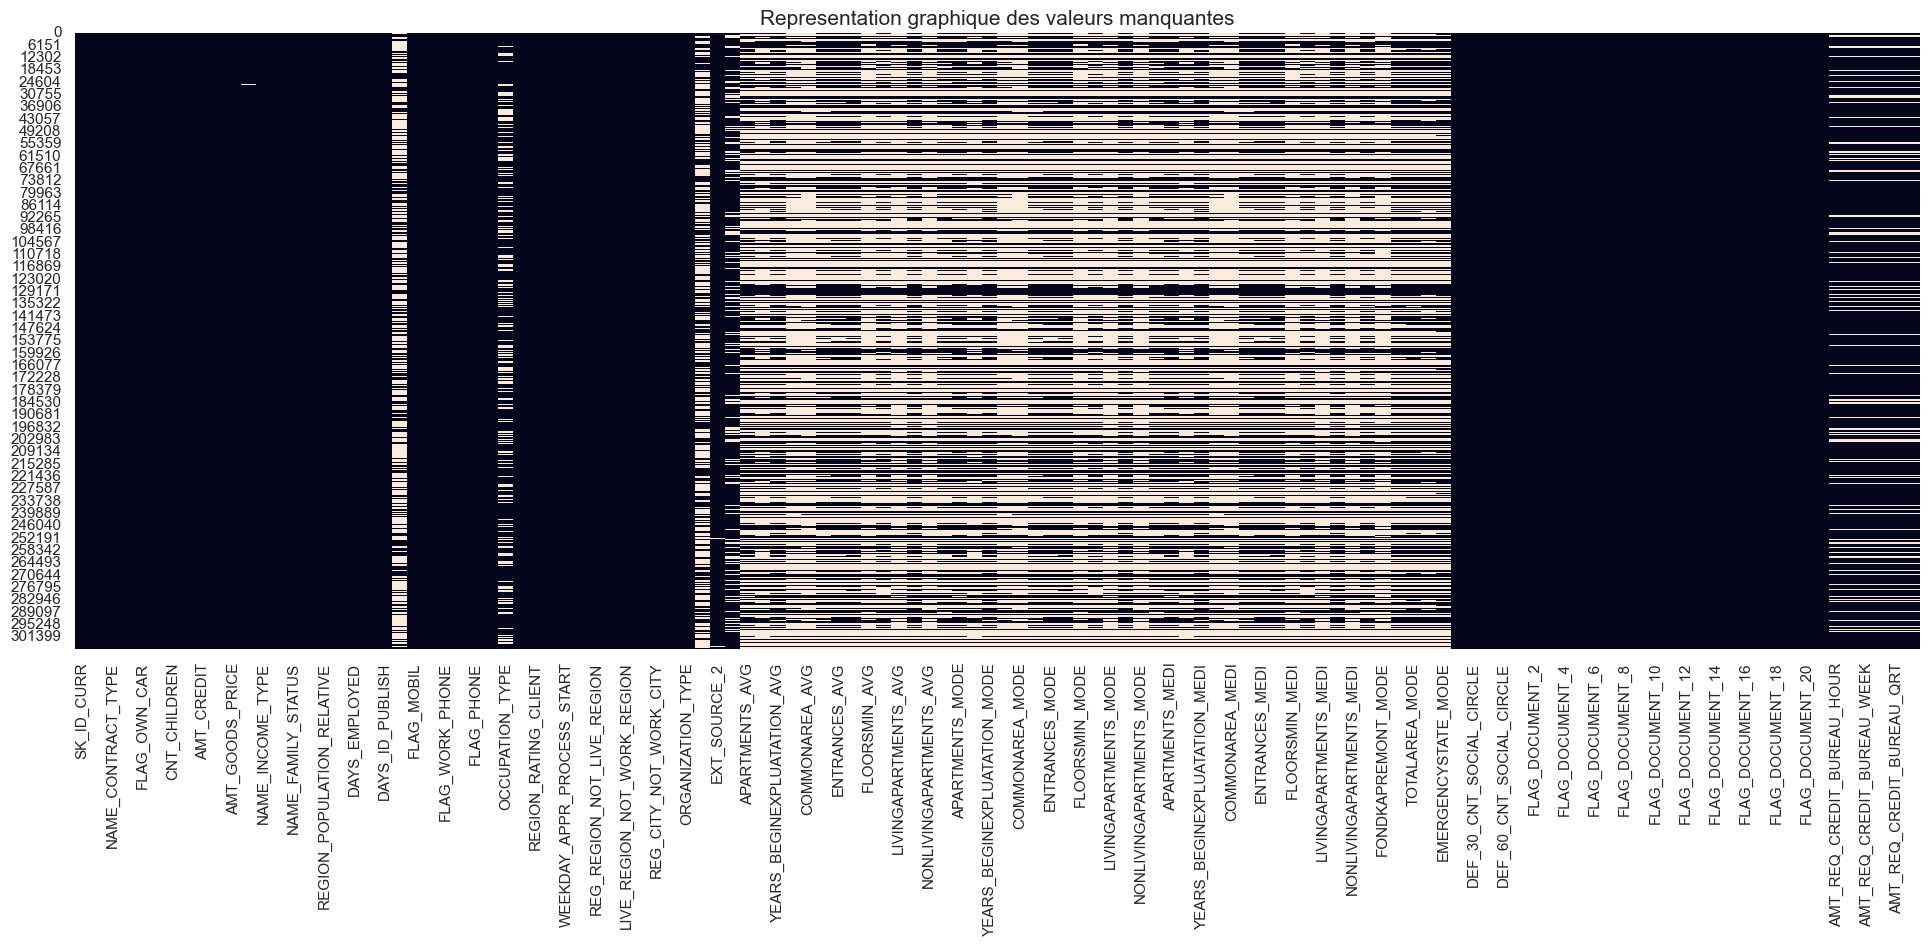

In [35]:
valeurs(app_train)

In [1]:
app_train(50)

NameError: name 'app_train' is not defined

307511 produits
122 variables

Type des variables:
 float64    65
int64      41
object     16
Name: count, dtype: int64


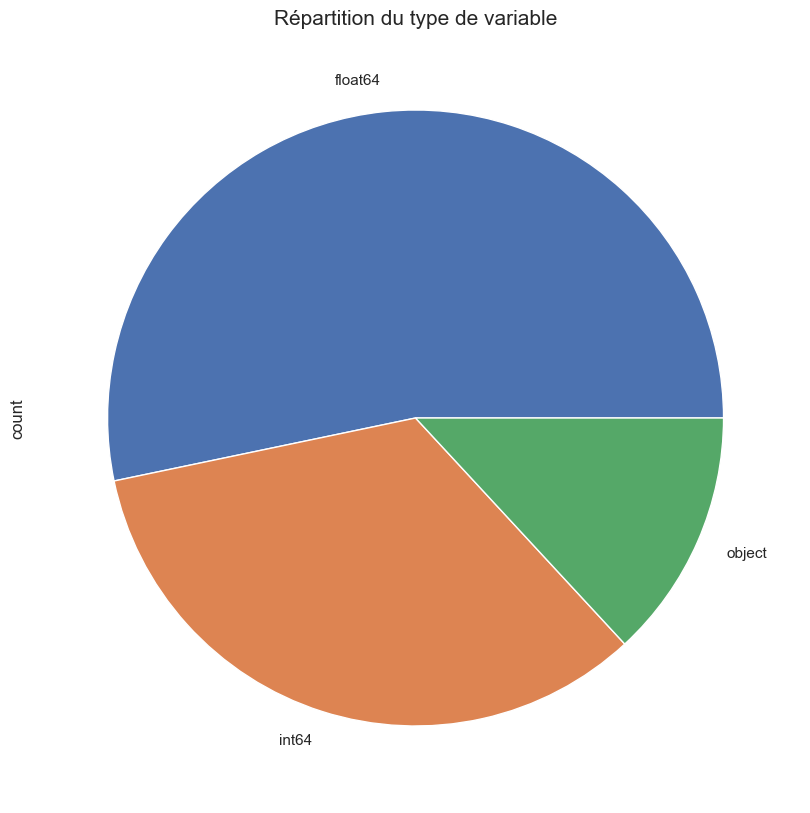

In [37]:
format_data(app_train)

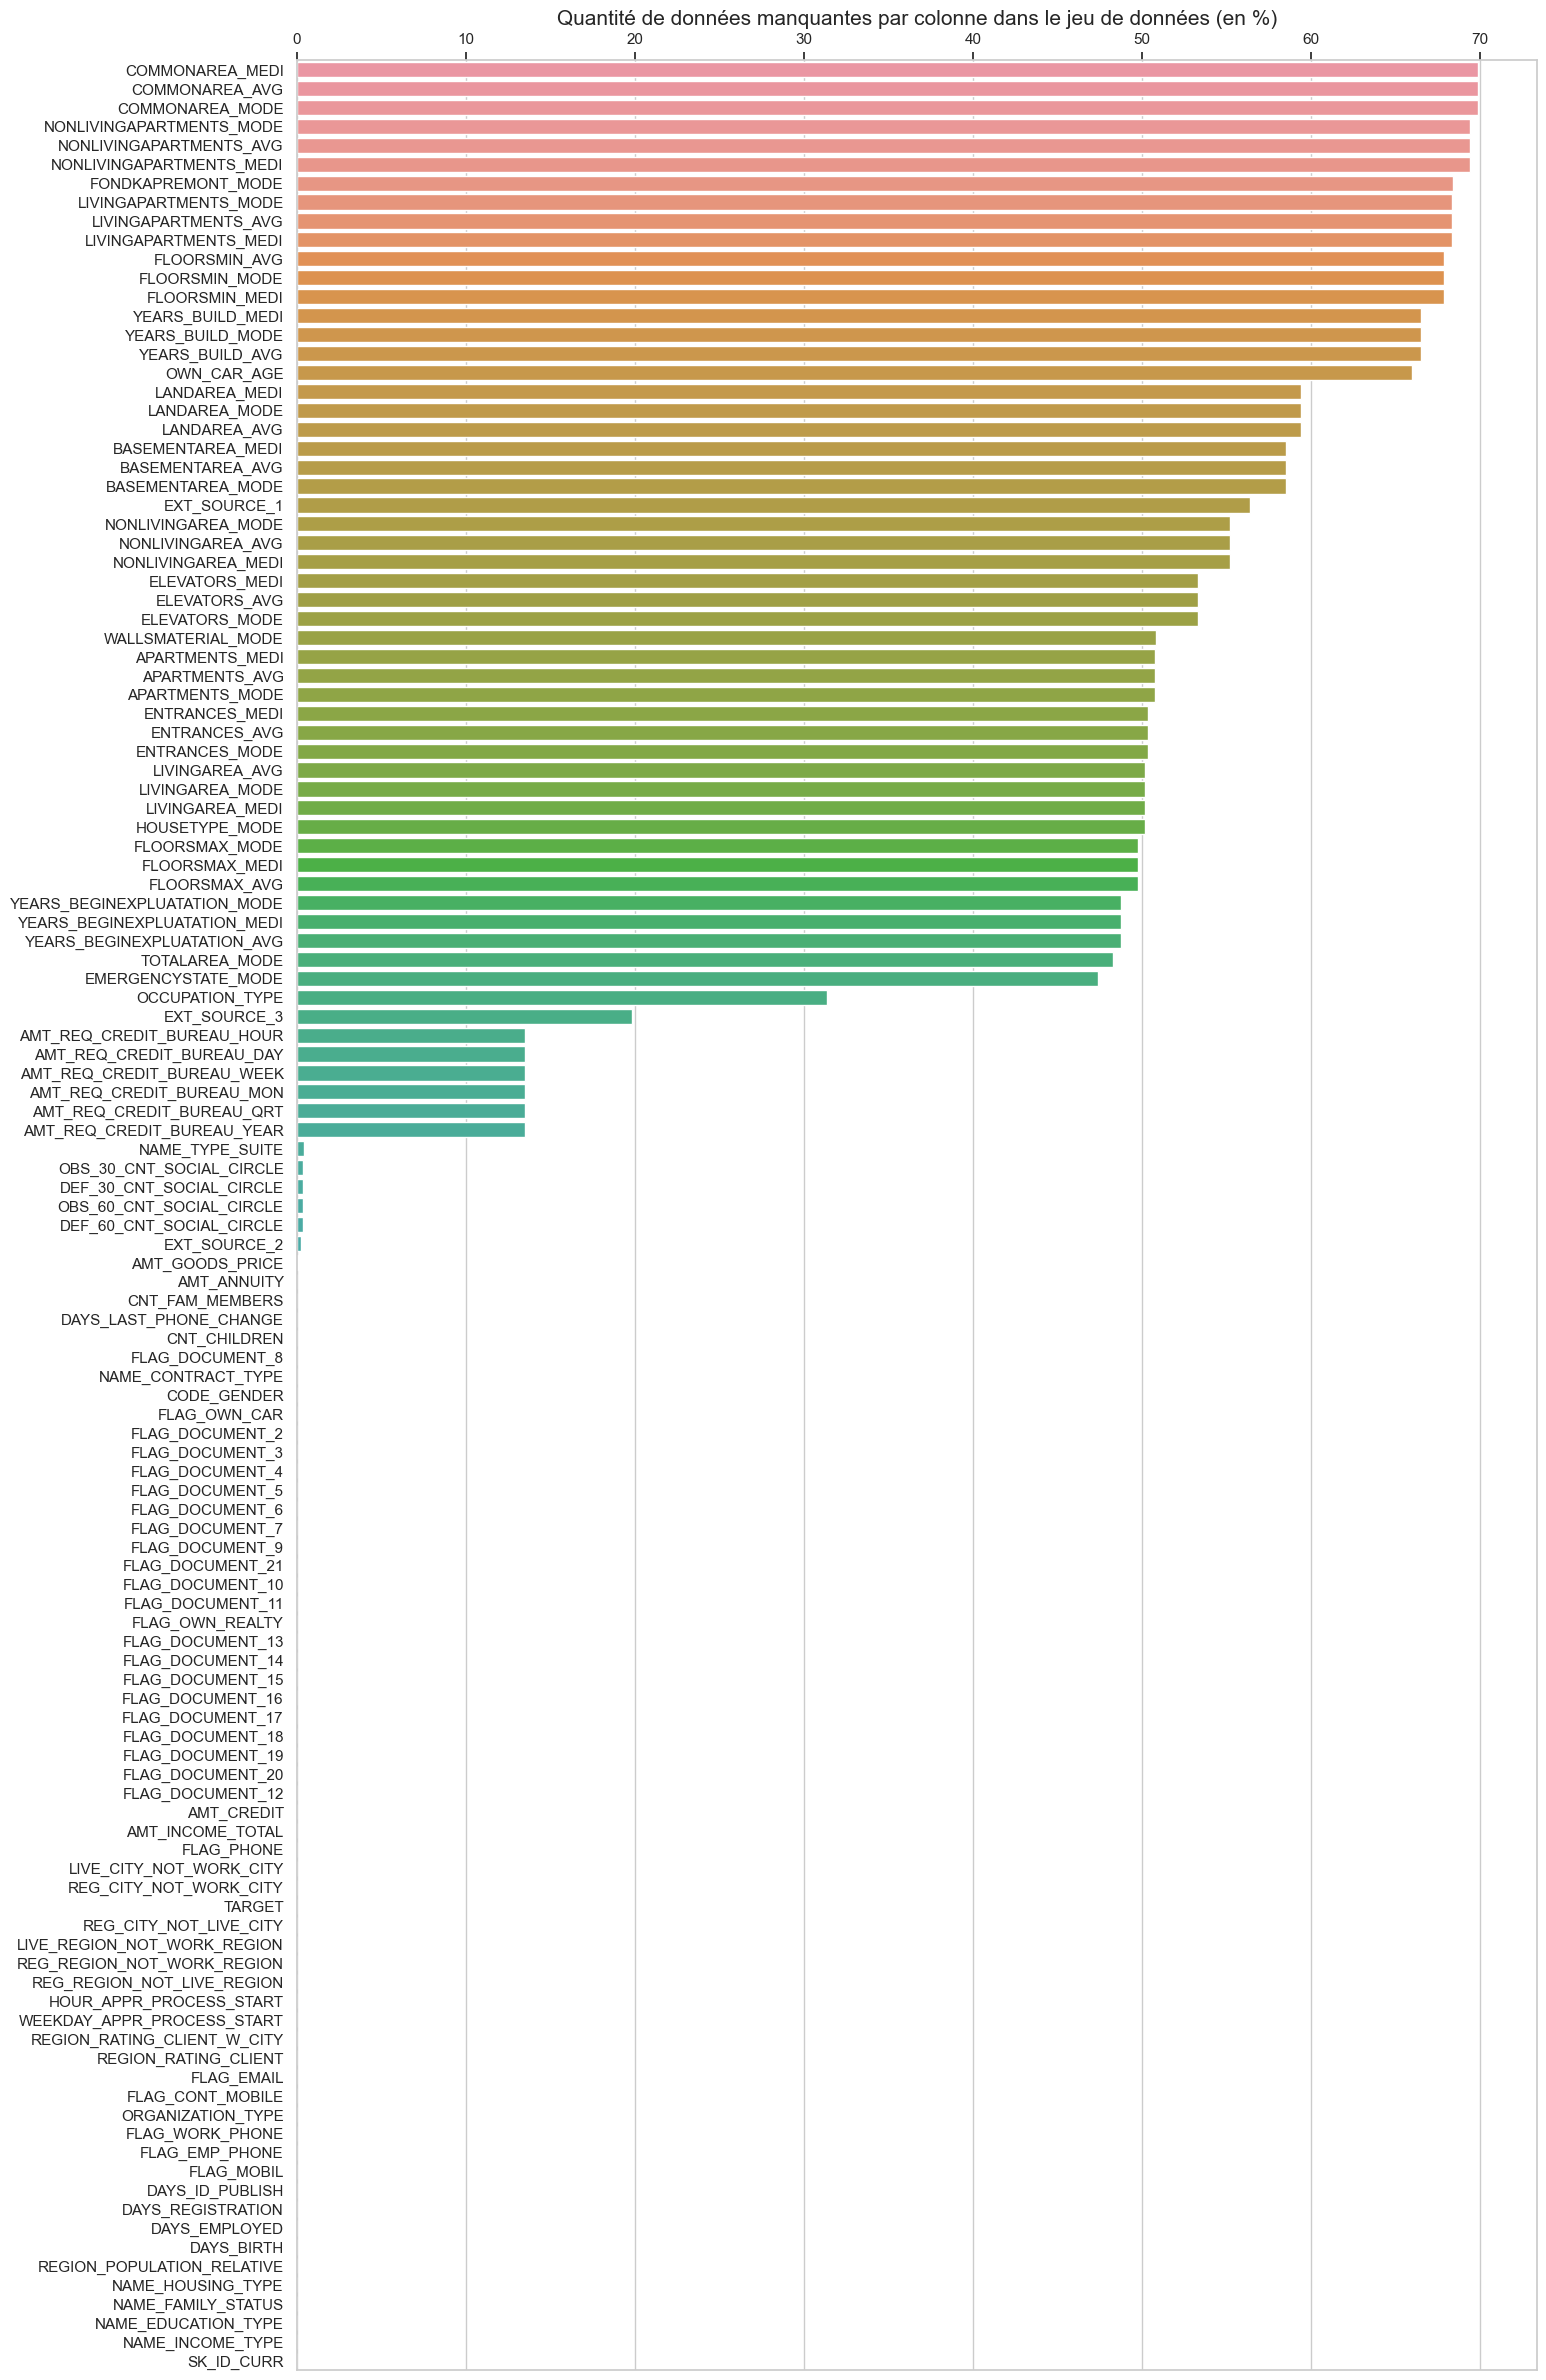

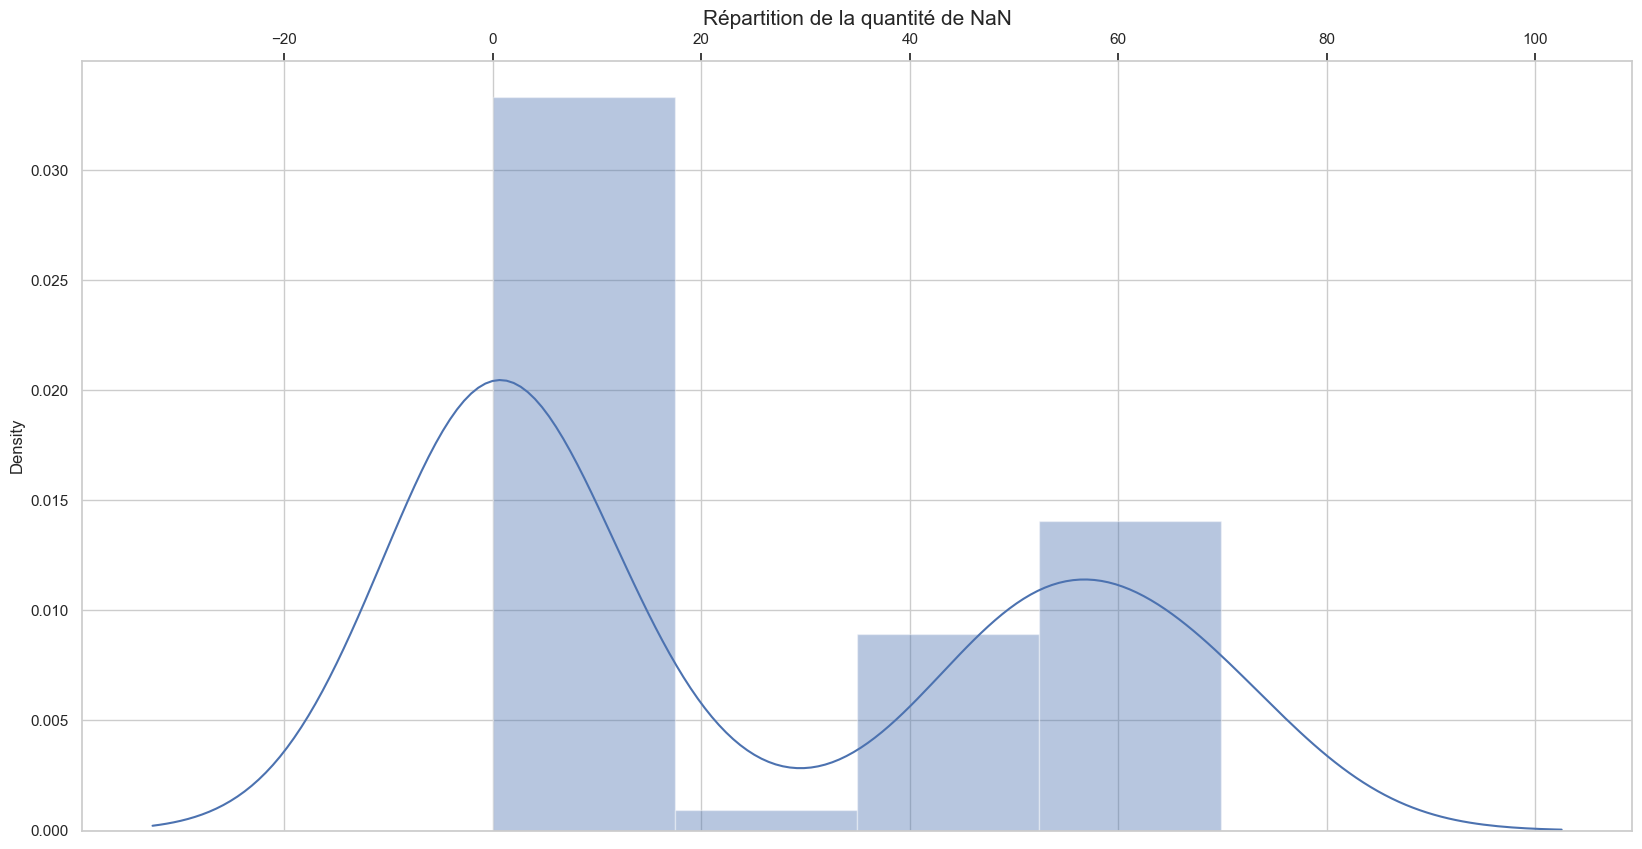

In [38]:
moduleexplo.proportion_nan(app_train)

In [39]:
# Cible : Population ayant fini les études secondaires ou tertiaires
pd.set_option('max_colwidth', None)
test=[row for row in hc_desc['Table'] if ('application_{train|test}.csv') in row]
desc_train = hc_desc[hc_desc['Table'].isin(test)][['Row', 'Description']]
desc = desc_train.head(130)
print(tabulate(desc))

---  ----------------------------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  0  SK_ID_CURR                    ID of loan in our sample
  1  TARGET                        Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)
  2  NAME_CONTRACT_TYPE            Identification if loan is cash or revolving
  3  CODE_GENDER                   Gender of the client
  4  FLAG_OWN_CAR                  Flag if the client owns a car
  5  FLAG_OWN_REALTY               Flag if client owns a house or flat
  6  CNT_CHILDREN                  Number of children the client has
  7  AMT_INCOME_TOTAL              Income of the client
  8  AMT_

In [40]:
view_train = app_train.head(10).T
print(tabulate(view_train))

----------------------------  -----------------------------  ------------------  -----------------------------  -----------------------------  -----------------------------  -----------------------------  ----------------------  ------------------  -----------------------------  -----------------------------
SK_ID_CURR                    100002                         100003              100004                         100006                         100007                         100008                         100009                  100010              100011                         100012
TARGET                        1                              0                   0                              0                              0                              0                              0                       0                   0                              0
NAME_CONTRACT_TYPE            Cash loans                     Cash loans          Revolving loans                Cash loan

In [41]:
# Inverser les valeurs négatives de la colonne 'DAYS_BIRTH'
app_train['DAYS_BIRTH'] = app_train['DAYS_BIRTH'].apply(lambda x: -x if x < 0 else x)

# Diviser par 365 et arrondir la colonne 'DAYS_BIRTH'
app_train['DAYS_BIRTH'] = round(app_train['DAYS_BIRTH'] / 365)

print(app_train)


        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0     

In [42]:
# Renommer la colonne 'DAYS_BIRTH' en 'AGE'
app_train.rename(columns={'DAYS_BIRTH': 'AGE'}, inplace=True)

app_train

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE   AGE  DAYS_EMPLOYED  \
0       House / apartment                     0.01880  26.0           -637   
1       House / apartment                     0.00354  46.0          -1188   
2       House / apartment                     0.01003  52.0           -225   
3       House / apartment                     0.00802  52.0          -3039   
4       House / apartment                     0.02866  55.0          -3038   
...                   ...                         ...   ...            ...   
307506       With parents             

## balance

Monthly balances of previous credits in Credit Bureau.
This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

In [43]:

pd.set_option('max_colwidth', None)
test=[row for row in hc_desc['Table'] if ('bureau_balance') in row]
desc_balance = hc_desc[hc_desc['Table'].isin(test)][['Row', 'Description']]
desc = desc_balance.head(20)
print(tabulate(desc))

---  --------------  -----------------------------------------------------------------------------------------------------------------
139  SK_BUREAU_ID    Recoded ID of Credit Bureau credit (unique coding for each application) - use this to join to CREDIT_BUREAU table
140  MONTHS_BALANCE  Month of balance relative to application date (-1 means the freshest balance date)
141  STATUS          Status of Credit Bureau loan during the month (active, closed, DPD0-30, [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60, 5 means DPD 120+ or sold or written off ] )
---  --------------  -----------------------------------------------------------------------------------------------------------------


In [44]:
info(balance)

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C

Taille :-------------------------------------------------------------- (27299925, 3)
----------------------------------------------------------------------------------------------------
Types :int64     2
object    1
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Types :SK_ID_BUREAU       int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object
----------------------------------------------------------------------------------------------------
Valeurs manquantes par colonnes (%): 
SK_ID_BUREAU      0.0
MONTHS_BALANCE    0.0
STATUS            0.0
dtype: float64
----------------------------------------------------------------------------------------------------
Valeurs différentes par variables : 
SK_ID_BUREAU---------------------------------------------------------- contient 817395 valeurs différentes
MONTHS_BALANCE-------------------------------------------------------- contient 97 valeurs diff

Le nombre de lignes du fichier est de  27299925 et de son nombre de colonnes est de 3


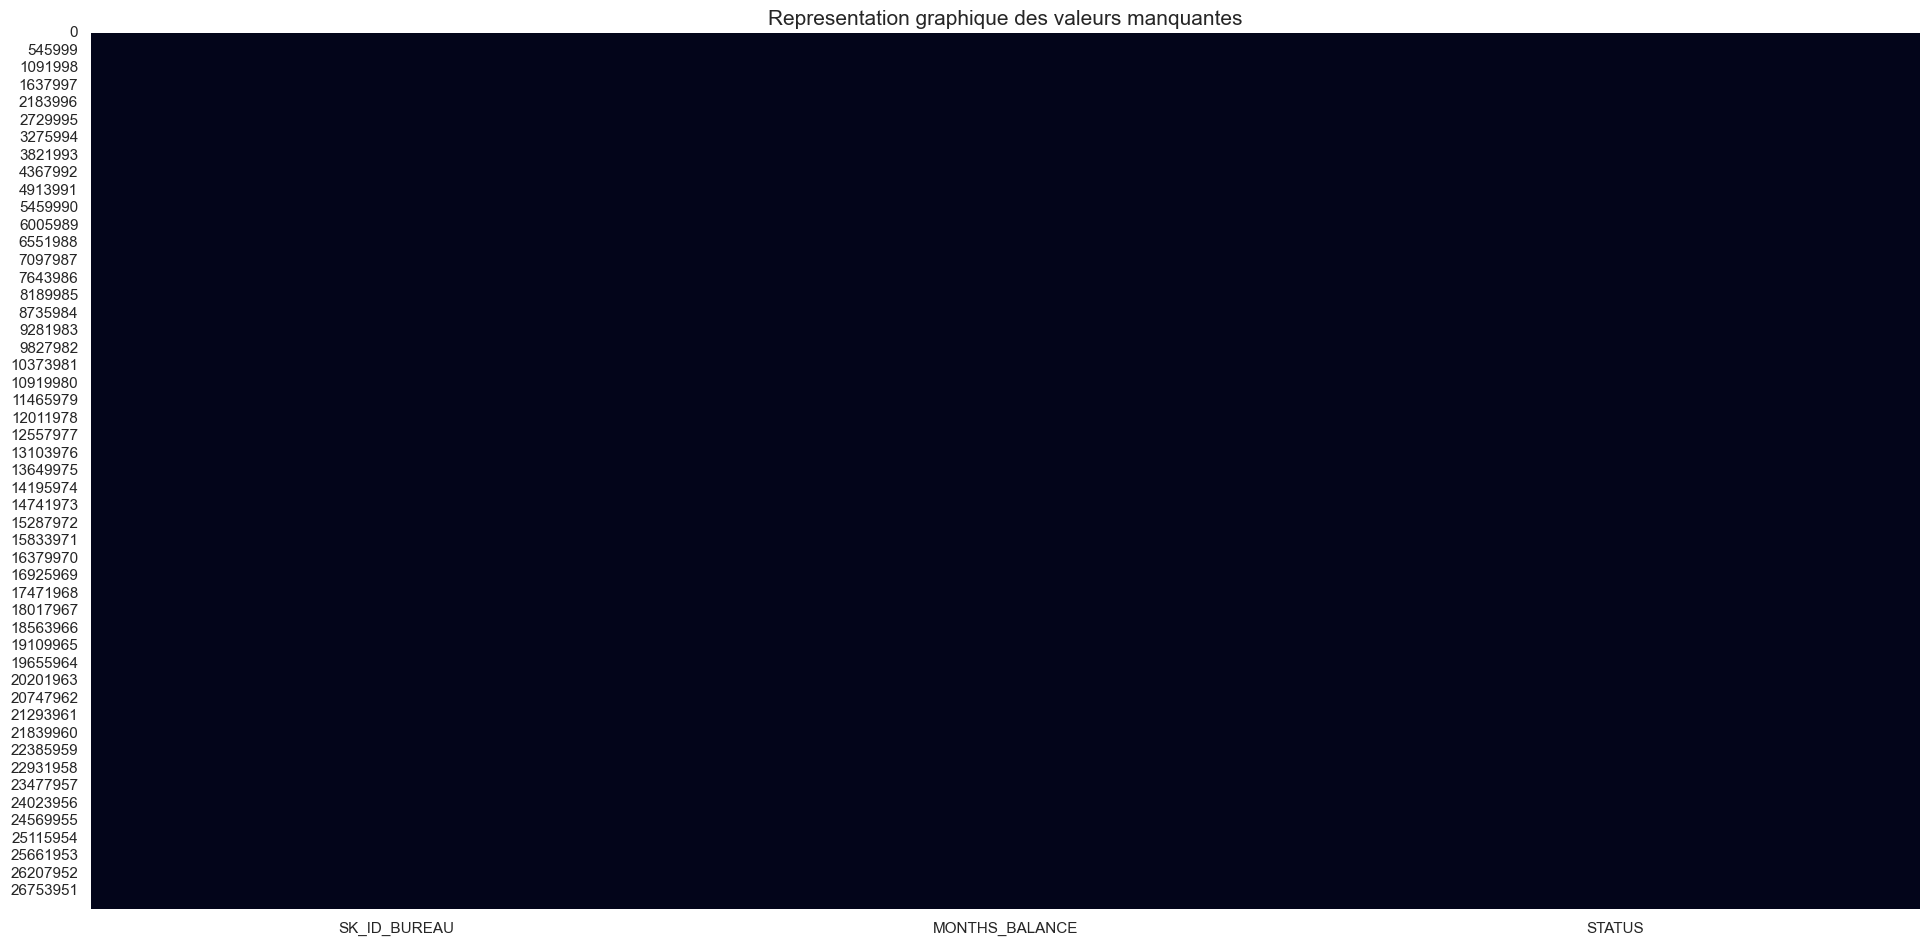

In [45]:
valeurs(balance)

In [46]:
view_balance = balance.head(39).T
print(tabulate(view_balance))

--------------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------
SK_ID_BUREAU    5715448  5715448  5715448  5715448  5715448  5715448  5715448  5715448  5715448  5715448  5715448  5715448  5715448  5715448  5715448  5715448  5715448  5715448  5715448  5715448  5715448  5715448  5715448  5715448  5715448  5715448  5715448  5715449  5715449  5715449  5715449  5715449  5715449  5715449  5715449  5715449  5715449  5715449  5715449
MONTHS_BALANCE  0        -1       -2       -3       -4       -5       -6       -7       -8            -9      -10  -11      -12      -13          -14      -15      -16      -17      -18      -19  -20      -21      -22      -23      -24      -25      -26      0        

27299925 produits
3 variables

Type des variables:
 int64     2
object    1
Name: count, dtype: int64


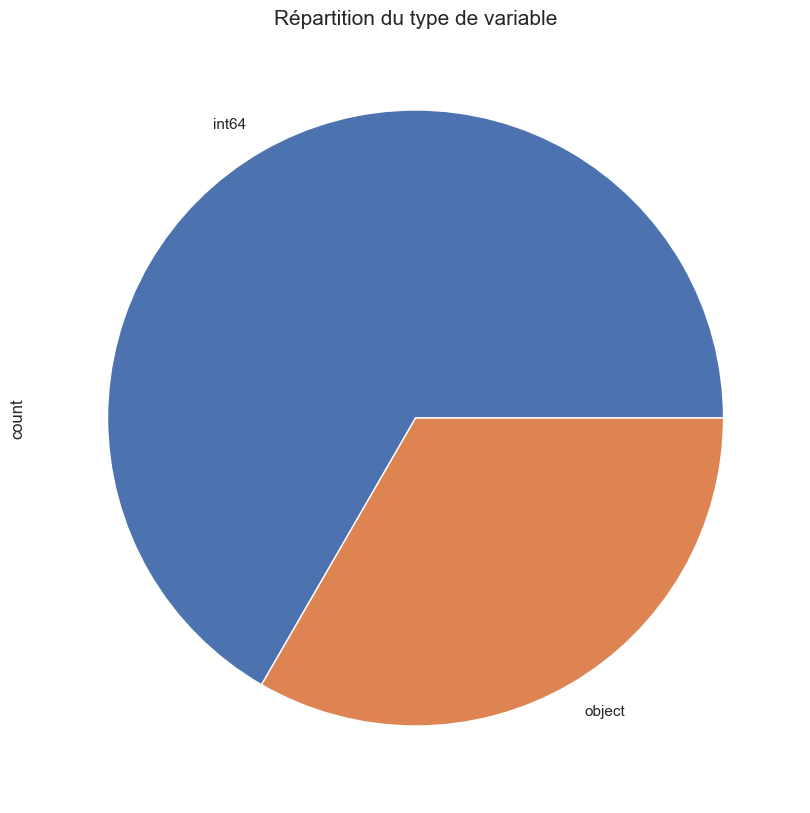

In [47]:
format_data(balance)

## bureau

All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

In [48]:
info(bureau)

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN

Taille :-------------------------------------------------------------- (1716428, 17)
----------------------------------------------------------------------------------------------------
Types :float64    8
int64      6
object     3
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Types :SK_ID_CURR                  int64
SK_ID_BUREAU                int64
CREDIT_ACTIVE              object
CREDIT_CURRENCY            object
DAYS_CREDIT                 int64
CREDIT_DAY_OVERDUE          int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG          int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE                object
DAYS_CREDIT_UPDATE          int64
AMT_ANNUITY               float64
dtype: object
------------------------------------------

Le nombre de lignes du fichier est de  1716428 et de son nombre de colonnes est de 17


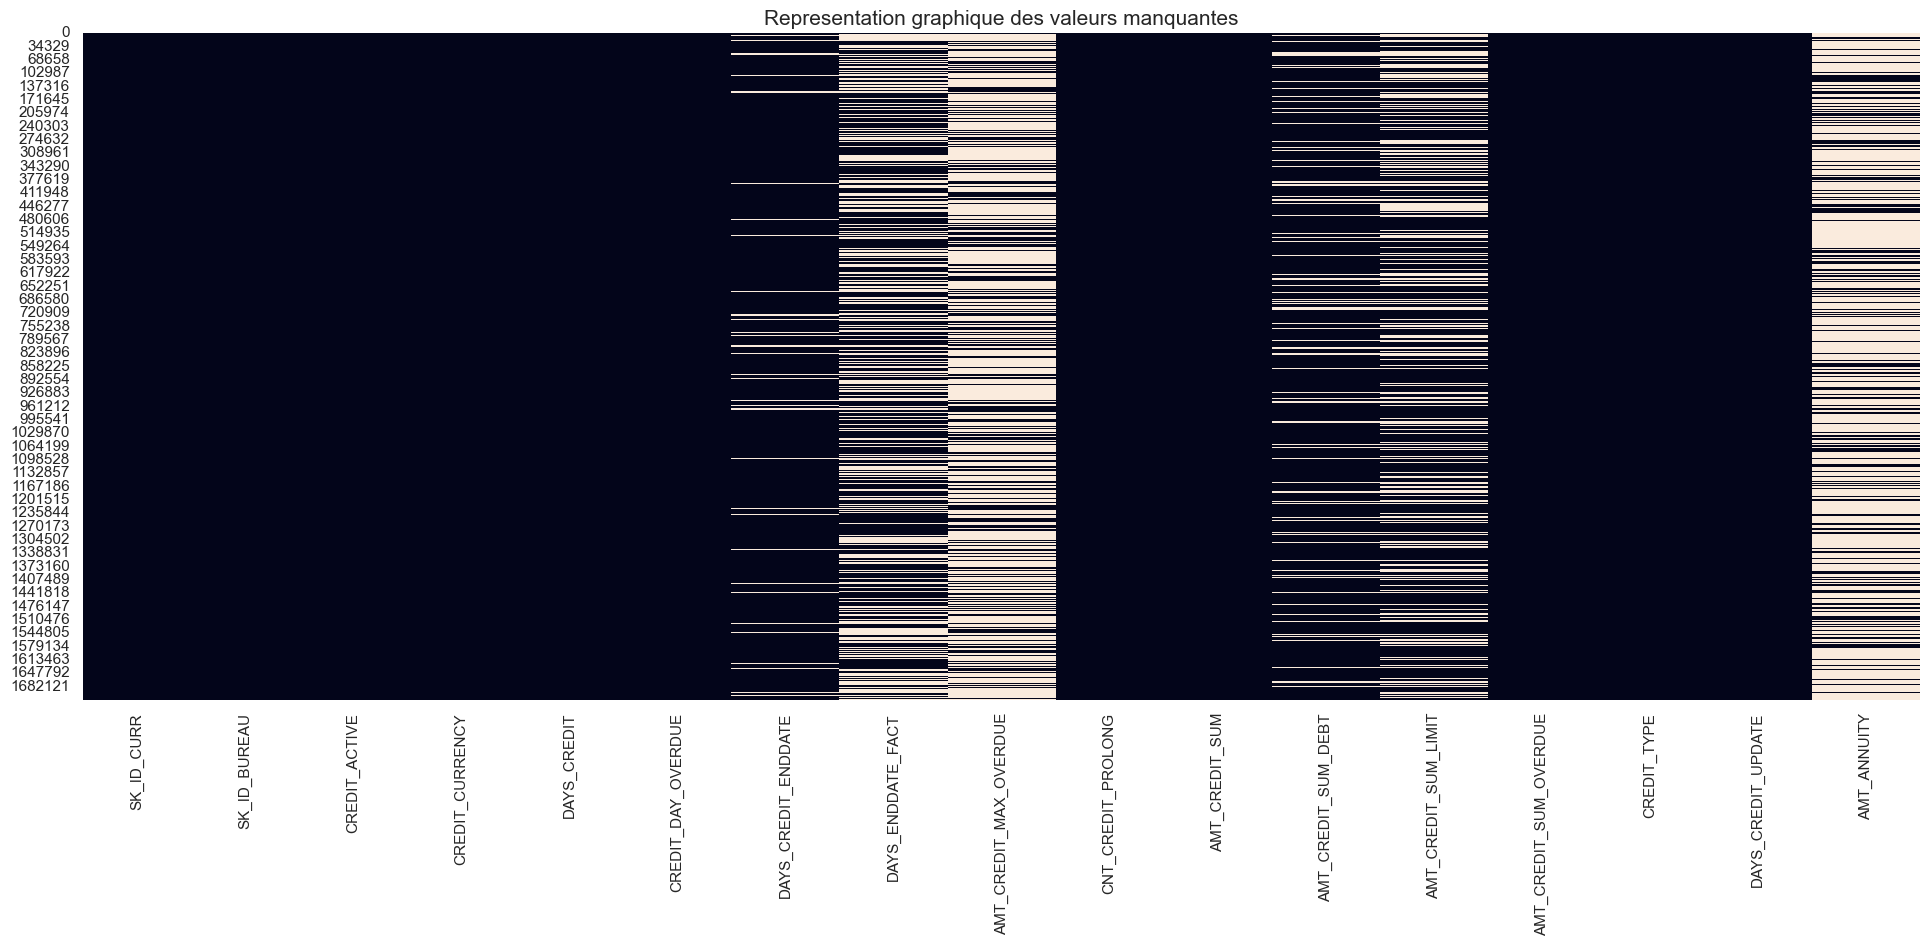

In [49]:
valeurs(bureau)

1716428 produits
17 variables

Type des variables:
 float64    8
int64      6
object     3
Name: count, dtype: int64


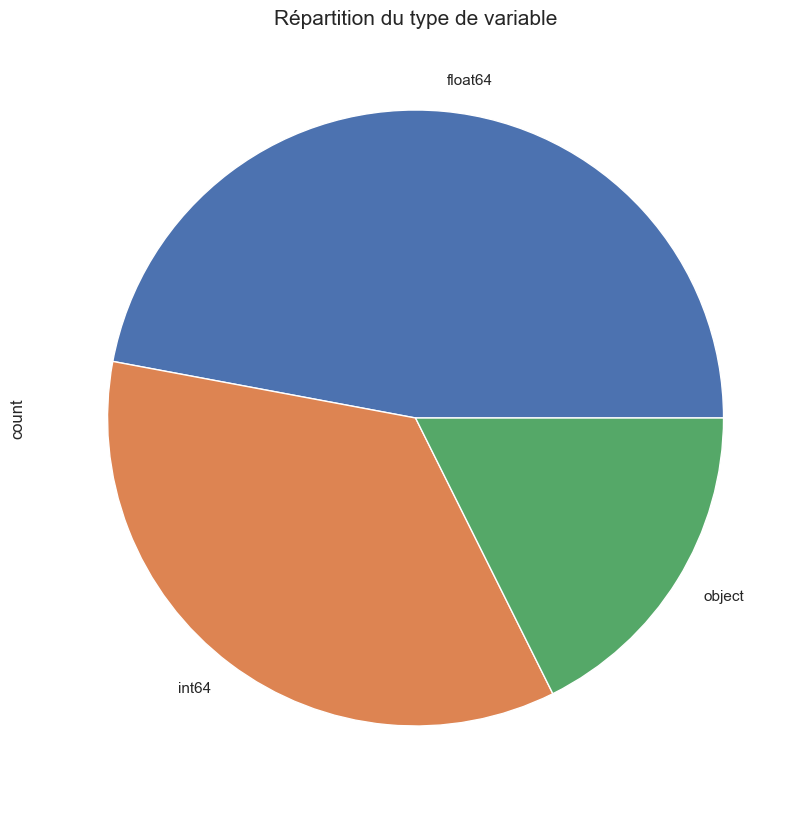

In [50]:
format_data(bureau)

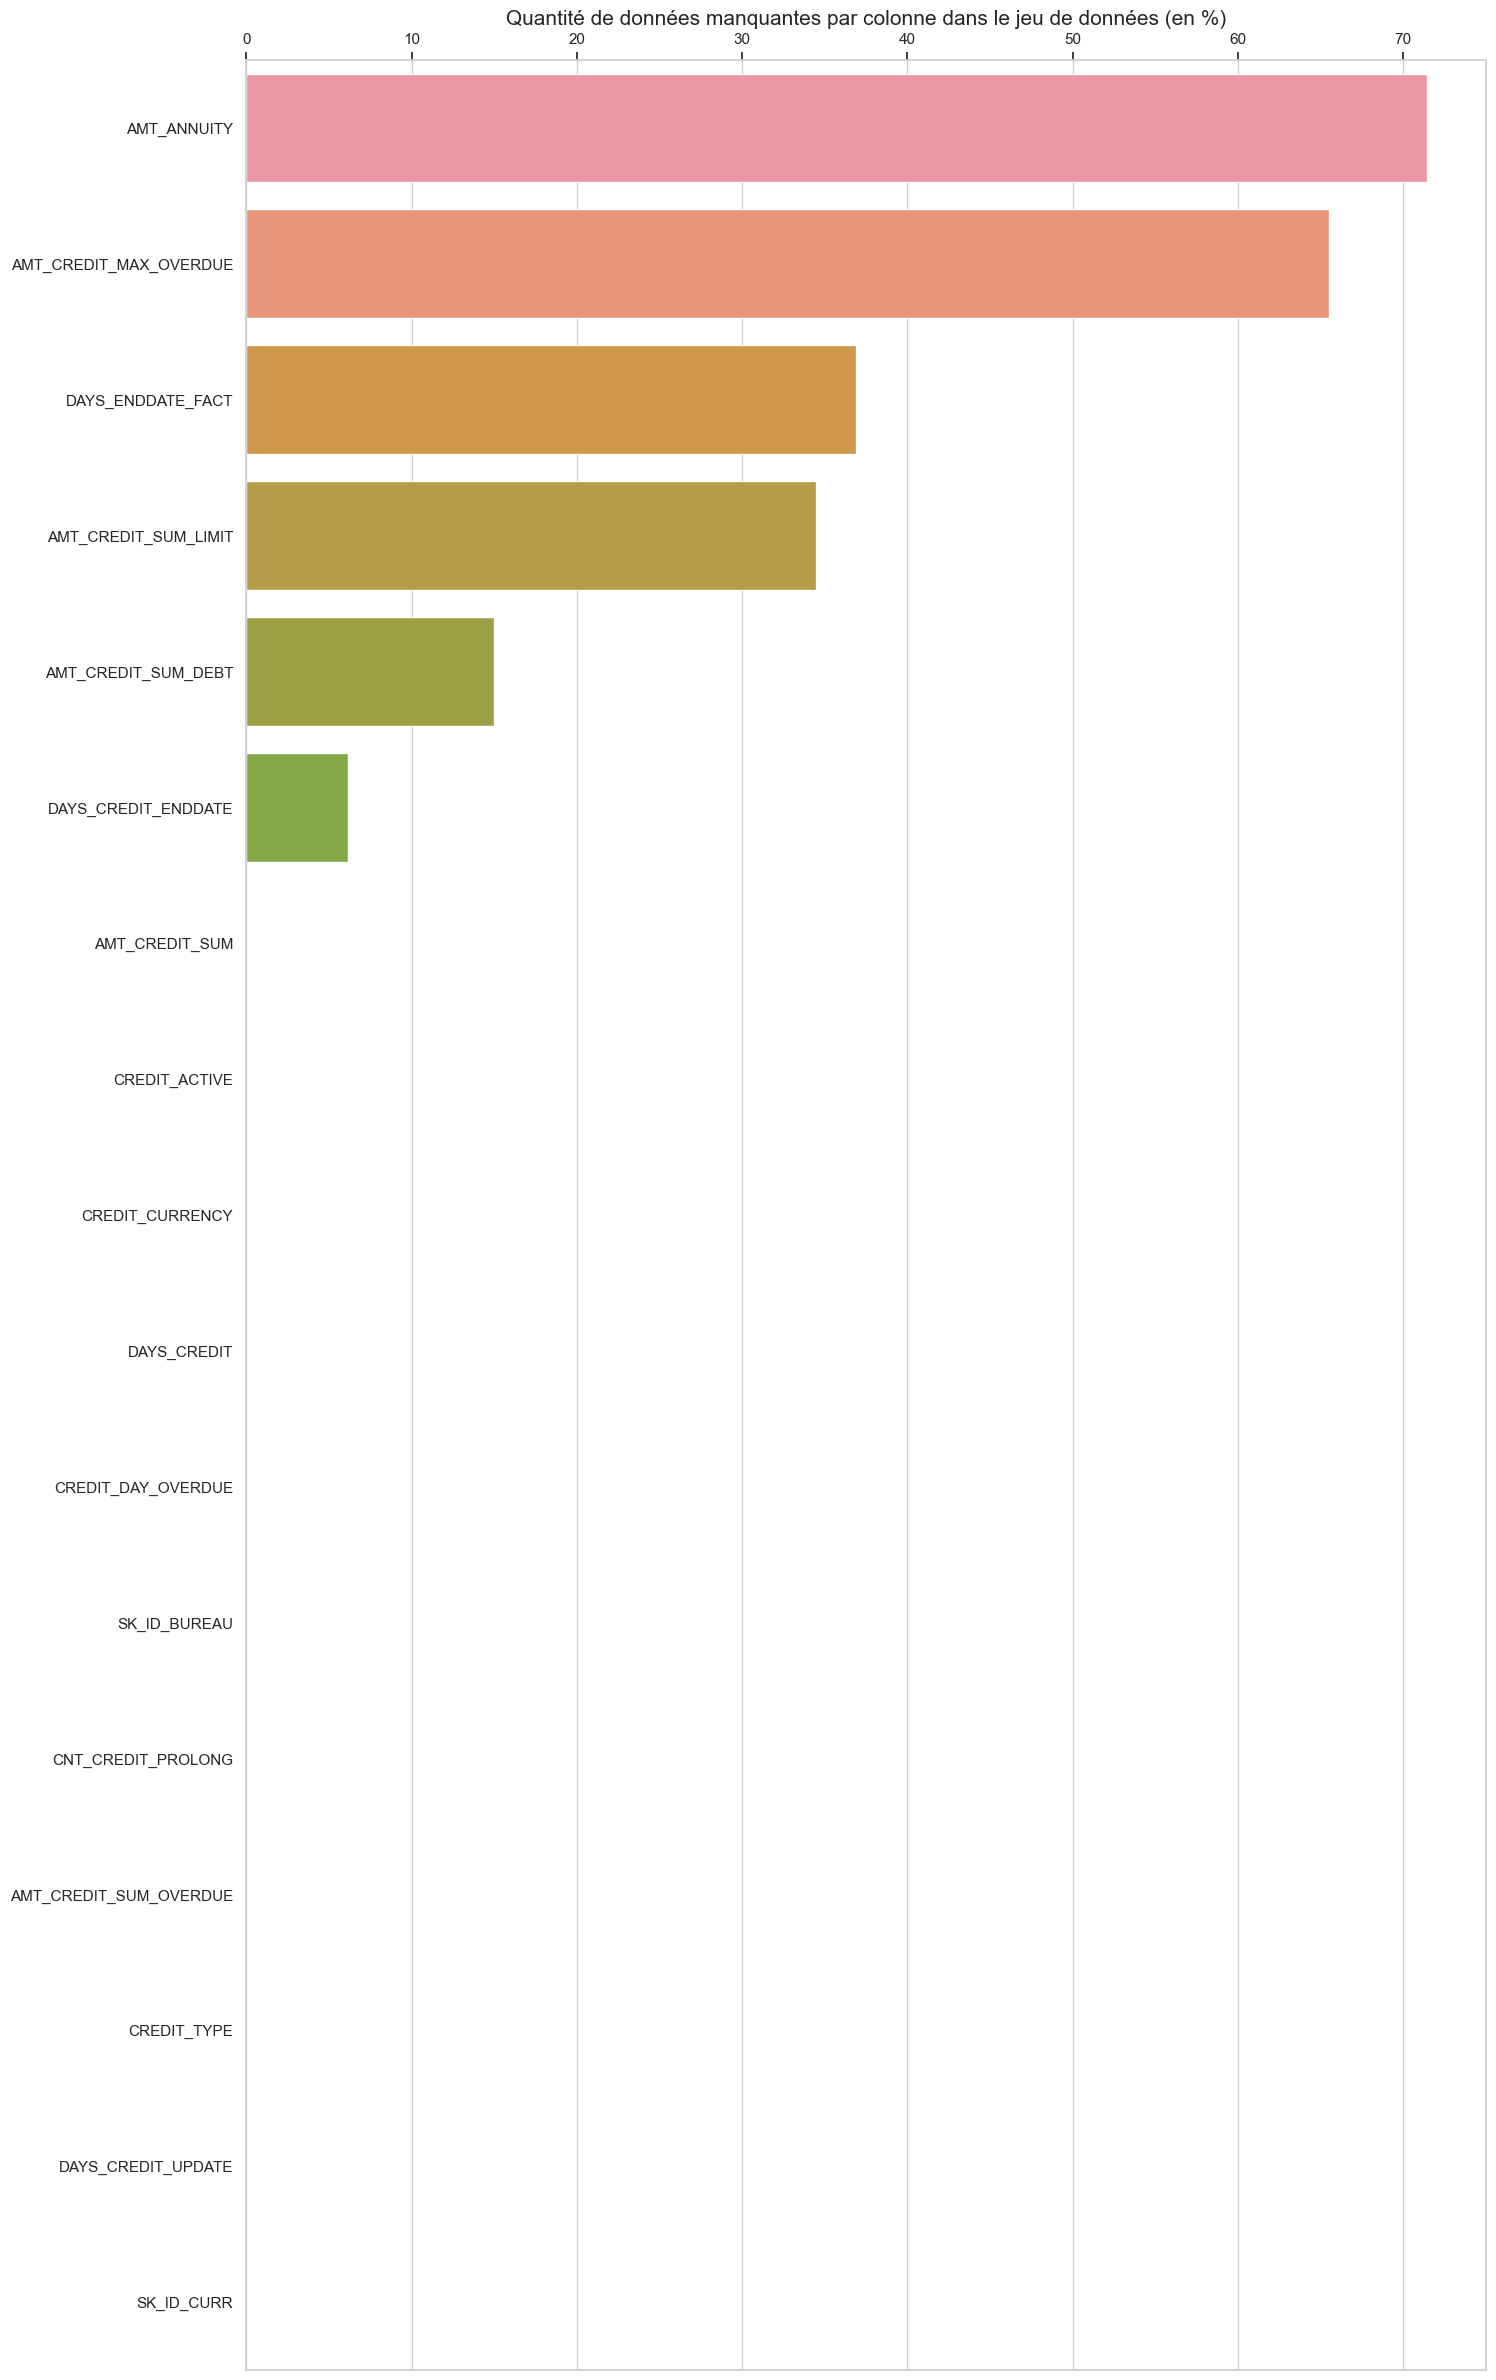

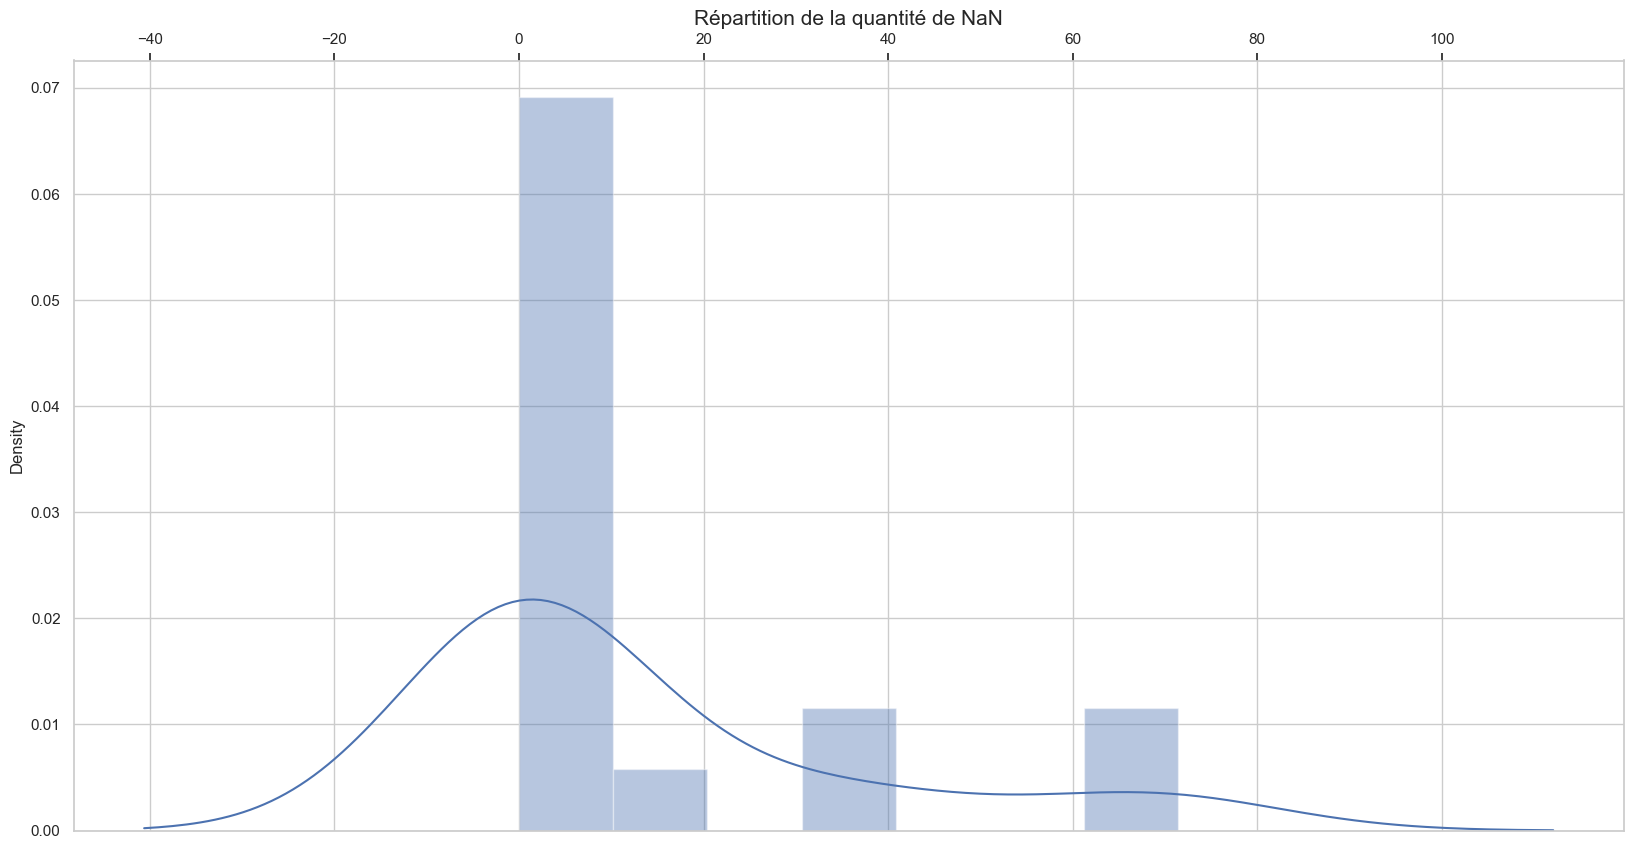

In [51]:
moduleexplo.proportion_nan(bureau)

In [52]:

pd.set_option('max_colwidth', None)
test=[row for row in hc_desc['Table'] if ('bureau') in row]
desc_bureau = hc_desc[hc_desc['Table'].isin(test)][['Row', 'Description']]
desc = desc_bureau.head(20)
print(tabulate(desc))

---  ----------------------  ------------------------------------------------------------------------------------------------------------------
122  SK_ID_CURR              ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau
123  SK_BUREAU_ID            Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application)
124  CREDIT_ACTIVE           Status of the Credit Bureau (CB) reported credits
125  CREDIT_CURRENCY         Recoded currency of the Credit Bureau credit
126  DAYS_CREDIT             How many days before current application did client apply for Credit Bureau credit
127  CREDIT_DAY_OVERDUE      Number of days past due on CB credit at the time of application for related loan in our sample
128  DAYS_CREDIT_ENDDATE     Remaining duration of CB credit (in days) at the time of application in Home Credit
129  DAYS_ENDDATE_FACT       Days since CB credit ended at the time of appl

In [53]:
view_bureau = bureau.head(200).T
print(tabulate(view_bureau))

----------------------  ---------------  -----------  ---------------  -----------  ---------------  -----------  ---------------  ---------------  ---------------  -----------  -----------  ---------------  ----------  ---------------  -----------  ---------------  ---------------  ---------------  -----------  ---------------  -----------  -----------  -----------  ---------------  ---------------  ---------------  ----------  ---------------  ---------------  ---------------  ---------------  -----------  -----------  ---------------  -----------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  -----------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  -----------  ---------------  ---------------  -----------  ---------------  ---------------  ---------------  -----------  ---------------  ---------------  ---------------  ---------------  

## cc_balance

Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

In [54]:
info(cc_balance)

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0

Taille :-------------------------------------------------------------- (3840312, 23)
----------------------------------------------------------------------------------------------------
Types :float64    15
int64       7
object      1
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Types :SK_ID_PREV                      int64
SK_ID_CURR                      int64
MONTHS_BALANCE                  int64
AMT_BALANCE                   float64
AMT_CREDIT_LIMIT_ACTUAL         int64
AMT_DRAWINGS_ATM_CURRENT      float64
AMT_DRAWINGS_CURRENT          float64
AMT_DRAWINGS_OTHER_CURRENT    float64
AMT_DRAWINGS_POS_CURRENT      float64
AMT_INST_MIN_REGULARITY       float64
AMT_PAYMENT_CURRENT           float64
AMT_PAYMENT_TOTAL_CURRENT     float64
AMT_RECEIVABLE_PRINCIPAL      float64
AMT_RECIVABLE                 float64
AMT_TOTAL_RECEIVABLE          float64
CNT_DRAWINGS_ATM_CURRENT      float64
CNT_DRAWINGS_CURRENT   

Le nombre de lignes du fichier est de  3840312 et de son nombre de colonnes est de 23


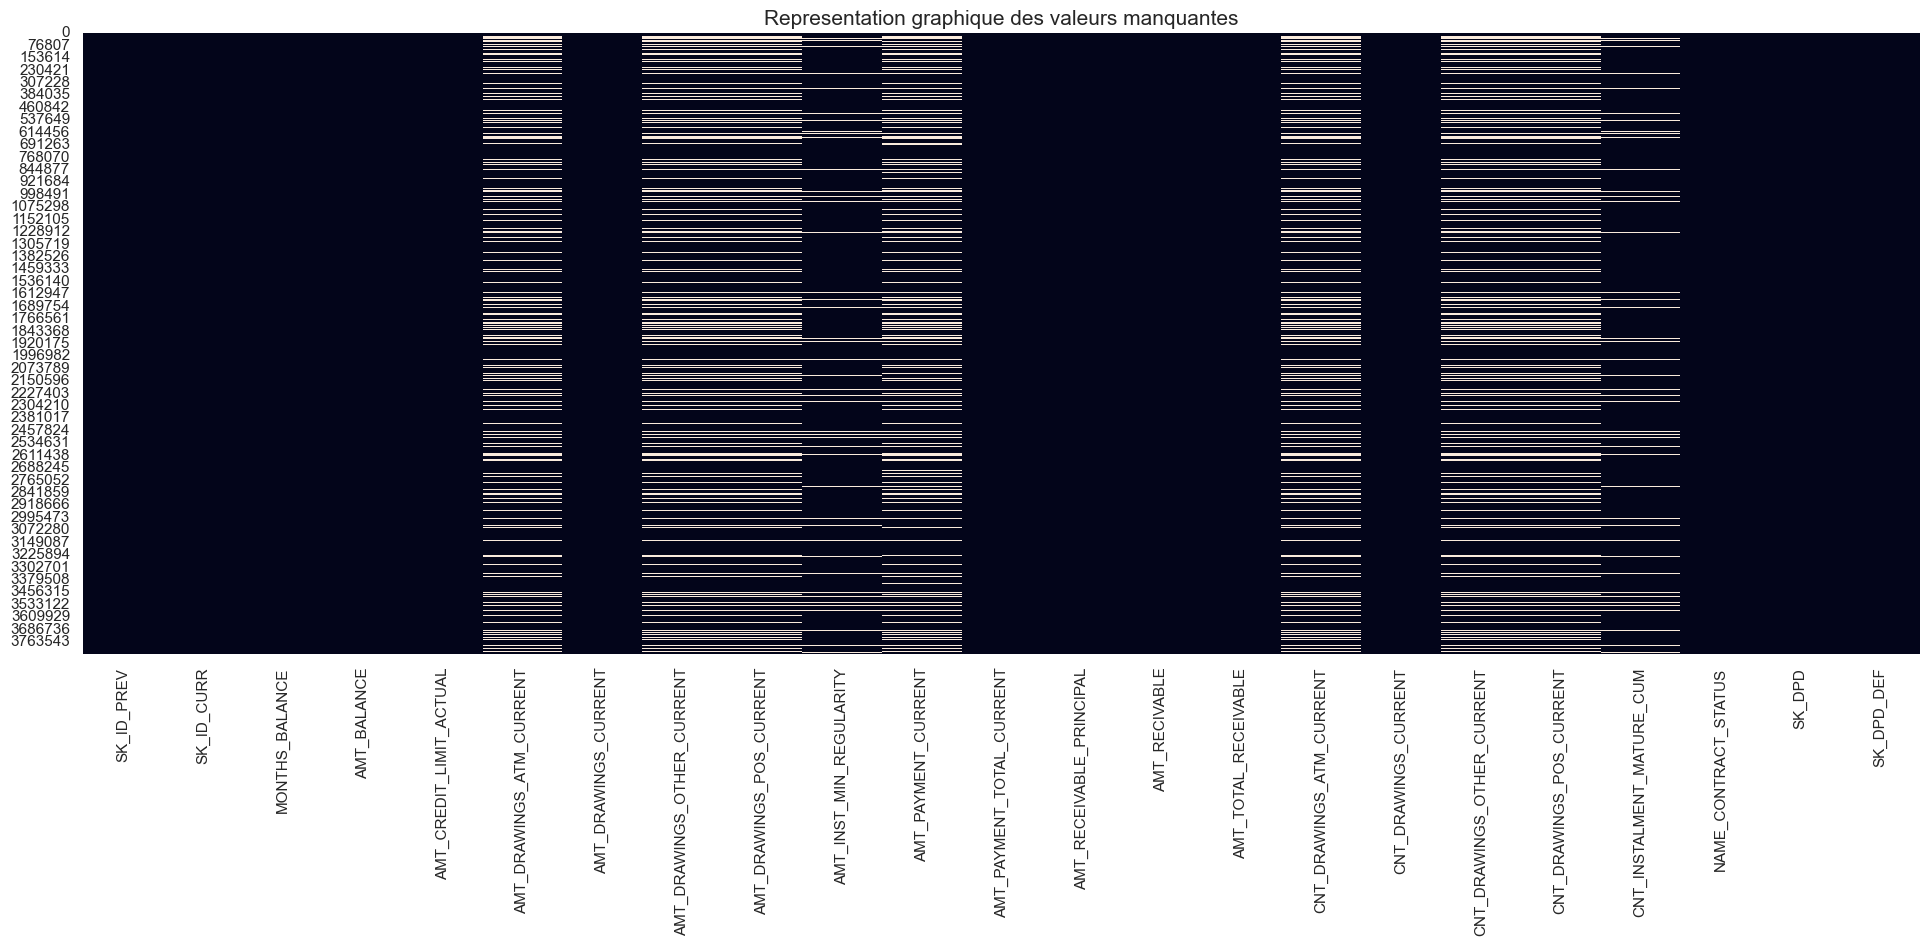

In [55]:
valeurs(cc_balance)

3840312 produits
23 variables

Type des variables:
 float64    15
int64       7
object      1
Name: count, dtype: int64


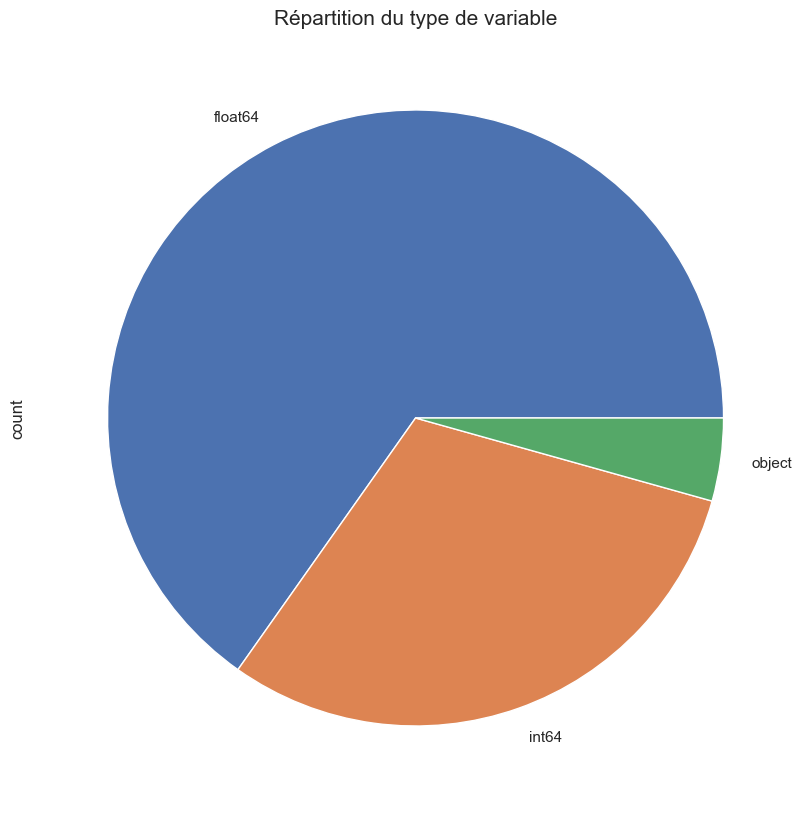

In [56]:
format_data(cc_balance)

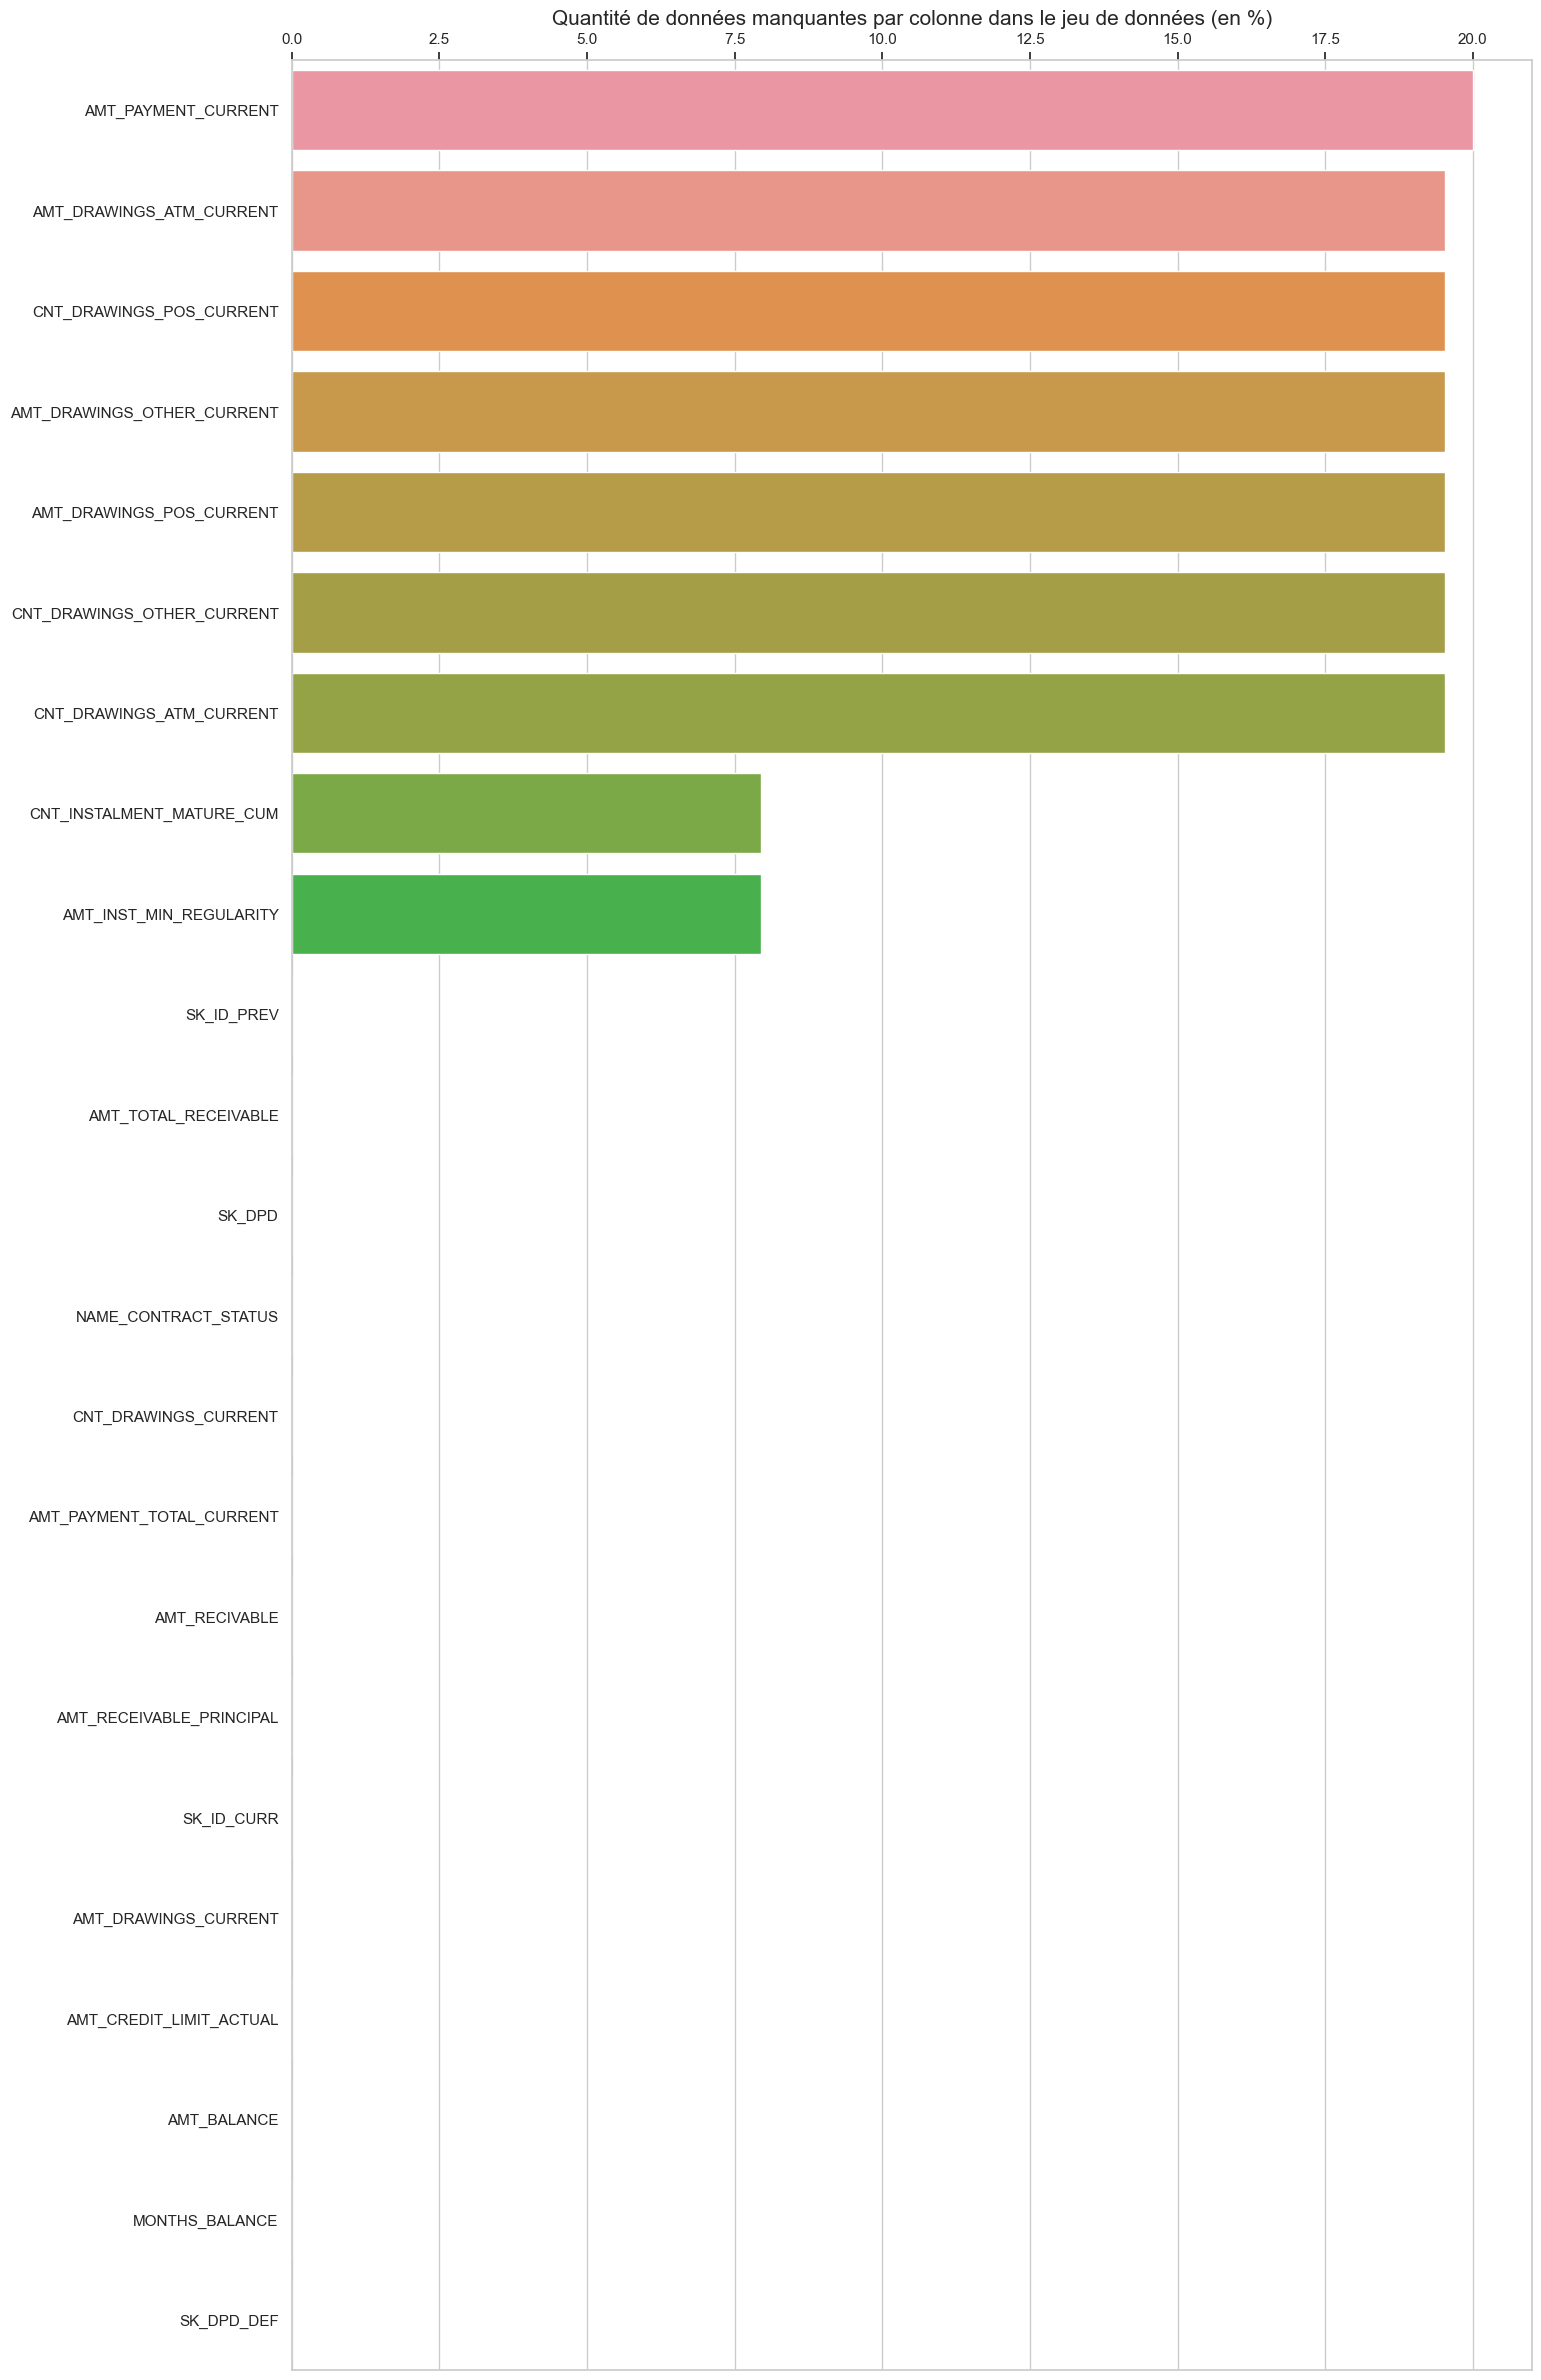

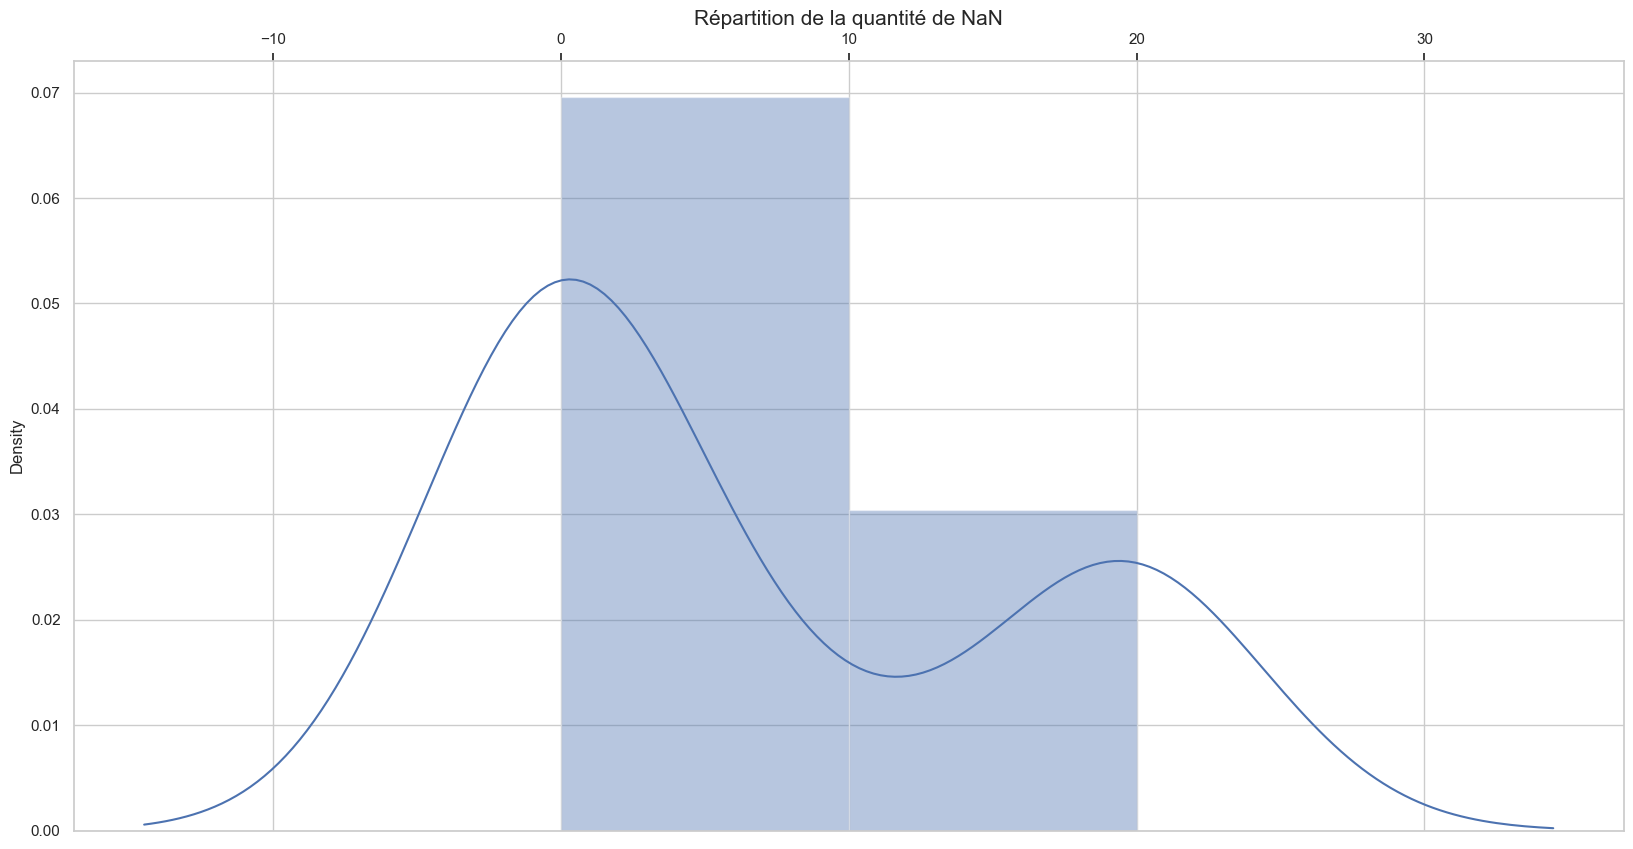

In [57]:
moduleexplo.proportion_nan(cc_balance)

In [58]:

pd.set_option('max_colwidth', None)
test=[row for row in hc_desc['Table'] if ('credit_card_balance') in row]
desc_cc_balance = hc_desc[hc_desc['Table'].isin(test)][['Row', 'Description']]
desc = desc_cc_balance.head(20)
print(tabulate(desc))

---  --------------------------  -------------------------------------------------------------------------------------------------------------------------------------------------
150  SK_ID_PREV                  ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)
151  SK_ID_CURR                  ID of loan in our sample
152  MONTHS_BALANCE              Month of balance relative to application date (-1 means the freshest balance date)
153  AMT_BALANCE                 Balance during the month of previous credit
154  AMT_CREDIT_LIMIT_ACTUAL     Credit card limit during the month of the previous credit
155  AMT_DRAWINGS_ATM_CURRENT    Amount drawing at ATM during the month of the previous credit
156  AMT_DRAWINGS_CURRENT        Amount drawing during the month of the previous credit
157  AMT_DRAWINGS_OTHER_CURRENT  Amount of other drawings during the month of the previous credit
158  AMT_DRAWINGS_P

In [59]:
view_cc_balance = cc_balance.head(50).T
print(tabulate(view_cc_balance))

--------------------------  --------  ---------  ---------  ----------  ----------  ---------  ----------  ---------  ----------  ----------  ---------  ----------  ---------  --------  -------  ---------  ---------  ---------  ---------  ---------  ---------  --------  ---------  ----------  ----------  ----------  ---------  ---------  ----------  -------  ---------  ----------  ----------  ---------  ---------  ----------  -------  ----------  ----------  ----------  ----------  --------  --------  ----------  ---------  -------  ---------  -------  -------  -------
SK_ID_PREV                  2562384   2582071    1740877    1389973     1891521     2646502    1079071     2095912    2181852     1235299     1108284    2740914     1985699    1441883   1864742  2037377    1816636    1039039    2016842    1189095    1104090    1683604   2392920    2021411     1927949     1885349     2024137    2272688    2561523     1288249  1598223    1503450     2332261     2252971    2536108    120467

## installmnt

Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
There is : 

a) one row for every payment that was made plus 

b) one row each for missed payment.


One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

In [60]:
info(installmnt)

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000

Taille :-------------------------------------------------------------- (13605401, 8)
----------------------------------------------------------------------------------------------------
Types :float64    5
int64      3
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Types :SK_ID_PREV                  int64
SK_ID_CURR                  int64
NUM_INSTALMENT_VERSION    float64
NUM_INSTALMENT_NUMBER       int64
DAYS_INSTALMENT           float64
DAYS_ENTRY_PAYMENT        float64
AMT_INSTALMENT            float64
AMT_PAYMENT               float64
dtype: object
----------------------------------------------------------------------------------------------------
Valeurs manquantes par colonnes (%): 
DAYS_ENTRY_PAYMENT        0.02
AMT_PAYMENT               0.02
SK_ID_PREV                0.00
SK_ID_CURR                0.00
NUM_INSTALMENT_VERSION    0.00
NUM_INSTALMENT_NUMBER     0.00
DAYS_INSTALMENT           0.00
AMT_I

Le nombre de lignes du fichier est de  13605401 et de son nombre de colonnes est de 8


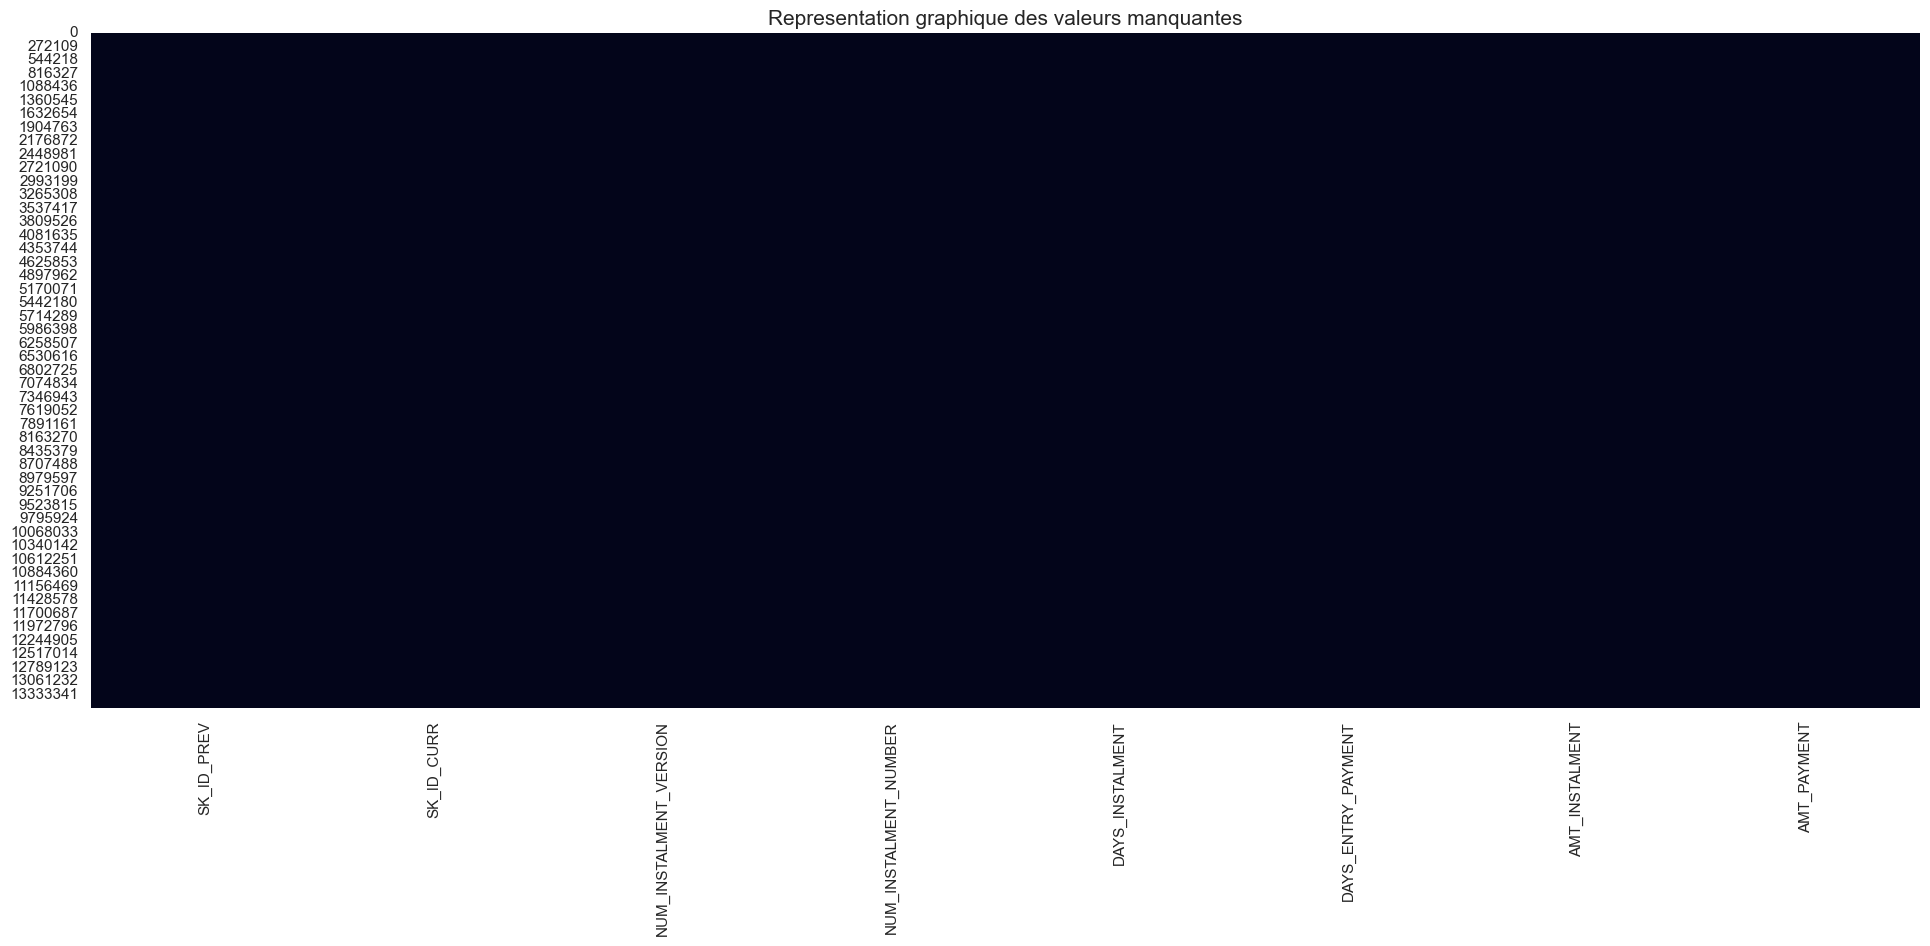

In [61]:
valeurs(installmnt)

13605401 produits
8 variables

Type des variables:
 float64    5
int64      3
Name: count, dtype: int64


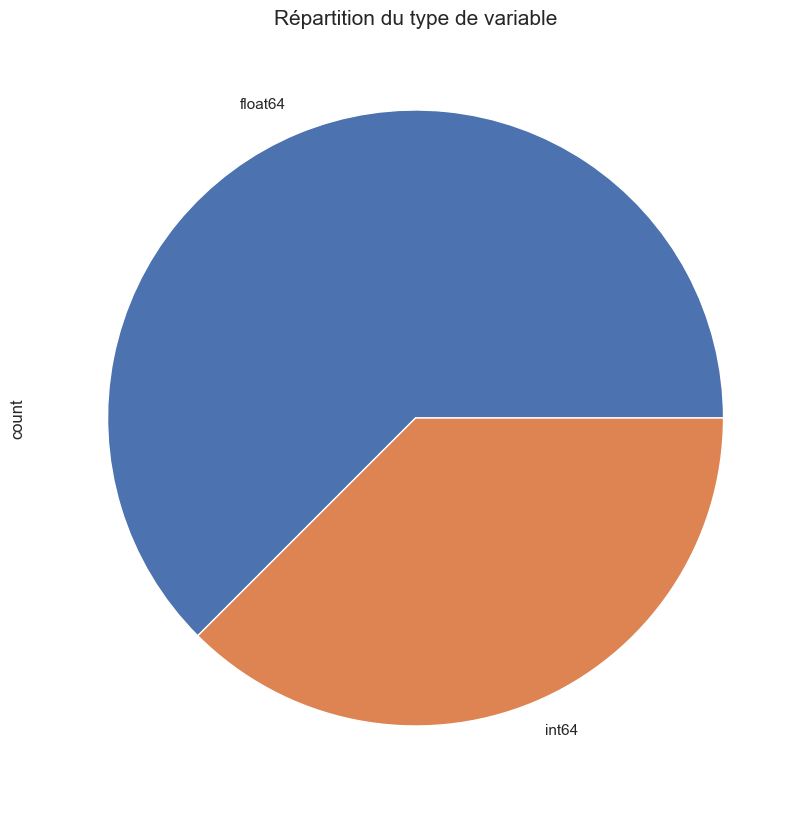

In [62]:
format_data(installmnt)

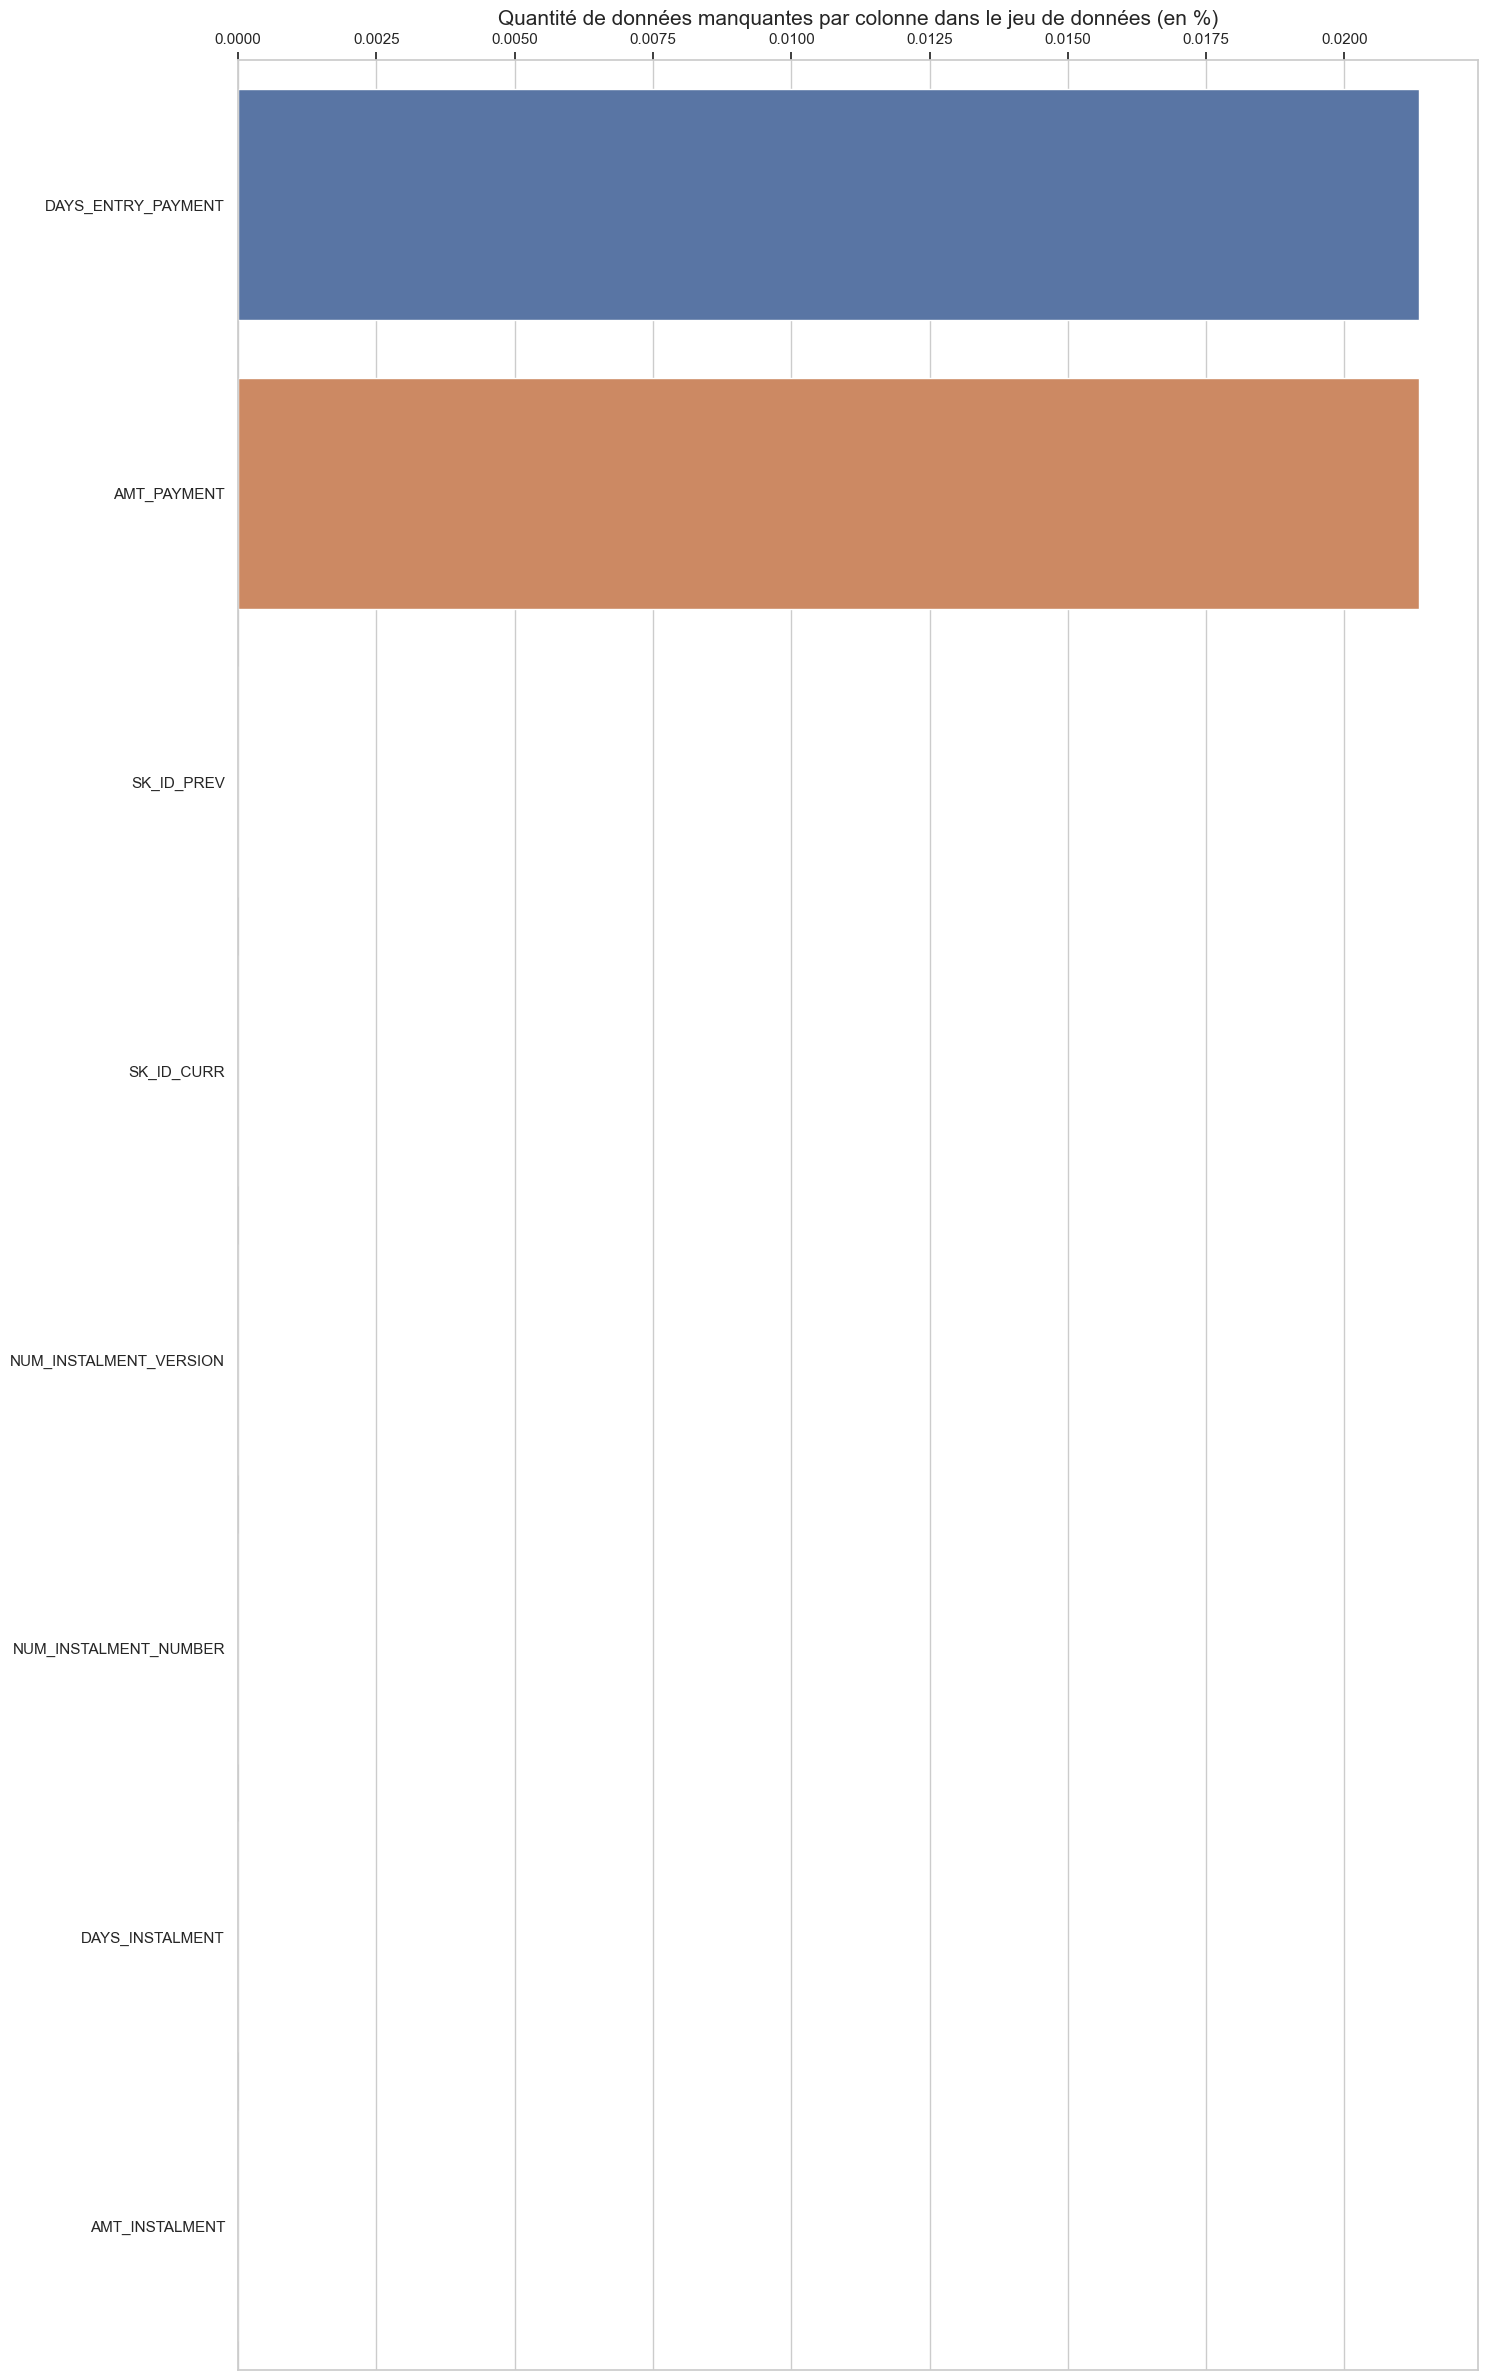

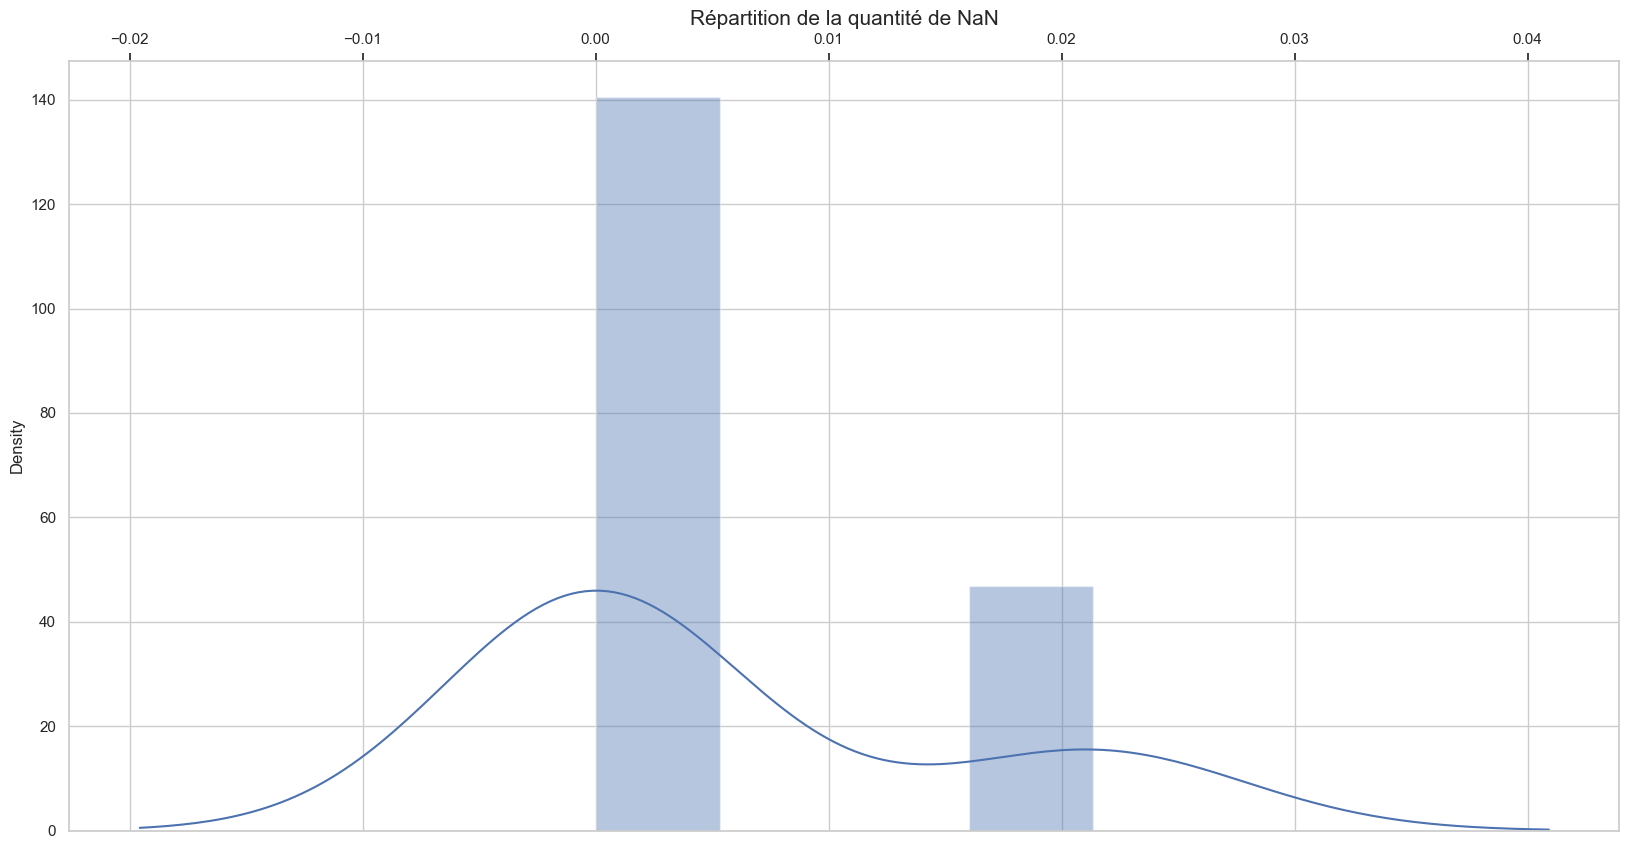

In [63]:
moduleexplo.proportion_nan(installmnt)

In [64]:

pd.set_option('max_colwidth', None)
test=[row for row in hc_desc['Table'] if ('installments_payments') in row]
desc_bureau = hc_desc[hc_desc['Table'].isin(test)][['Row', 'Description']]
desc = desc_bureau.head(20)
print(tabulate(desc))

---  ----------------------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
211  SK_ID_PREV              ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)
212  SK_ID_CURR              ID of loan in our sample
213  NUM_INSTALMENT_VERSION  Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed
214  NUM_INSTALMENT_NUMBER   On which installment we observe payment
215  DAYS_INSTALMENT         When the installment of previous credit was supposed to be paid (relative to application date of current loan)
216  DAYS_ENTRY_PAYMENT      When was the installments of previous credit paid actually (relative to application date of current l

In [65]:
view_installmnt = installmnt.head(10).T
print(tabulate(view_installmnt))

----------------------  ----------------  ----------------  ----------------  ----------------  ----------------  ----------------  ----------------  ---------------  ----------------  ----------------
SK_ID_PREV                   1.05419e+06       1.33083e+06       2.08523e+06       2.45253e+06       2.71472e+06       1.13731e+06       2.23426e+06       1.8186e+06       2.72318e+06       1.41399e+06
SK_ID_CURR              161674            151639            193053            199697            167756            164489            184693            111420           112102            109741
NUM_INSTALMENT_VERSION       1                 0                 2                 1                 1                 1                 4                 2                0                 1
NUM_INSTALMENT_NUMBER        6                34                 1                 3                 2                12                11                 4               14                 4
DAYS_INSTALMENT     

## POS

nstantanés mensuels du solde des points de vente précédents et des prêts en espèces que le demandeur avait contractés avec Home Credit.
Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent dans Home Credit (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon - c'est-à-dire que le tableau a (#prêts dans l'échantillon * # de crédits précédents relatifs * # de mois dans lequel nous avons un historique observable pour les lignes des crédits précédents).

In [66]:
info(POS)

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0

Taille :-------------------------------------------------------------- (10001358, 8)
----------------------------------------------------------------------------------------------------
Types :int64      5
float64    2
object     1
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Types :SK_ID_PREV                 int64
SK_ID_CURR                 int64
MONTHS_BALANCE             int64
CNT_INSTALMENT           float64
CNT_INSTALMENT_FUTURE    float64
NAME_CONTRACT_STATUS      object
SK_DPD                     int64
SK_DPD_DEF                 int64
dtype: object
----------------------------------------------------------------------------------------------------
Valeurs manquantes par colonnes (%): 
CNT_INSTALMENT           0.26
CNT_INSTALMENT_FUTURE    0.26
SK_ID_PREV               0.00
SK_ID_CURR               0.00
MONTHS_BALANCE           0.00
NAME_CONTRACT_STATUS     0.00
SK_DPD                   0.00
SK_DPD_

Le nombre de lignes du fichier est de  10001358 et de son nombre de colonnes est de 8


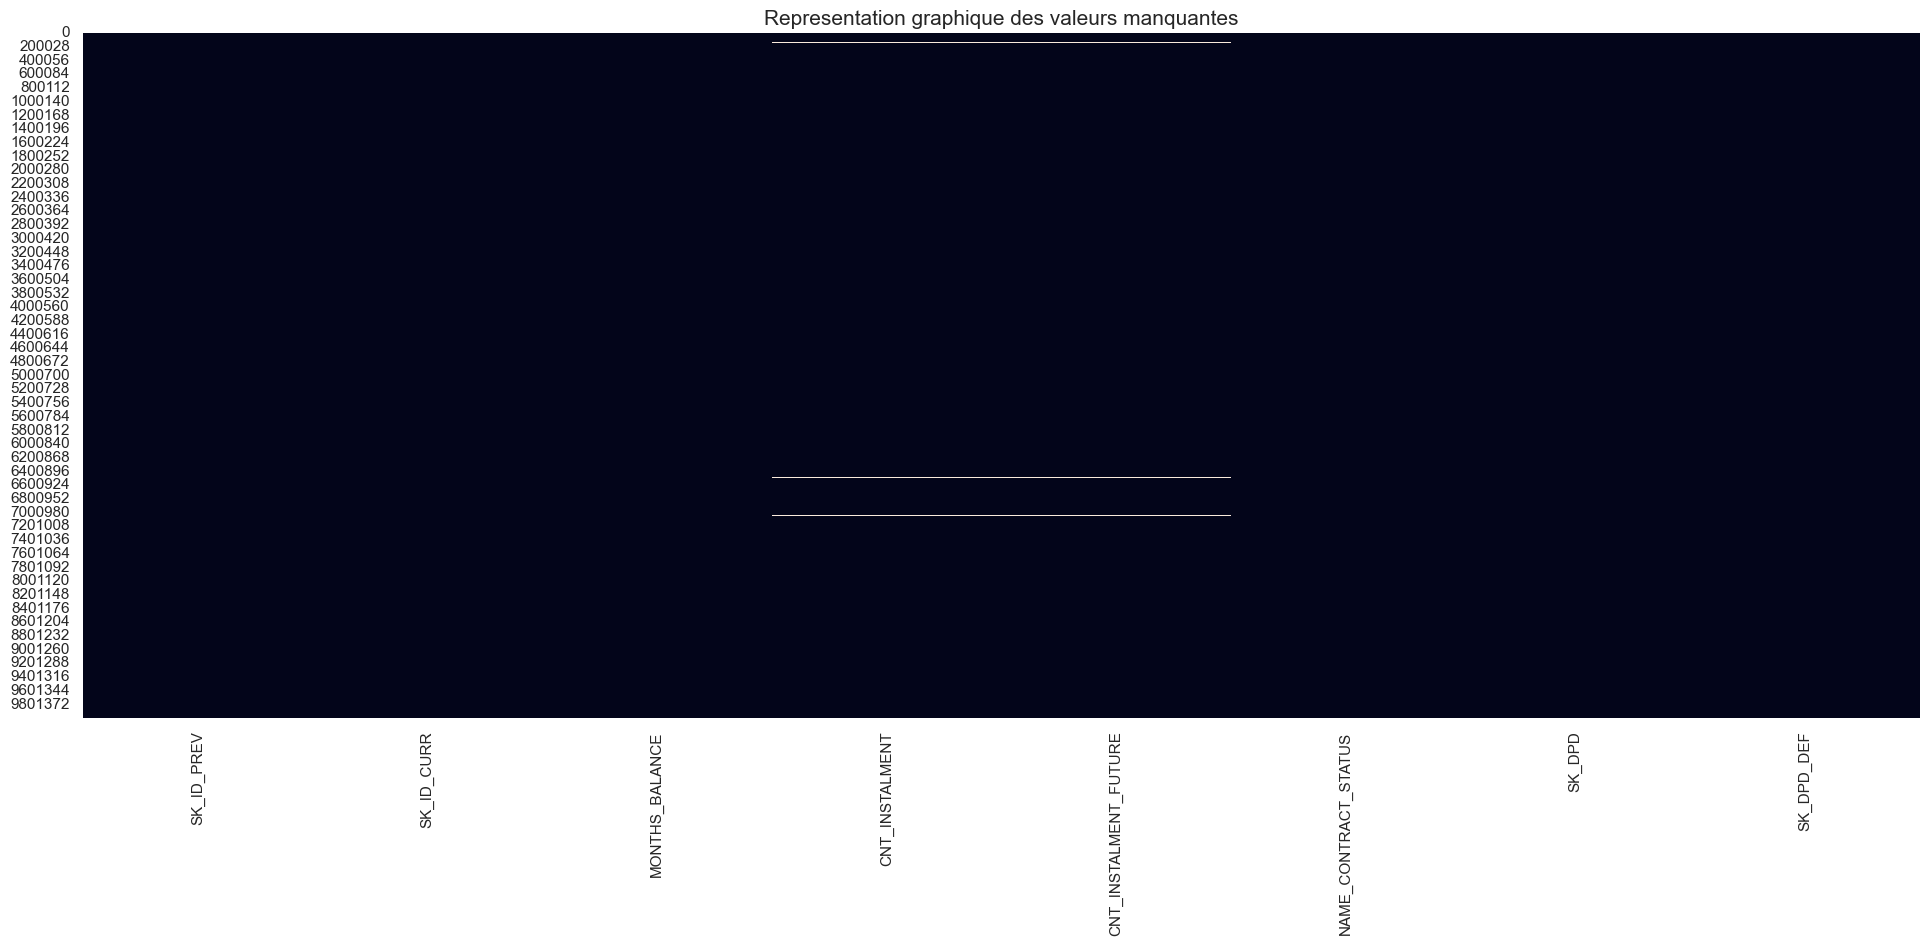

In [67]:
valeurs(POS)

10001358 produits
8 variables

Type des variables:
 int64      5
float64    2
object     1
Name: count, dtype: int64


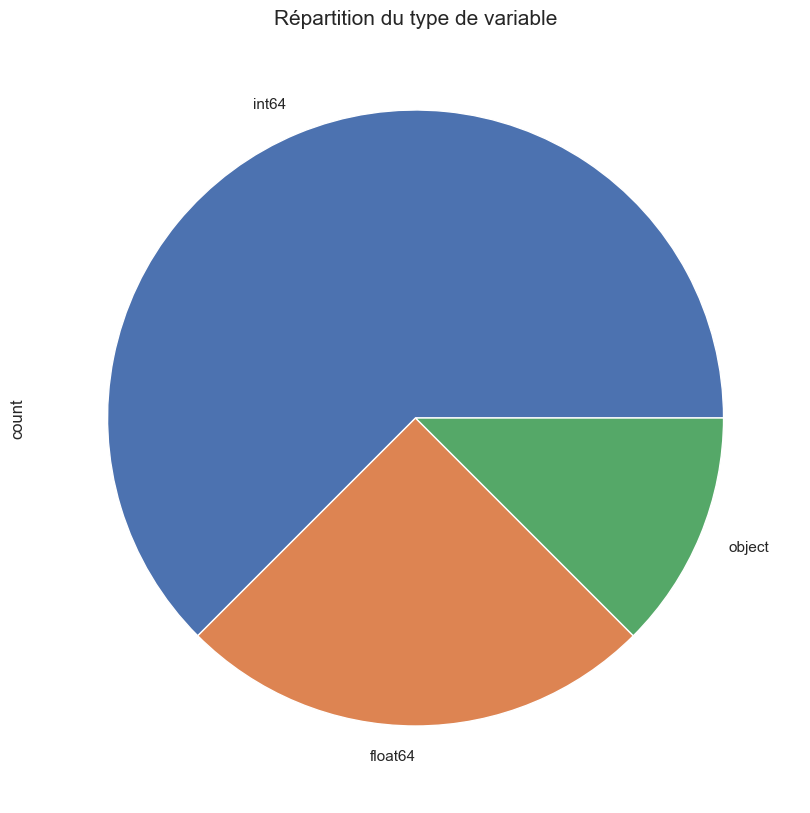

In [68]:
format_data(POS)

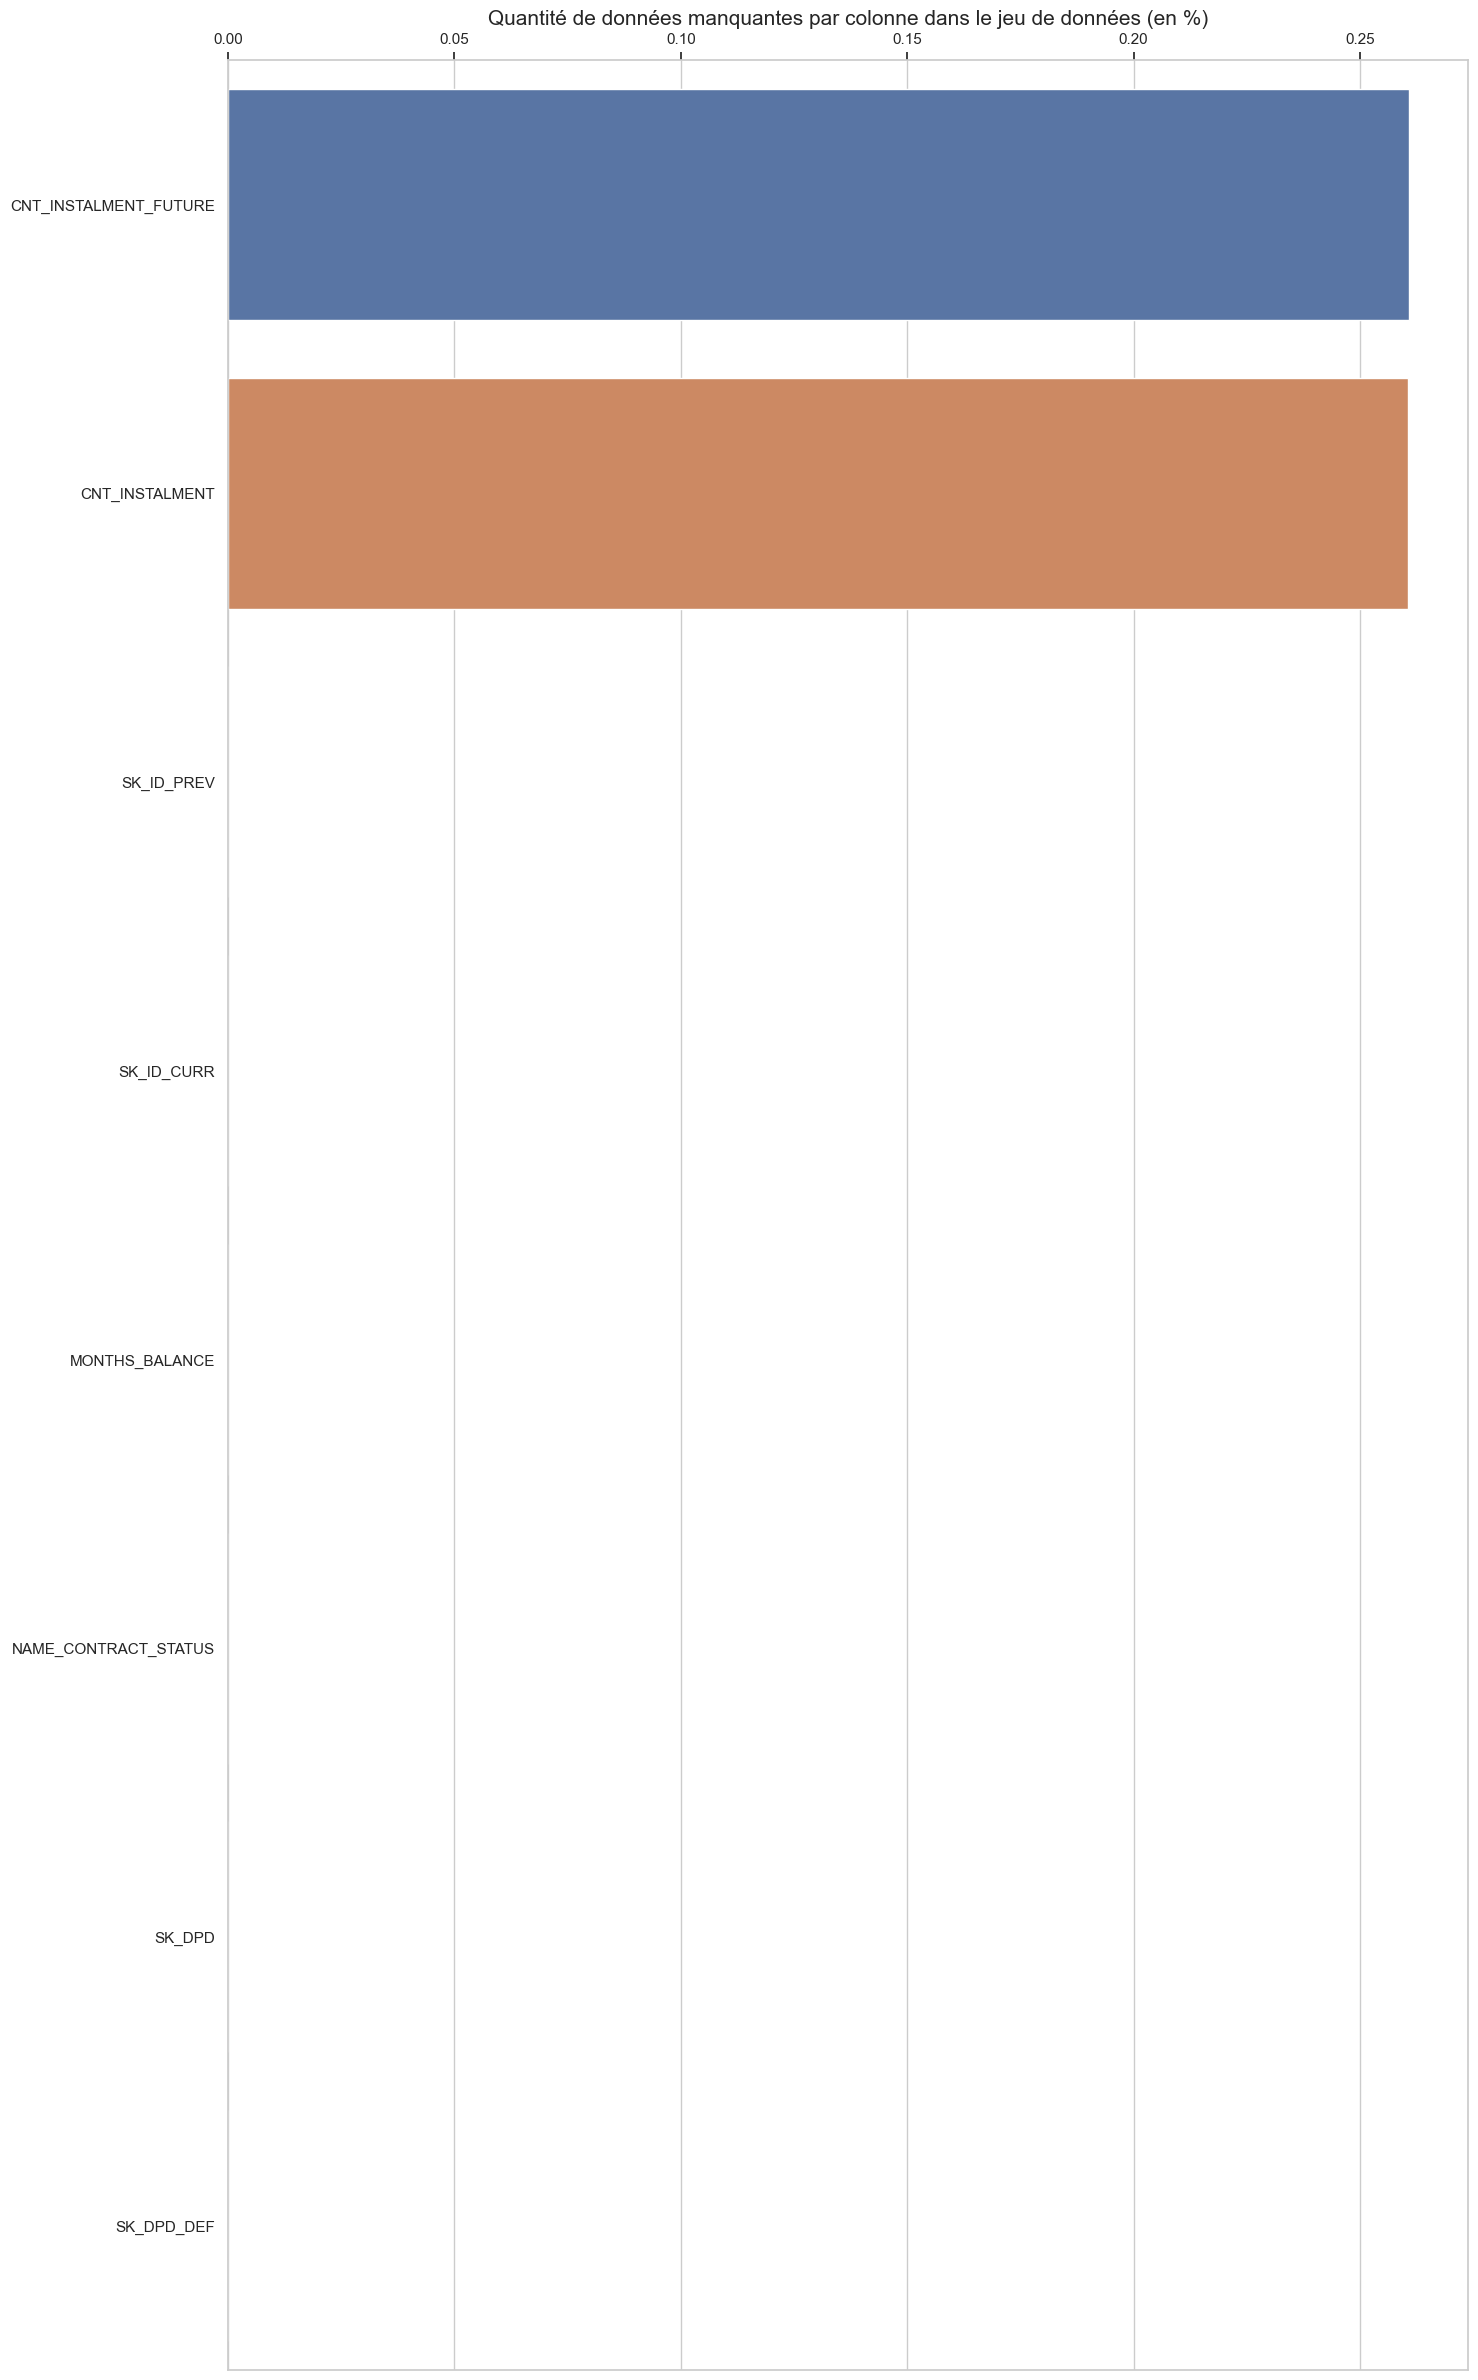

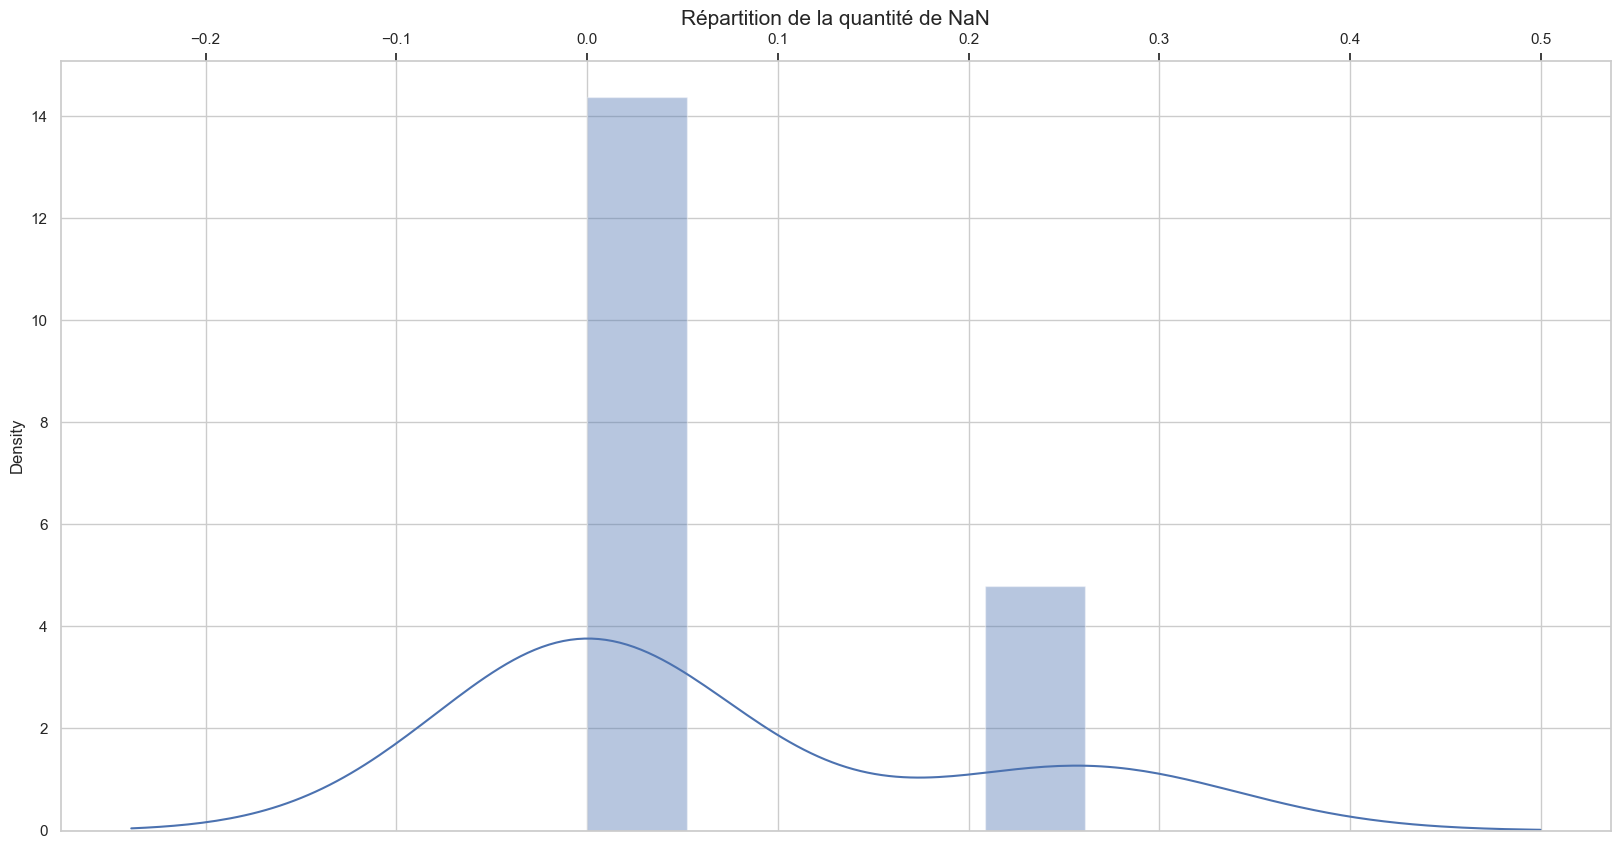

In [69]:
moduleexplo.proportion_nan(POS)

In [70]:

pd.set_option('max_colwidth', None)
test=[row for row in hc_desc['Table'] if ('POS') in row]
desc_bureau = hc_desc[hc_desc['Table'].isin(test)][['Row', 'Description']]
desc = desc_bureau.head(20)
print(tabulate(desc))

---  ---------------------  --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
142  SK_ID_PREV             ID of previous credit in Home Credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)
143  SK_ID_CURR             ID of loan in our sample
144  MONTHS_BALANCE         Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )
145  CNT_INSTALMENT         Term of previous credit (can change over time)
146  CNT_INSTALMENT_FUTURE  Installments left to pay on the previous credit
147  NAME_CONTRACT_STATUS   Contract status during the m

In [71]:
view_POS = POS.head(10).T
print(tabulate(view_POS))

---------------------  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------
SK_ID_PREV             1803195  1715348  1784872  1903291  2341044  2207092  1110516  1387235  1220500  2371489
SK_ID_CURR             182943   367990   397406   269225   334279   342166   204376   153211   112740   274851
MONTHS_BALANCE         -31      -33      -32      -35      -35      -32      -38      -35      -31      -32
CNT_INSTALMENT         48.0     36.0     12.0     48.0     36.0     12.0     48.0     36.0     12.0     24.0
CNT_INSTALMENT_FUTURE  45.0     35.0     9.0      42.0     35.0     12.0     43.0     36.0     12.0     16.0
NAME_CONTRACT_STATUS   Active   Active   Active   Active   Active   Active   Active   Active   Active   Active
SK_DPD                 0        0        0        0        0        0        0        0        0        0
SK_DPD_DEF             0        0        0        0        0        0        0        0        0        0
----------------

## prv_app

Toutes les demandes précédentes de prêts immobiliers des clients qui ont des prêts dans notre échantillon.
Il y a une ligne pour chaque demande précédente liée aux prêts dans notre échantillon de données.

In [72]:
info(prv_app)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0                0.18283   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                   0.86734                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1          -134.0                      916.0       365243.0          365243.0   
2          -271.0                       59.0       365243.0          365243.0   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        1.0

Taille :-------------------------------------------------------------- (1670214, 37)
----------------------------------------------------------------------------------------------------
Types :object     16
float64    15
int64       6
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Types :SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CO

Le nombre de lignes du fichier est de  1670214 et de son nombre de colonnes est de 37


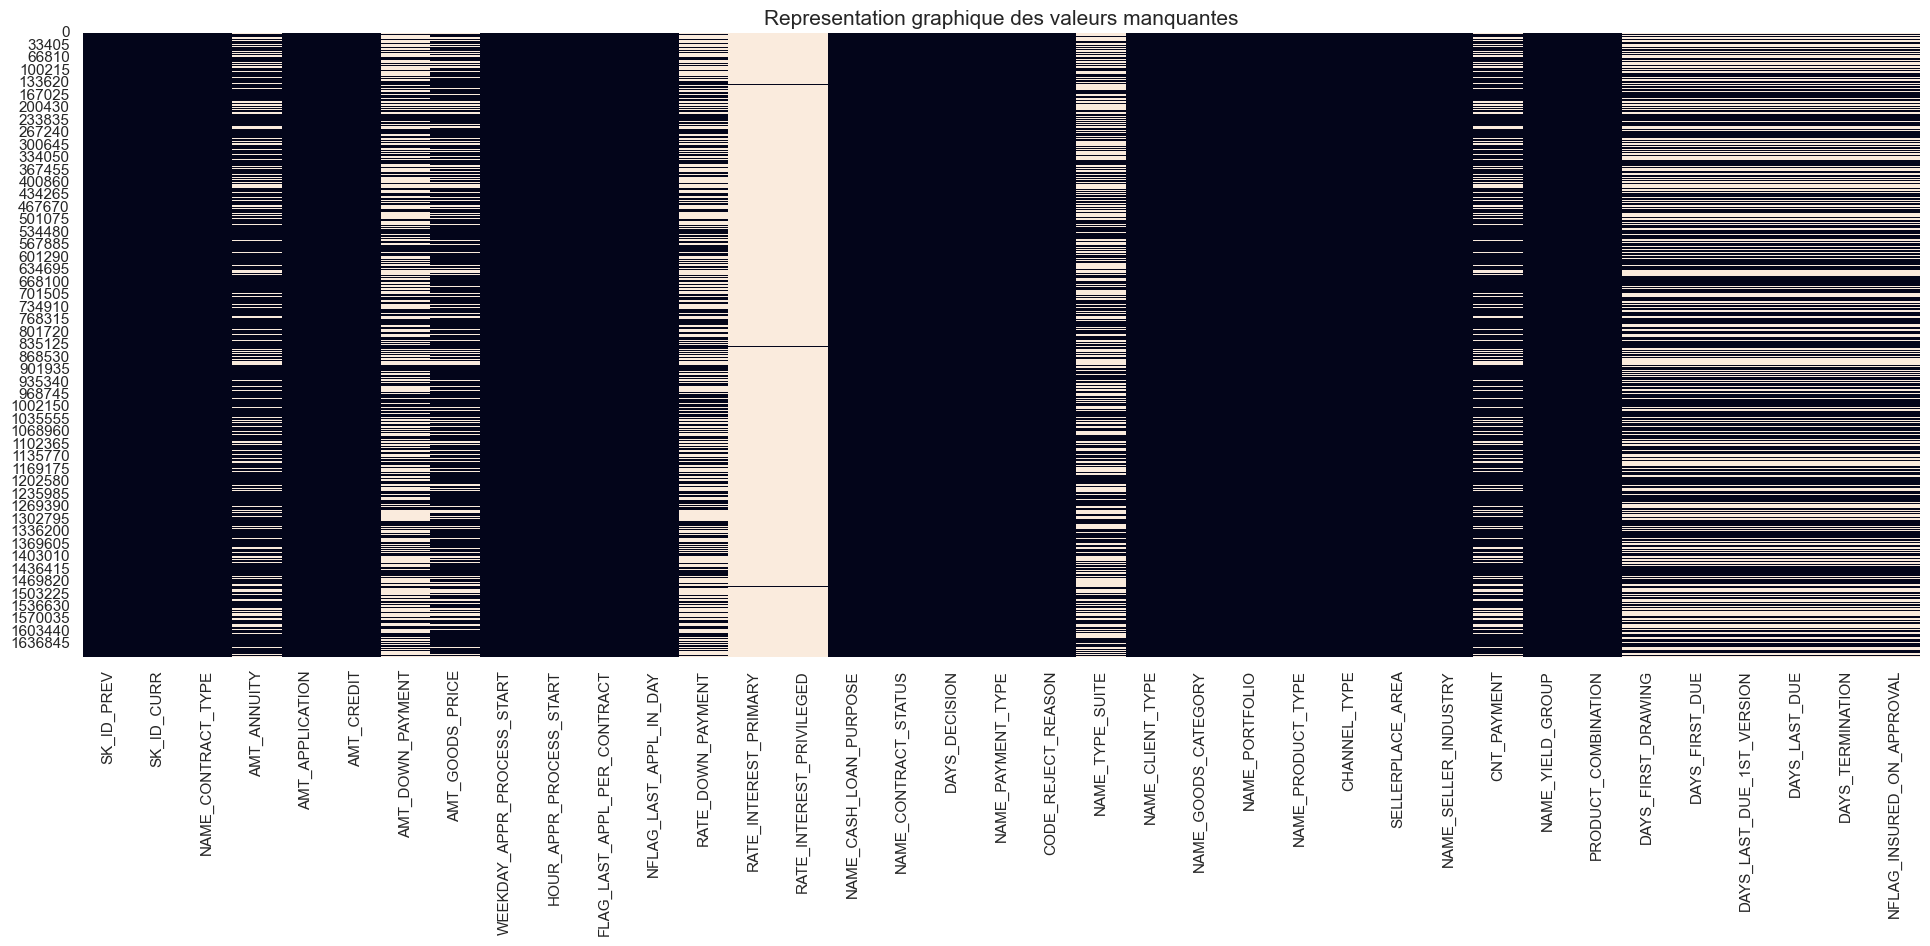

In [73]:
valeurs(prv_app)

1670214 produits
37 variables

Type des variables:
 object     16
float64    15
int64       6
Name: count, dtype: int64


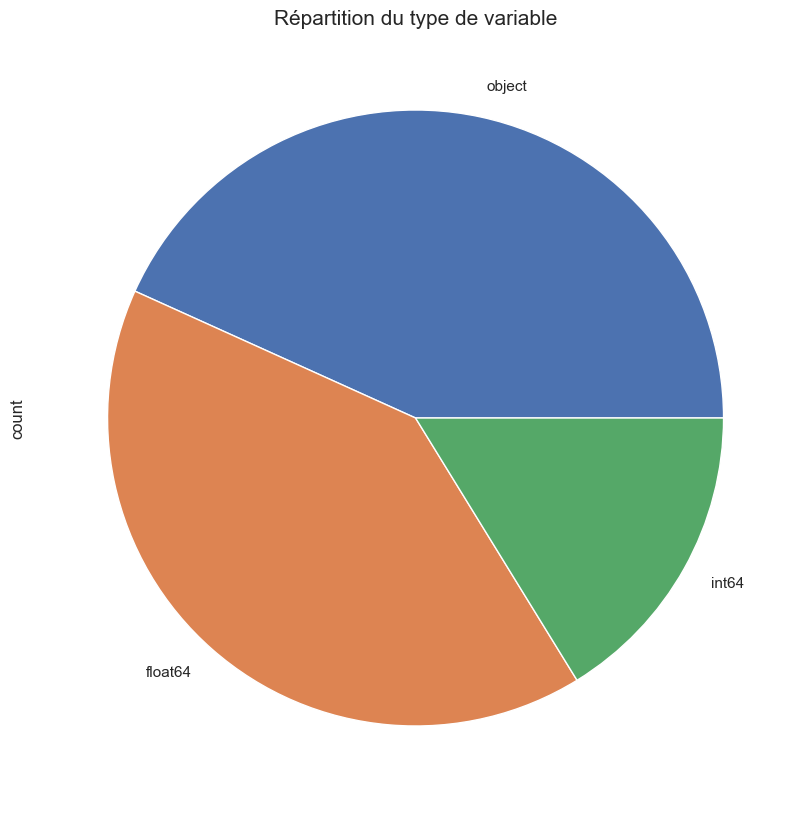

In [74]:
format_data(prv_app)

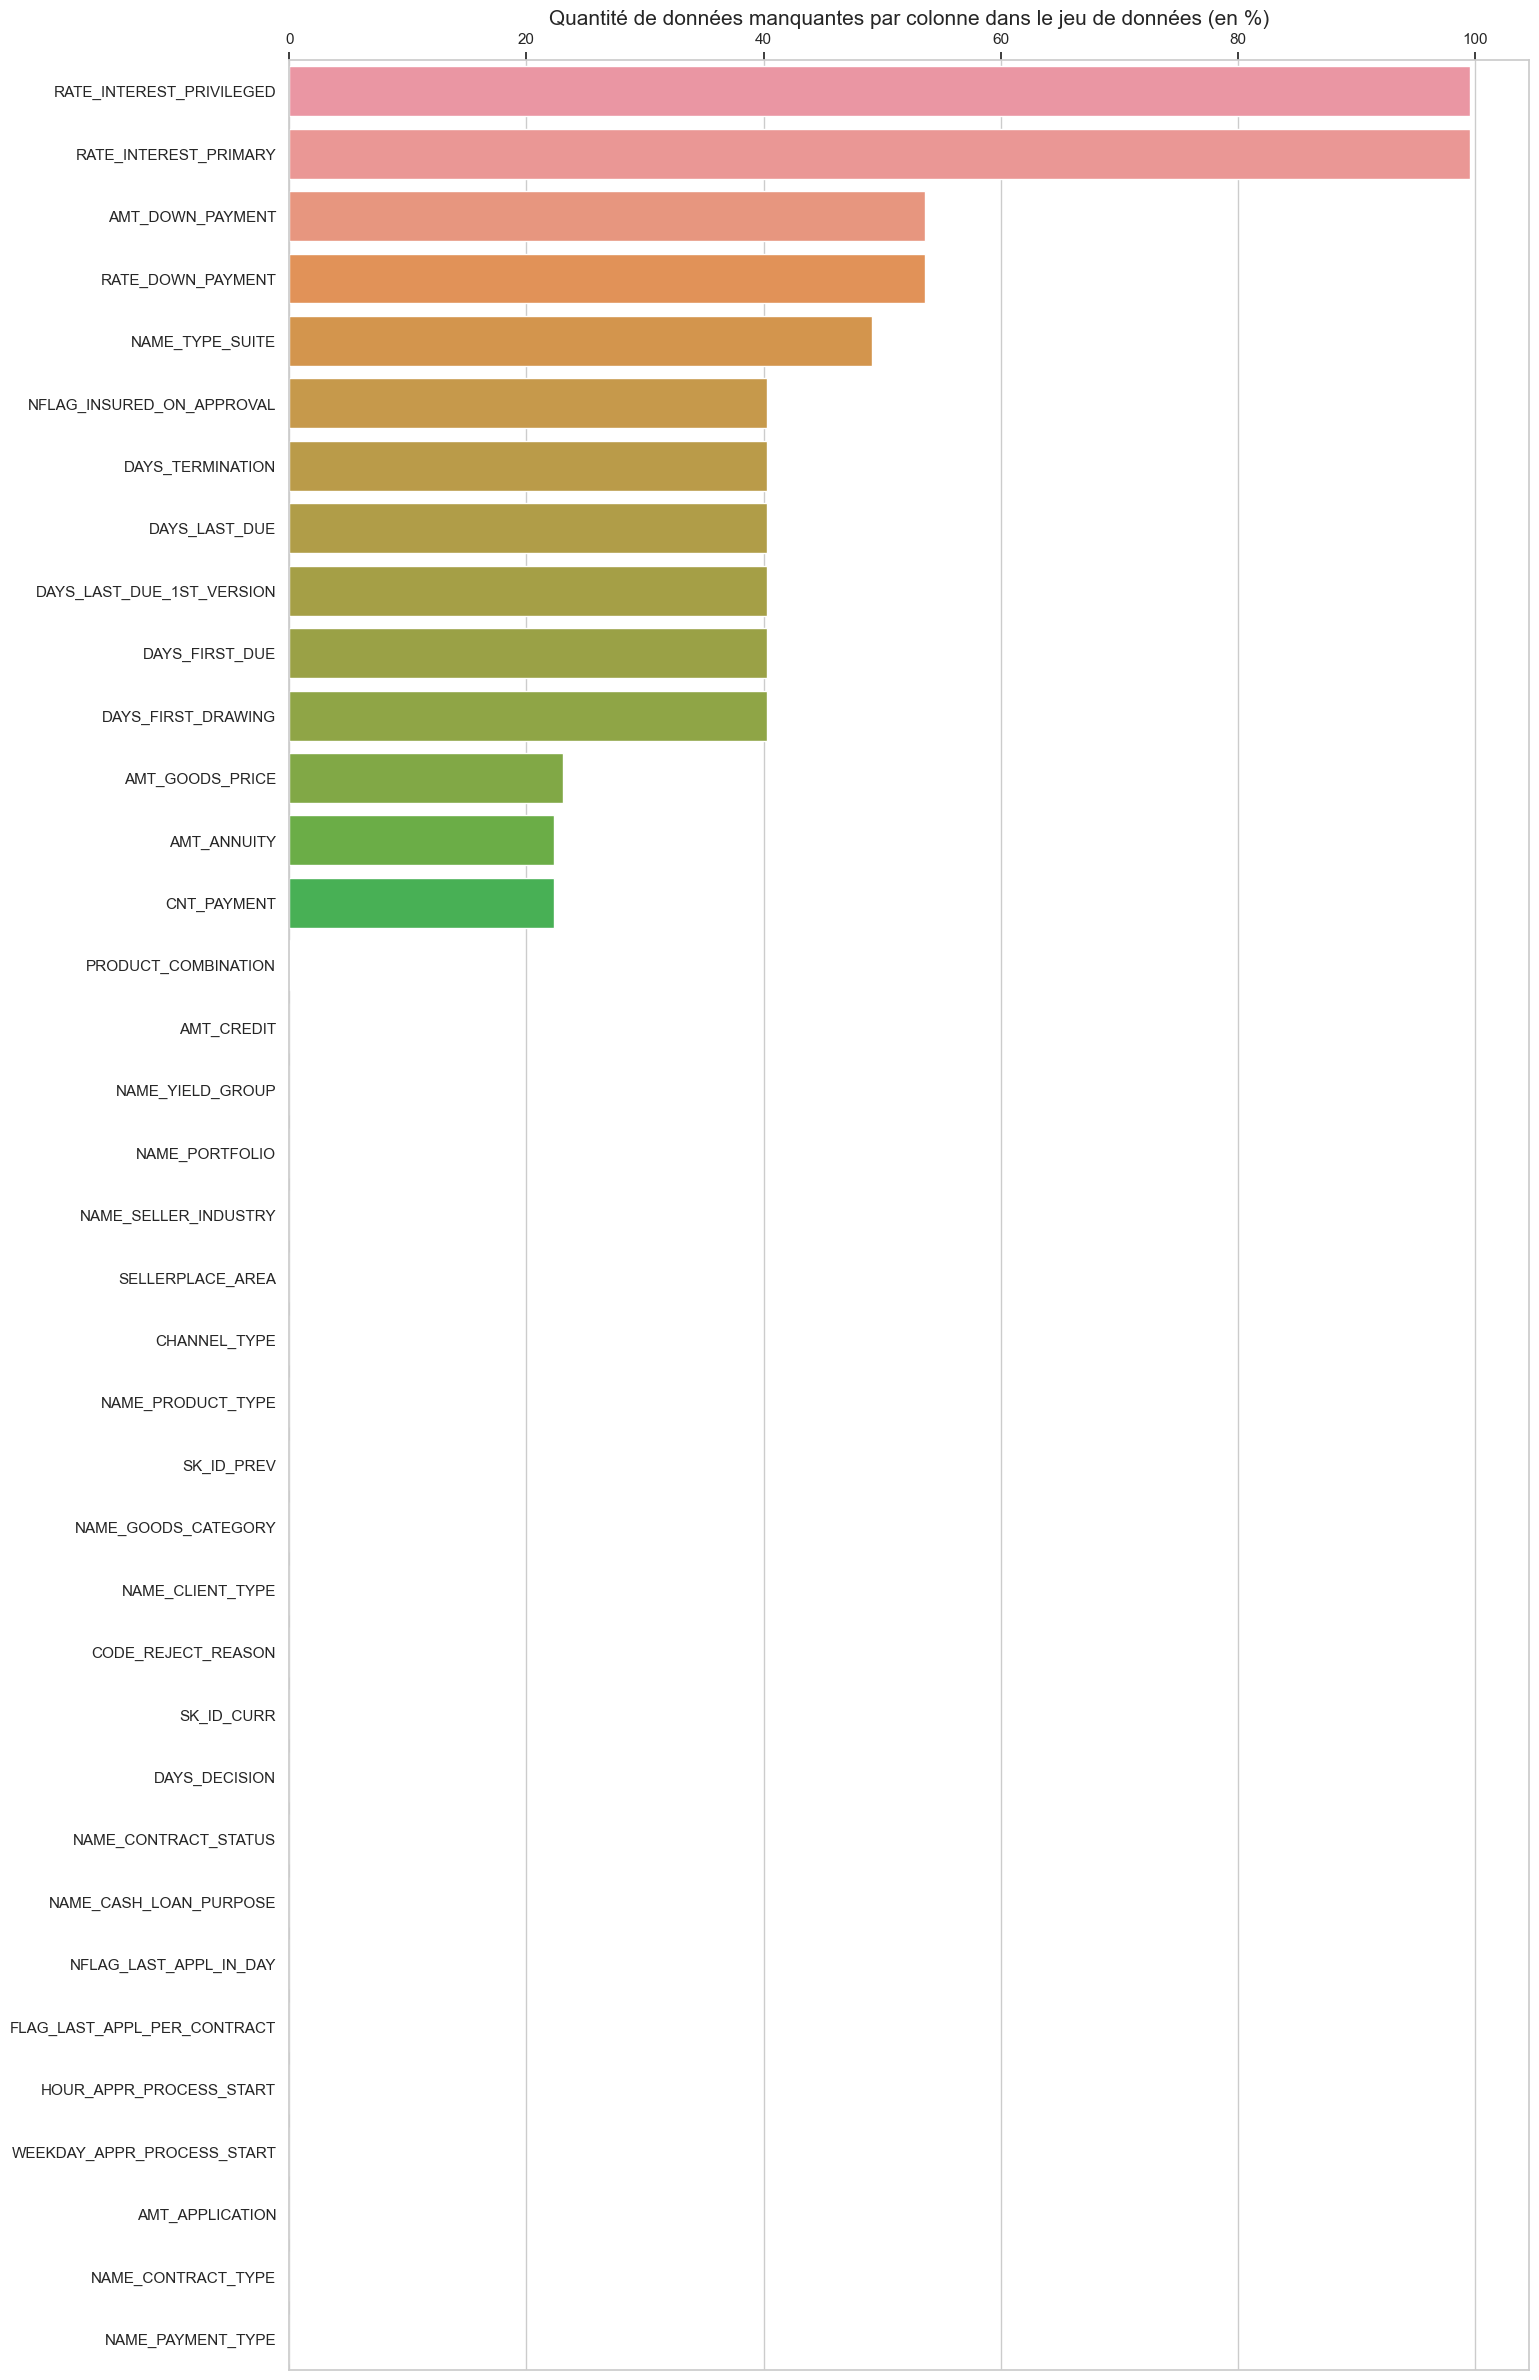

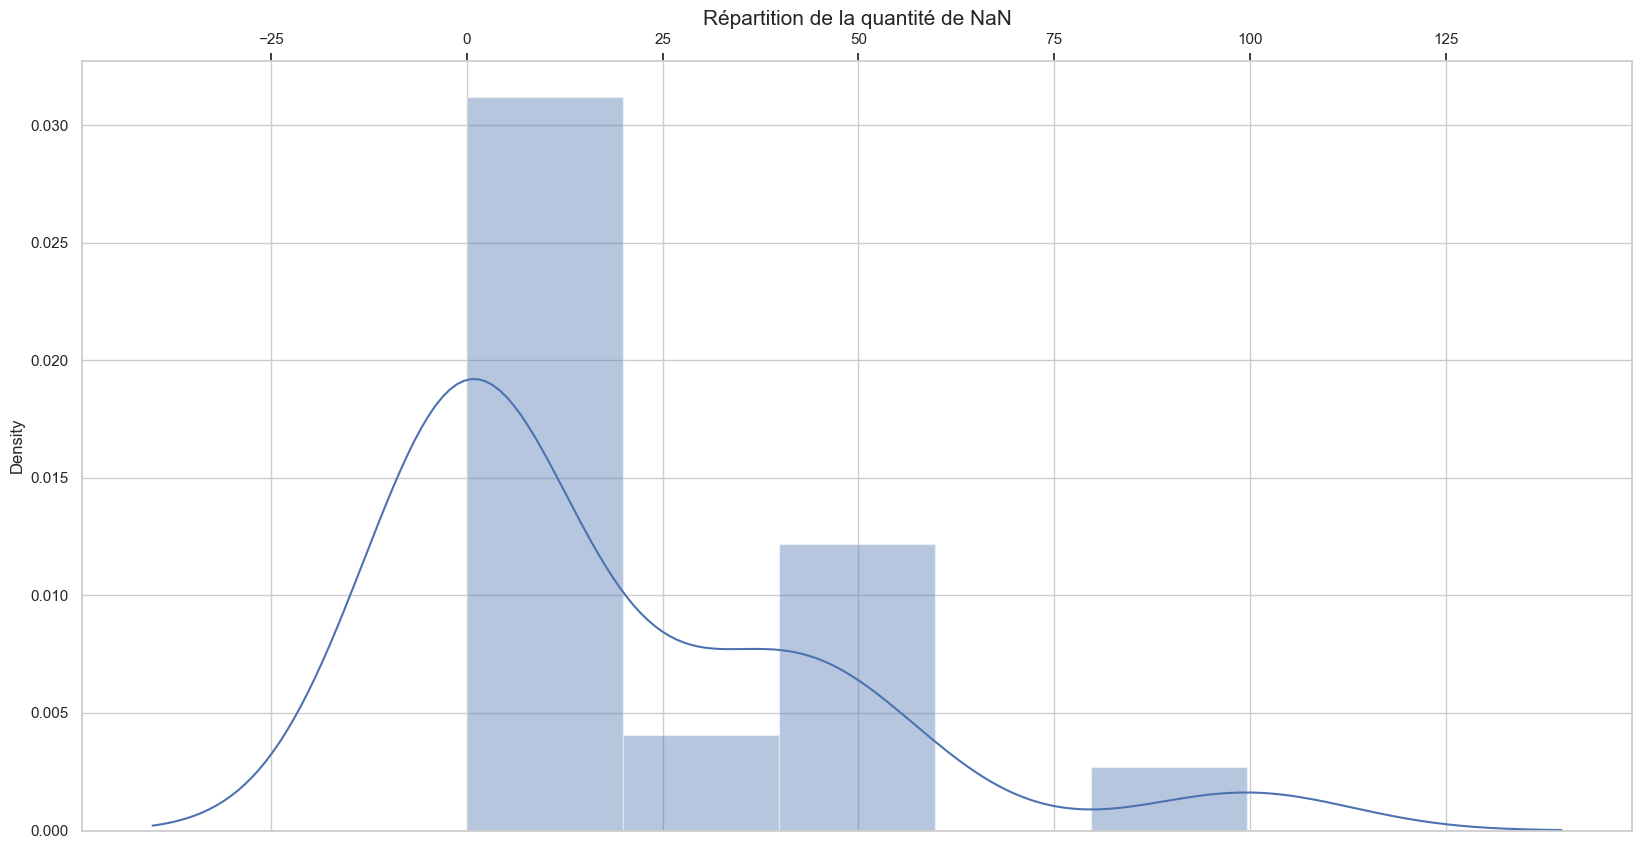

In [75]:
moduleexplo.proportion_nan(prv_app)

In [76]:

pd.set_option('max_colwidth', None)
test=[row for row in hc_desc['Table'] if ('previous_application') in row]
desc_prv_app = hc_desc[hc_desc['Table'].isin(test)][['Row', 'Description']]
desc = desc_prv_app.head(500)
print(tabulate(desc))

---  ---------------------------  -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
173  SK_ID_PREV                   ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit)
174  SK_ID_CURR                   ID of loan in our sample
175  NAME_CONTRACT_TYPE           Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application
176  AMT_ANNUITY                  Annuity of previous application
177  AMT_APPLICATION              For how much credit did client ask on the previous application
178  AMT_CREDIT                   Final credit amount on the previous application. This differs fr

In [77]:
view_prv_app = prv_app.head(20).T
print(tabulate(view_prv_app))

---------------------------  ------------------------  ----------------  -----------------------  -----------------------  -----------------------  -----------------------  -----------------------  -----------------------  -----------------------  -----------------------  -----------------------  -----------------------  -----------------------  ------------------------------  ---------------------------  -----------------------  ---------------------------  ---------------  ---------------------  -----------------
SK_ID_PREV                   2030495                   2802425           2523466                  2819243                  1784265                  1383531                  2315218                  1656711                  2367563                  2579447                  1715995                  2257824                  2330894                  1397919                         2273188                      1232483                  2163253                      1285768         

## sample

In [78]:
info(sample)

SK_ID_CURR  TARGET
0      100001     0.5
1      100005     0.5
2      100013     0.5

Taille :-------------------------------------------------------------- (48744, 2)
----------------------------------------------------------------------------------------------------
Types :int64      1
float64    1
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Types :SK_ID_CURR      int64
TARGET        float64
dtype: object
----------------------------------------------------------------------------------------------------
Valeurs manquantes par colonnes (%): 
SK_ID_CURR    0.0
TARGET        0.0
dtype: float64
----------------------------------------------------------------------------------------------------
Valeurs différentes par variables : 
SK_ID_CURR------------------------------------------------------------ contient 48744 valeurs différentes
TARGET---------------------------------------------------------------- [0.5]
---------------------------------------------------------------------------------

Le nombre de lignes du fichier est de  48744 et de son nombre de colonnes est de 2


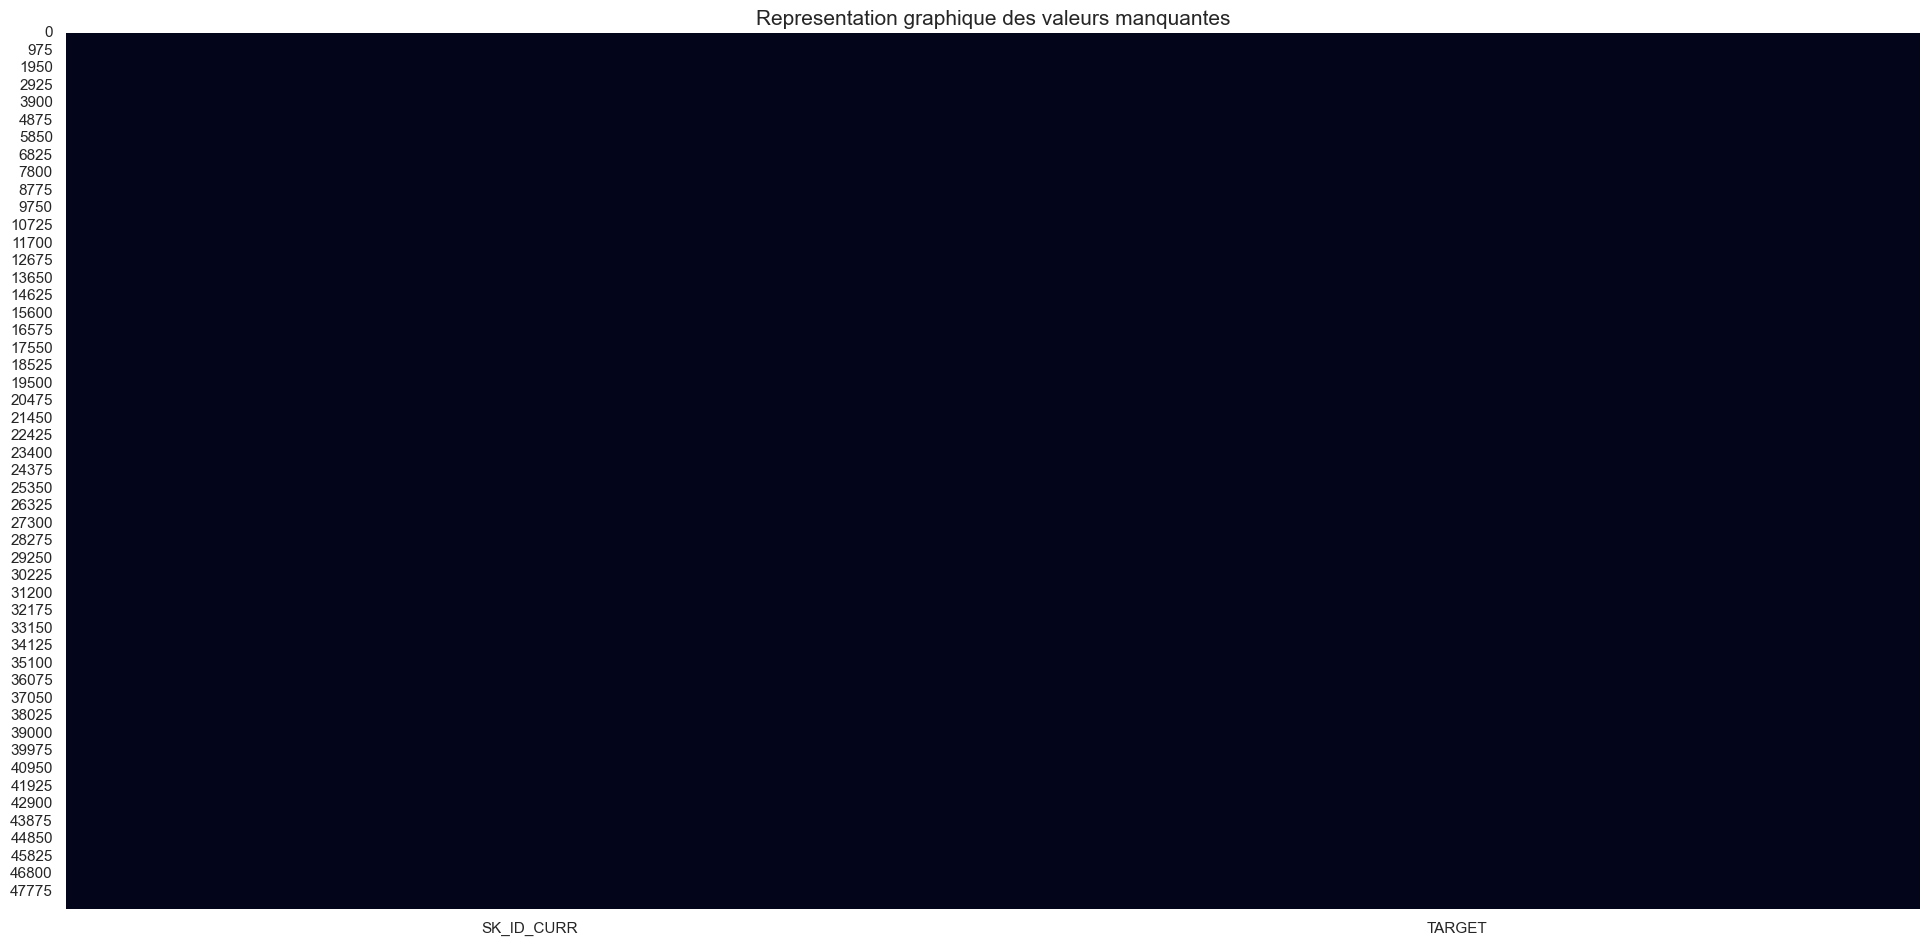

In [79]:
valeurs(sample)

48744 produits
2 variables

Type des variables:
 int64      1
float64    1
Name: count, dtype: int64


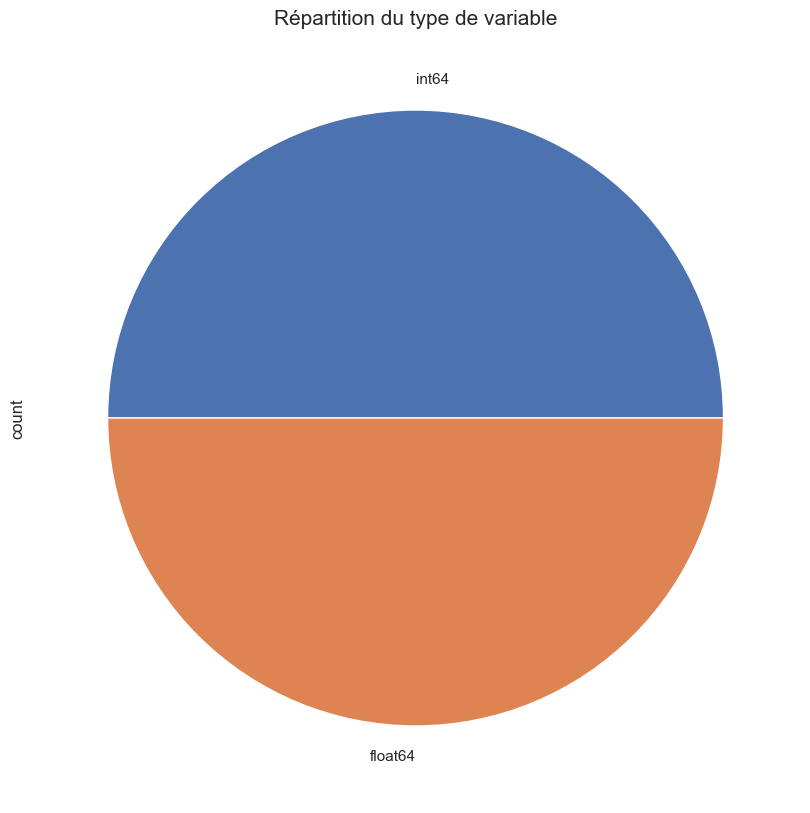

In [80]:
format_data(sample)

In [81]:
pd.set_option('max_colwidth', None)
test=[row for row in hc_desc['Table'] if ('sample') in row]
desc_sample = hc_desc[hc_desc['Table'].isin(test)][['Row', 'Description']]
desc = desc_sample.head(500)
print(tabulate(desc))

In [82]:
view_sample = sample.head(10).T
print(tabulate(view_sample))

----------  --------  --------  --------  --------  --------  --------  --------  --------  --------  --------
SK_ID_CURR  100001    100005    100013    100028    100038    100042    100057    100065    100066    100067
TARGET           0.5       0.5       0.5       0.5       0.5       0.5       0.5       0.5       0.5       0.5
----------  --------  --------  --------  --------  --------  --------  --------  --------  --------  --------


## Controle de l'useage de la mémoire

In [83]:
total_memory = 0

original_memory = app_test.memory_usage().sum()
total_memory += original_memory
print(f'Original Memory Usage app_test: {round(original_memory / 1e9, 2)} gb.')
print()

original_memory = app_train.memory_usage().sum()
total_memory += original_memory
print(f'Original Memory Usage app_train: {round(original_memory / 1e9, 2)} gb.')
print()

original_memory = hc_desc.memory_usage().sum()
total_memory += original_memory
print(f'Original Memory Usage hc_desc: {round(original_memory / 1e9, 2)} gb.')
print()

original_memory = balance.memory_usage().sum()
total_memory += original_memory
print(f'Original Memory Usage balance: {round(original_memory / 1e9, 2)} gb.')
print()

original_memory = bureau.memory_usage().sum()
total_memory += original_memory
print(f'Original Memory Usage bureau: {round(original_memory / 1e9, 2)} gb.')
print()

original_memory = cc_balance.memory_usage().sum()
total_memory += original_memory
print(f'Original Memory Usage cc_balance: {round(original_memory / 1e9, 2)} gb.')
print()

original_memory = installmnt.memory_usage().sum()
total_memory += original_memory
print(f'Original Memory Usage installmnt: {round(original_memory / 1e9, 2)} gb.')
print()

original_memory = POS.memory_usage().sum()
total_memory += original_memory
print(f'Original Memory Usage POS: {round(original_memory / 1e9, 2)} gb.')
print()

original_memory = prv_app.memory_usage().sum()
total_memory += original_memory
print(f'Original Memory Usage prv_app: {round(original_memory / 1e9, 2)} gb.')
print()

original_memory = sample.memory_usage().sum()
total_memory += original_memory
print(f'Original Memory Usage sample: {round(original_memory / 1e9, 2)} gb.')
print()

print(f'Total Memory Usage: {round(total_memory / 1e9, 2)} gb.')


Original Memory Usage app_test: 0.05 gb.

Original Memory Usage app_train: 0.3 gb.

Original Memory Usage hc_desc: 0.0 gb.

Original Memory Usage balance: 0.66 gb.

Original Memory Usage bureau: 0.23 gb.

Original Memory Usage cc_balance: 0.71 gb.

Original Memory Usage installmnt: 0.87 gb.

Original Memory Usage POS: 0.64 gb.

Original Memory Usage prv_app: 0.49 gb.

Original Memory Usage sample: 0.0 gb.

Total Memory Usage: 3.95 gb.


## Changement de format int vers object

In [84]:
# Vérifier la présence de la feature dans chaque DataFrame
required_features = ['SK_ID_PREV', 'SK_ID_CURR']

def convert_float_to_object(df):
    for column in ['SK_ID_PREV', 'SK_ID_CURR']:
        if df[column].dtype == 'float64':
            df[column] = df[column].astype('object')
    return df

for df_name, df in dataframes.items():
    if not all(feature in df.columns for feature in required_features):
        missing_features = [feature for feature in required_features if feature not in df.columns]
        print(f"Les features manquantes dans {df_name} sont : {missing_features}")
    else:
        dataframes[df_name] = convert_float_to_object(df)


Les features manquantes dans app_test sont : ['SK_ID_PREV']
Les features manquantes dans app_train sont : ['SK_ID_PREV']
Les features manquantes dans balance sont : ['SK_ID_PREV', 'SK_ID_CURR']
Les features manquantes dans bureau sont : ['SK_ID_PREV']
Les features manquantes dans hc_desc sont : ['SK_ID_PREV', 'SK_ID_CURR']
Les features manquantes dans sample sont : ['SK_ID_PREV']


1670214 produits
37 variables

Type des variables:
 object     16
float64    15
int64       6
Name: count, dtype: int64


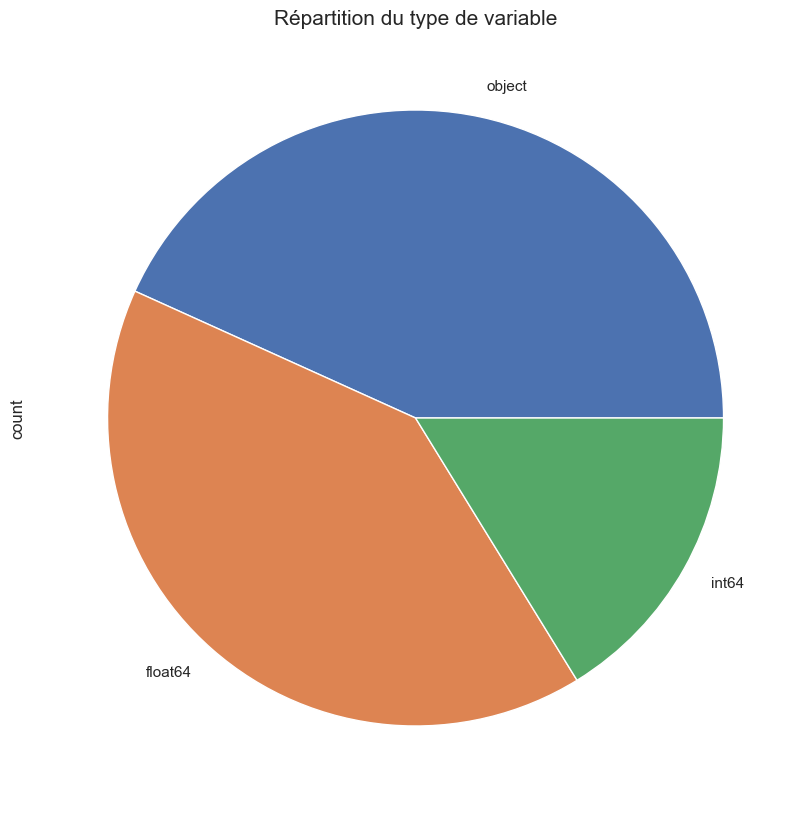

In [85]:
format_data(prv_app)

## Passage des valeurs numériques de int64 à int8

In [86]:
converted_dataframes = convert_int64_to_int8(dataframes)

1670214 produits
37 variables

Type des variables:
 object     16
float64    15
int8        4
int64       2
Name: count, dtype: int64


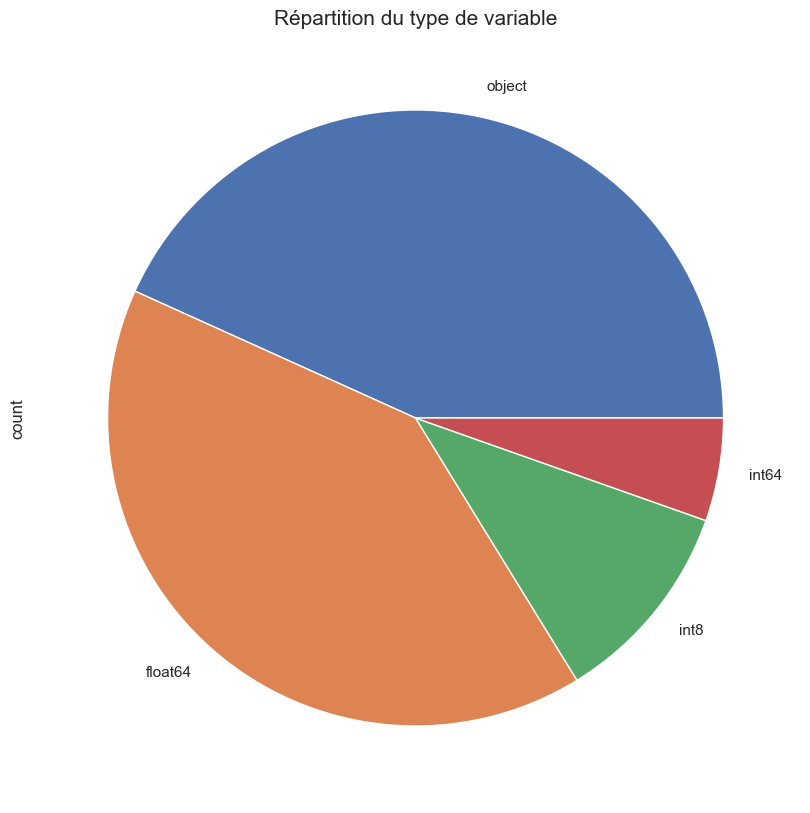

In [87]:
format_data(prv_app)

## Passage des valeurs numériques de float64 à float16

In [88]:
converted_dataframes = convert_float64_to_float16(dataframes)

1670214 produits
37 variables

Type des variables:
 object     16
float16    15
int8        4
int64       2
Name: count, dtype: int64


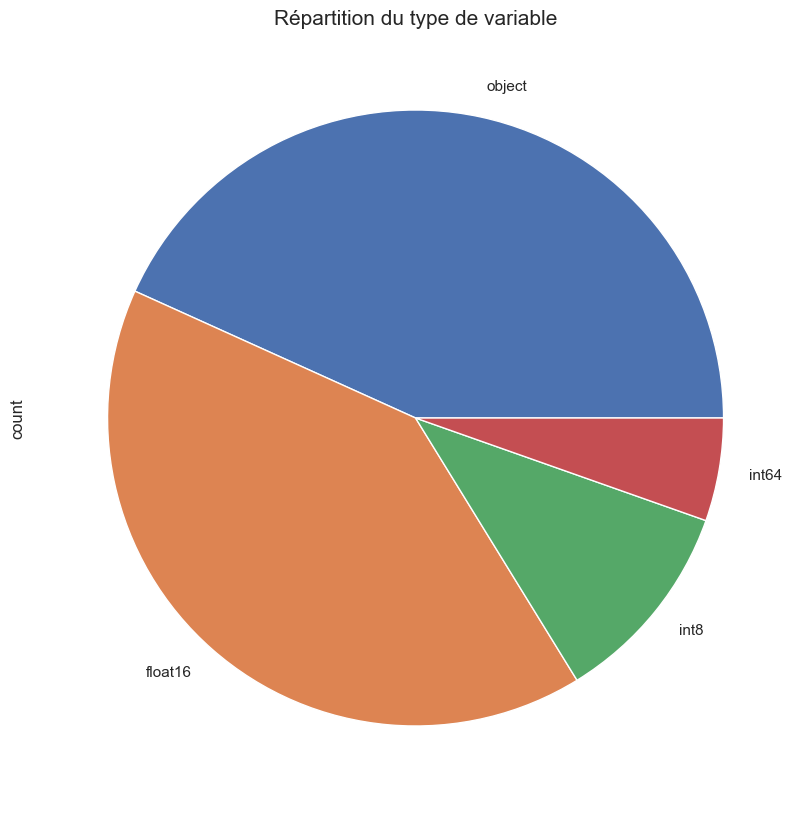

In [89]:
format_data(prv_app)

In [90]:
total_memory = 0

new_memory = app_test.memory_usage().sum()
total_memory += new_memory
print(f'New Memory Usage app_test: {round(new_memory / 1e9, 2)} gb.')
print()

new_memory = app_train.memory_usage().sum()
total_memory += new_memory
print(f'New Memory Usage app_train: {round(new_memory / 1e9, 2)} gb.')
print()

new_memory = hc_desc.memory_usage().sum()
total_memory += new_memory
print(f'New Memory Usage hc_desc: {round(new_memory / 1e9, 2)} gb.')
print()

new_memory = balance.memory_usage().sum()
total_memory += new_memory
print(f'New Memory Usage balance: {round(new_memory / 1e9, 2)} gb.')
print()

new_memory = bureau.memory_usage().sum()
total_memory += new_memory
print(f'New Memory Usage bureau: {round(new_memory / 1e9, 2)} gb.')
print()

new_memory = cc_balance.memory_usage().sum()
total_memory += new_memory
print(f'New Memory Usage cc_balance: {round(new_memory / 1e9, 2)} gb.')
print()

new_memory = installmnt.memory_usage().sum()
total_memory += new_memory
print(f'New Memory Usage installmnt: {round(new_memory / 1e9, 2)} gb.')
print()

new_memory = POS.memory_usage().sum()
total_memory += new_memory
print(f'New Memory Usage POS: {round(new_memory / 1e9, 2)} gb.')
print()

new_memory = prv_app.memory_usage().sum()
total_memory += new_memory
print(f'New Memory Usage prv_app: {round(new_memory / 1e9, 2)} gb.')
print()

new_memory = sample.memory_usage().sum()
total_memory += new_memory
print(f'New Memory Usage sample: {round(new_memory / 1e9, 2)} gb.')
print()

print(f'Total Memory Usage: {round(total_memory / 1e9, 2)} gb.')


New Memory Usage app_test: 0.01 gb.

New Memory Usage app_train: 0.09 gb.

New Memory Usage hc_desc: 0.0 gb.

New Memory Usage balance: 0.46 gb.

New Memory Usage bureau: 0.1 gb.

New Memory Usage cc_balance: 0.23 gb.

New Memory Usage installmnt: 0.37 gb.

New Memory Usage POS: 0.31 gb.

New Memory Usage prv_app: 0.3 gb.

New Memory Usage sample: 0.0 gb.

Total Memory Usage: 1.88 gb.


In [91]:
app_train

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0               inf         inf   
1                    N             0               inf         inf   
2                    Y             0               inf         inf   
3                    Y             0               inf         inf   
4                    Y             0               inf         inf   
...                ...           ...               ...         ...   
307506               N             0               inf         inf   
307507               Y             0               inf         inf   
307508               Y             0               inf         inf   
307509               Y             0               inf         inf   
307510               N             0               inf         inf   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24704.0              inf   Unaccompanied               Working   
1           35712.0              inf          Family         State servant   
2            6752.0              inf   Unaccompanied               Working   
3           29680.0              inf   Unaccompanied               Working   
4           21872.0              inf   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27552.0              inf   Unaccompanied               Working   
307507      12000.0              inf   Unaccompanied             Pensioner   
307508      29984.0              inf   Unaccompanied               Working   
307509      20208.0              inf   Unaccompanied  Commercial associate   
307510      49120.0              inf   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE   AGE  DAYS_EMPLOYED  \
0       House / apartment                     0.01880  26.0           -125   
1       House / apartment                     0.00354  46.0             92   
2       House / apartment                     0.01003  52.0             31   
3       House / apartment                     0.00802  52.0             33   
4       House / apartment                     0.02866  55.0             34   
...                   ...                         ...   ...            ...   
307506       With parents             

## Traitement des Nan

In [92]:
def manquant(data):
    # Calcul du nombre de valeurs manquantes par colonne
    nb_na_sum = data.isnull().sum()
    nb_na_sum_sorted = round(nb_na_sum[nb_na_sum > 0] * 100, 2).sort_values(ascending=False)

    # Affichage des colonnes avec des données manquantes en pourcentage
    nb_na = data.isnull().mean()
    nb_na_sorted = round(nb_na[nb_na > 0] * 100, 2).sort_values(ascending=False)

    # Affichage en 25 lignes à la fois, triées
    num_rows = len(nb_na_sum_sorted)
    num_pages = (num_rows // 25) + (num_rows % 25 > 0)  # Calcul du nombre de pages
    current_page = 1

    while current_page <= num_pages:
        start_index = (current_page - 1) * 25
        end_index = min(start_index + 25, num_rows)

        # Affichage du tableau des colonnes manquantes
        print(f"Page {current_page}/{num_pages}")
        print("Colonnes avec des données manquantes:")
        print(nb_na_sum_sorted.iloc[start_index:end_index])
        print()

        # Affichage du tableau des colonnes manquantes en pourcentage
        print("Pourcentage de données manquantes:")
        print(nb_na_sorted.iloc[start_index:end_index])
        print()

        current_page += 1

def manquant_top(data):
    # Calcul du nombre de valeurs manquantes par colonne
    nb_na_sum = data.isnull().sum()
    nb_na_sum_sorted = nb_na_sum[nb_na_sum > 0].sort_values(ascending=False)

    # Calcul des pourcentages de données manquantes
    nb_na_percent = round((nb_na_sum_sorted / len(data)) * 100, 2)

    # Affichage du top 25 dans un tableau avec les pourcentages
    top_25 = nb_na_sum_sorted.head(25)
    top_25_table = pd.DataFrame({'Colonne': top_25.index, 'Nombre de valeurs manquantes': top_25.values,
                                 'Pourcentage de valeurs manquantes': nb_na_percent.head(25).values})
    print(top_25_table)

    # Affichage du top 25 dans un graphique
    plt.figure(figsize=(10, 6))
    plt.barh(top_25.index, top_25.values)
    plt.xlabel('Nombre de valeurs manquantes')
    plt.ylabel('Colonne')
    plt.title('Top 25 des colonnes avec des données manquantes')
    plt.show()

#Taux de remplissage moyen
def donnees_manquantes(data):
    vnulles = data.isnull().sum().sum()
    nb_donnees_tot = np.product(data.shape)
    pourcentage_valeurs = round(data.isna().sum().sum()/(data.size)*100,2)
    print('Le jeu de données contient', vnulles, 'valeurs manquantes pour ',nb_donnees_tot, 'valeurs, soit', pourcentage_valeurs,'%')

In [93]:
donnees_manquantes(app_train)

Le jeu de données contient 9152465 valeurs manquantes pour  37516342 valeurs, soit 24.4 %


In [94]:
manquant(app_train)

Page 1/3
Colonnes avec des données manquantes:
COMMONAREA_MEDI             21486500
COMMONAREA_AVG              21486500
COMMONAREA_MODE             21486500
NONLIVINGAPARTMENTS_MEDI    21351400
NONLIVINGAPARTMENTS_MODE    21351400
NONLIVINGAPARTMENTS_AVG     21351400
FONDKAPREMONT_MODE          21029500
LIVINGAPARTMENTS_MODE       21019900
LIVINGAPARTMENTS_MEDI       21019900
LIVINGAPARTMENTS_AVG        21019900
FLOORSMIN_MODE              20864200
FLOORSMIN_MEDI              20864200
FLOORSMIN_AVG               20864200
YEARS_BUILD_MODE            20448800
YEARS_BUILD_MEDI            20448800
YEARS_BUILD_AVG             20448800
OWN_CAR_AGE                 20292900
LANDAREA_AVG                18259000
LANDAREA_MEDI               18259000
LANDAREA_MODE               18259000
BASEMENTAREA_MEDI           17994300
BASEMENTAREA_AVG            17994300
BASEMENTAREA_MODE           17994300
EXT_SOURCE_1                17337800
NONLIVINGAREA_MEDI          16968200
dtype: int64

Pourcentage de

                     Colonne  Nombre de valeurs manquantes  \
0            COMMONAREA_MEDI                        214865   
1             COMMONAREA_AVG                        214865   
2            COMMONAREA_MODE                        214865   
3   NONLIVINGAPARTMENTS_MEDI                        213514   
4   NONLIVINGAPARTMENTS_MODE                        213514   
5    NONLIVINGAPARTMENTS_AVG                        213514   
6         FONDKAPREMONT_MODE                        210295   
7      LIVINGAPARTMENTS_MODE                        210199   
8      LIVINGAPARTMENTS_MEDI                        210199   
9       LIVINGAPARTMENTS_AVG                        210199   
10            FLOORSMIN_MODE                        208642   
11            FLOORSMIN_MEDI                        208642   
12             FLOORSMIN_AVG                        208642   
13          YEARS_BUILD_MODE                        204488   
14          YEARS_BUILD_MEDI                        204488   
15      

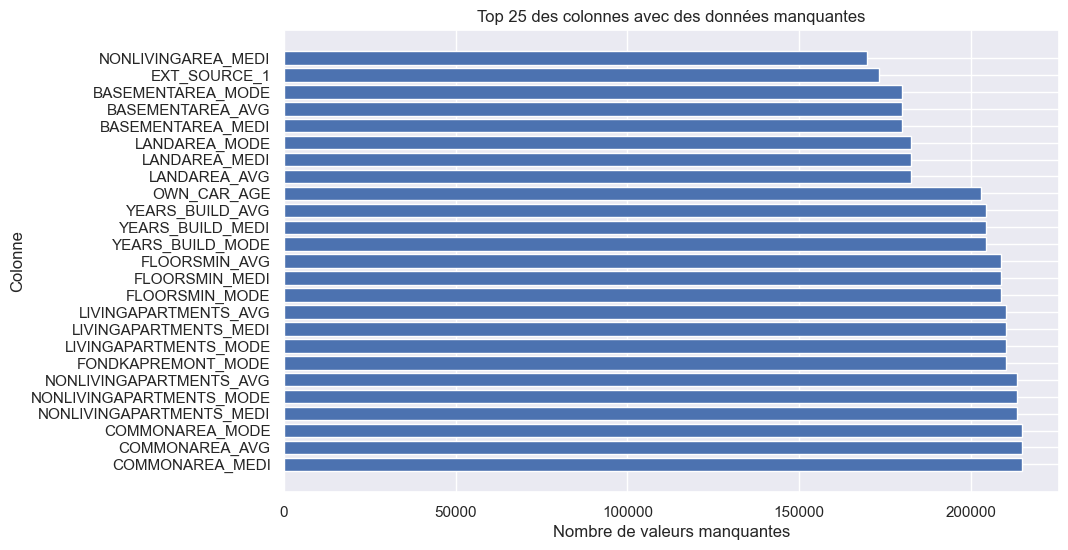

In [95]:
manquant_top(app_train)

### Traitement des Nan des features numériques 

# Analyse univariée du df app_train

Afin de realiser notre analyse exploratoire, nous travaillerons sur le dataframe app_train. En effet les données du dataframe df sont encodées et préparées pour la modelisation, nos n'aurons donc pas accès à toutes les informations tel que nous le souhaitons.

##  Analyse exploratoire univariée

In [96]:
import plotly.graph_objects as go

target_distribution = app_train.TARGET.value_counts()
labels = ['Non-Defaulter', 'Defaulter']
colors = ["#82E0AA", "#EC7063"]

fig = go.Figure(data=[go.Pie(values=target_distribution, labels=labels,
                             textinfo='percent', pull=[0, 0.04],
                             marker=dict(colors=colors))],
                layout=go.Layout(title='Distribution de la TARGET'))

fig.show()

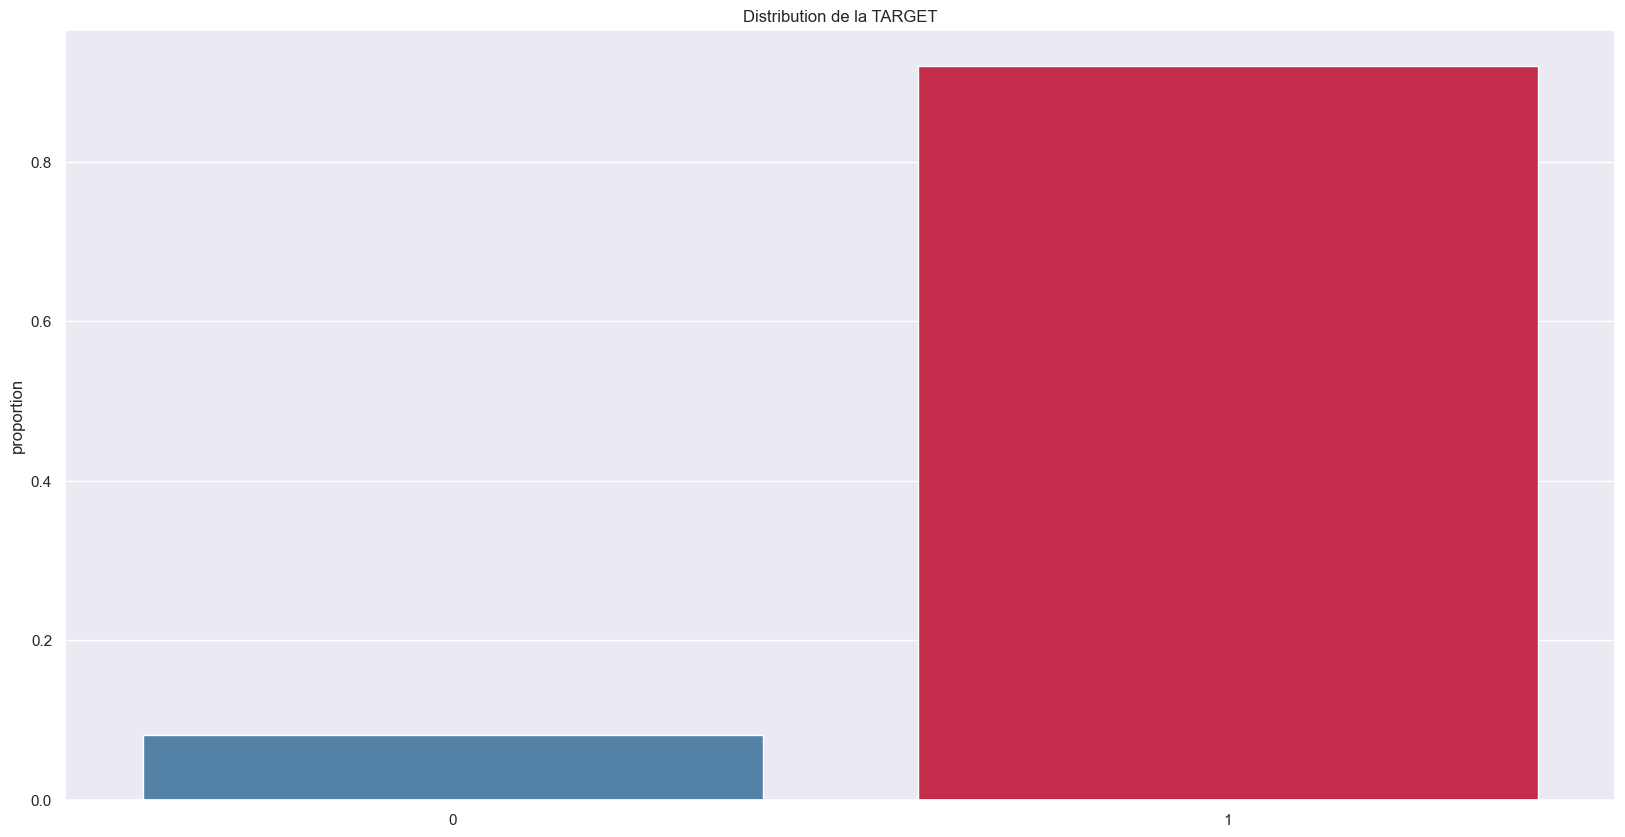

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul du pourcentage de chaque classe
target_counts = app_train['TARGET'].value_counts(normalize=True)
percentages = target_counts * 100

# Création du graphique à barres
sns.barplot(x=[1, 0], y=target_counts, palette=['SteelBlue', 'crimson'])

plt.title('Distribution de la TARGET')
plt.show()


## Distribution des variables catégorielles

In [98]:
# Liste des variables catégorielles
cols_cat = \
    app_train.select_dtypes(exclude=[np.number]).columns.to_list()
cols_cat

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [99]:
def plot_stats(feature, label_rotation=False, horizontal_layout=True):
    fig, axes = plt.subplots(3, 1 if horizontal_layout else 3, figsize=(18, 12) if horizontal_layout else (12, 18))
    axes = axes.flatten()

    temp = app_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index, 'Nombre de contrats': temp.values})

    cat_perc_1 = app_train.groupby(feature)['TARGET'].mean().reset_index().sort_values(by='TARGET', ascending=False)
    cat_perc_0 = app_train[app_train['TARGET'] == 0].groupby(feature)['TARGET'].count().reset_index()
    cat_perc_0.rename(columns={'TARGET': 'Nombre de contrats'}, inplace=True)

    sns.set_color_codes("pastel")
    sns.barplot(x=feature, y="Nombre de contrats", data=df1, ax=axes[0])
    sns.barplot(x=feature, y='TARGET', order=cat_perc_1[feature], data=cat_perc_1, ax=axes[1])
    sns.barplot(x=feature, y='Nombre de contrats', order=cat_perc_0[feature], data=cat_perc_0, ax=axes[2])

    for ax in axes:
        if label_rotation:
            ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        ax.tick_params(axis='both', which='major', labelsize=10)
        total_samples = len(app_train)
        for p in ax.patches:
            height = p.get_height()
            if ax == axes[0]:
                percentage = height / total_samples * 100
            else:
                category = p.get_x() + p.get_width() / 2
                if ax == axes[1]:
                    category_percentage = cat_perc_1.loc[cat_perc_1[feature] == category, 'TARGET'].values
                else:
                    category_percentage = cat_perc_0.loc[cat_perc_0[feature] == category, 'Nombre de contrats'].values
                if len(category_percentage) > 0:
                    percentage = category_percentage[0]
                else:
                    percentage = 0
            ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='bottom', fontsize=8)

    axes[0].set_ylabel('Nombre de contrats', fontsize=10)
    axes[1].set_ylabel('Target à 1 [%]', fontsize=10)
    axes[2].set_ylabel('Target à 0 ', fontsize=10)

    if horizontal_layout:
        plt.tight_layout()

    plt.show()


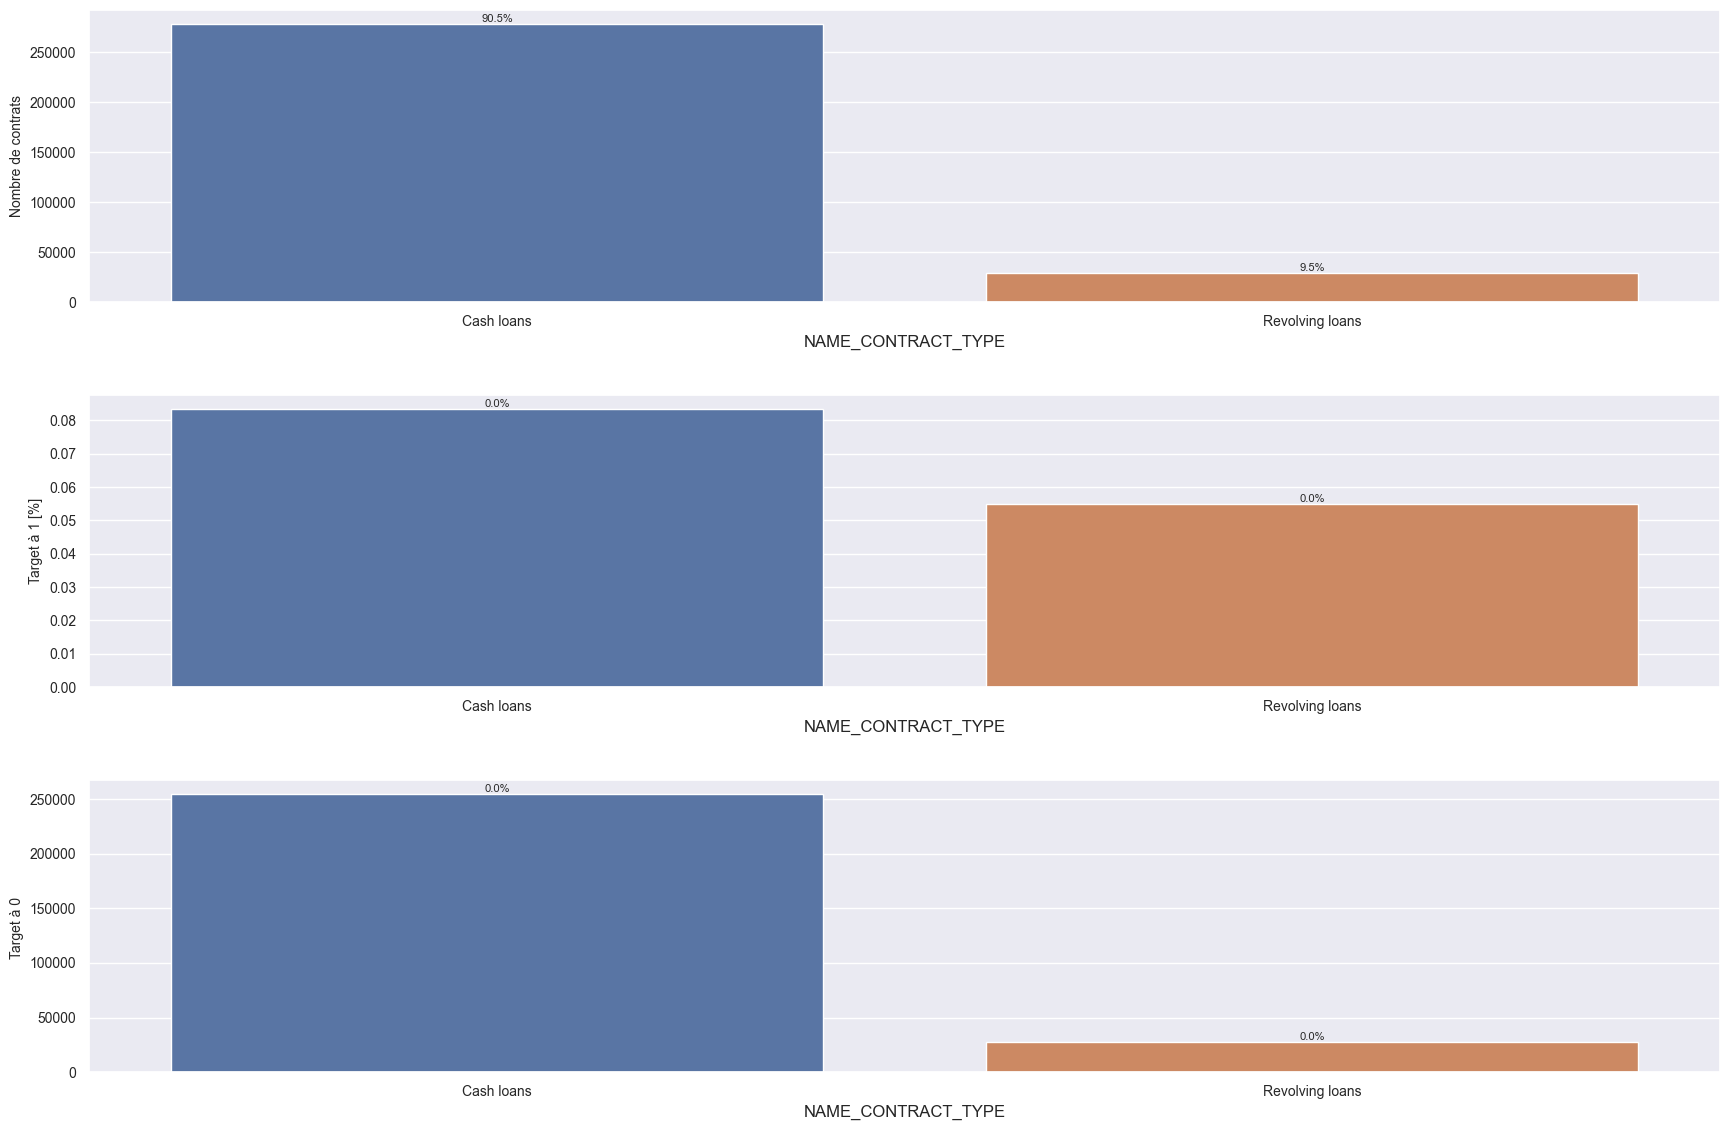

In [100]:
plot_stats('NAME_CONTRACT_TYPE')

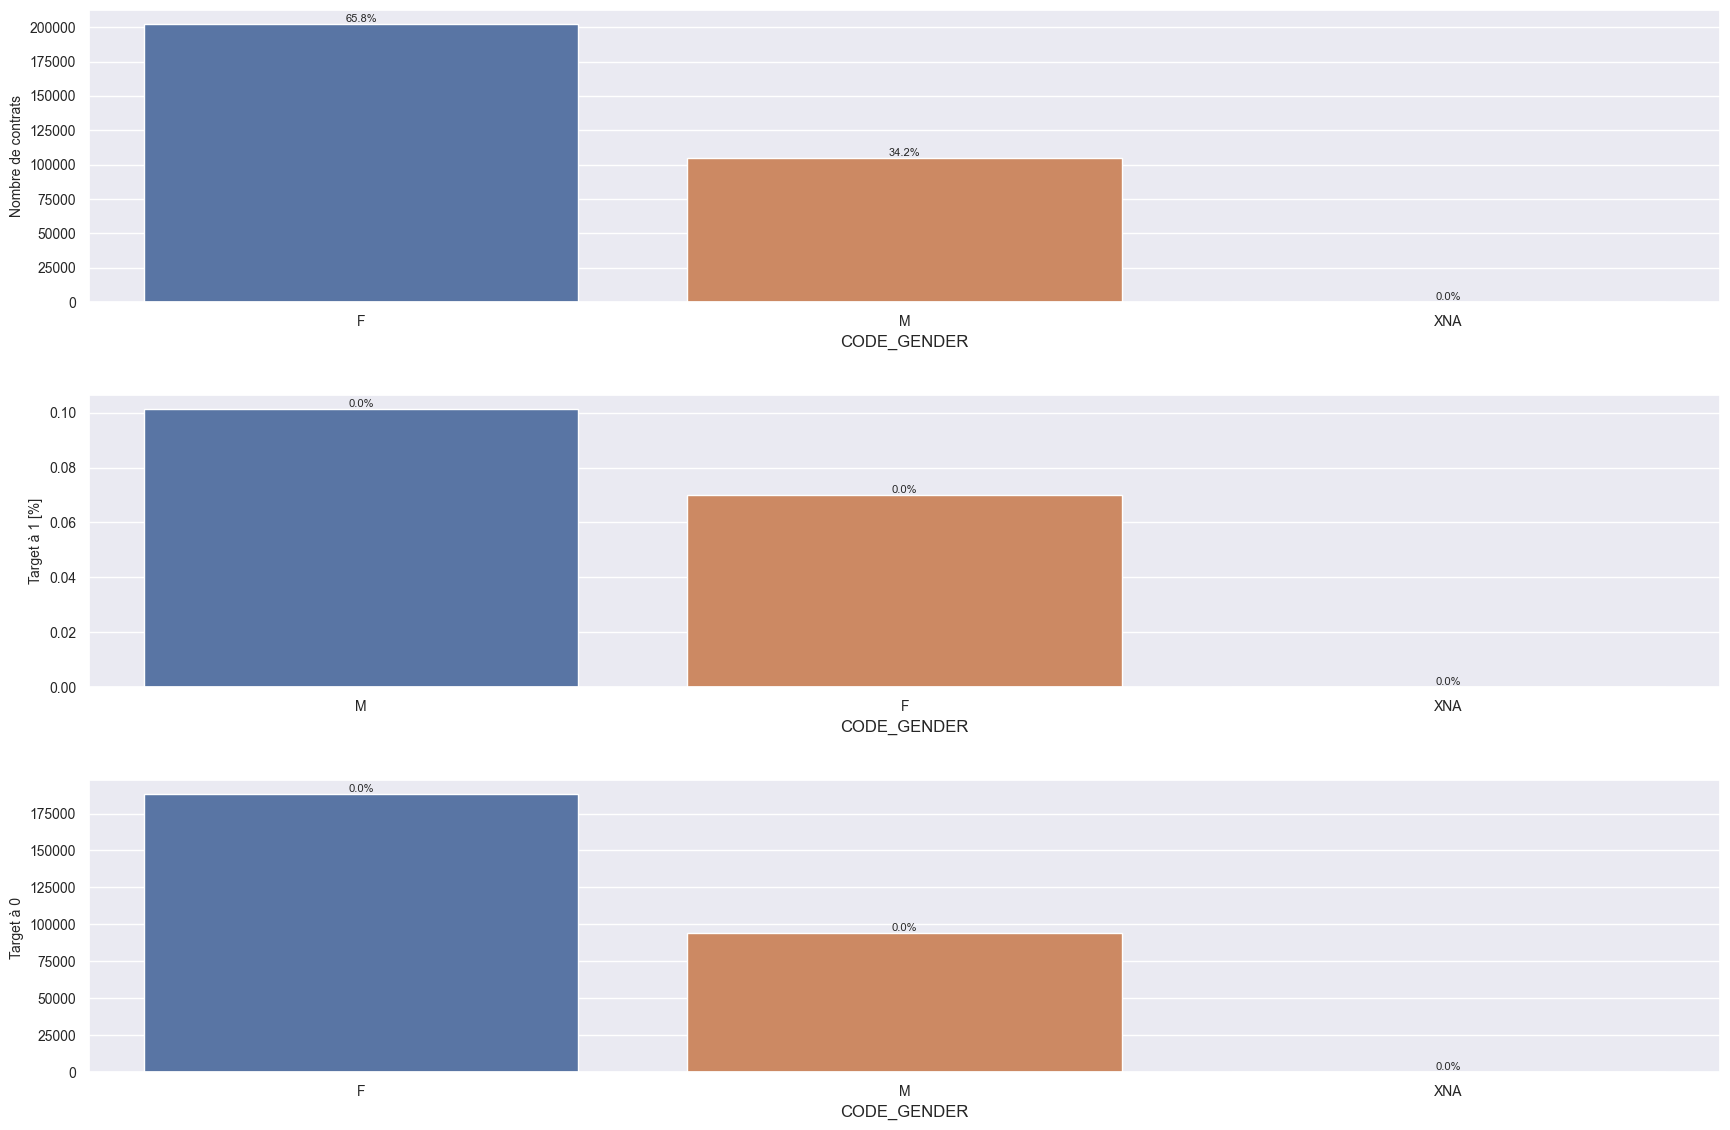

In [101]:
plot_stats('CODE_GENDER')

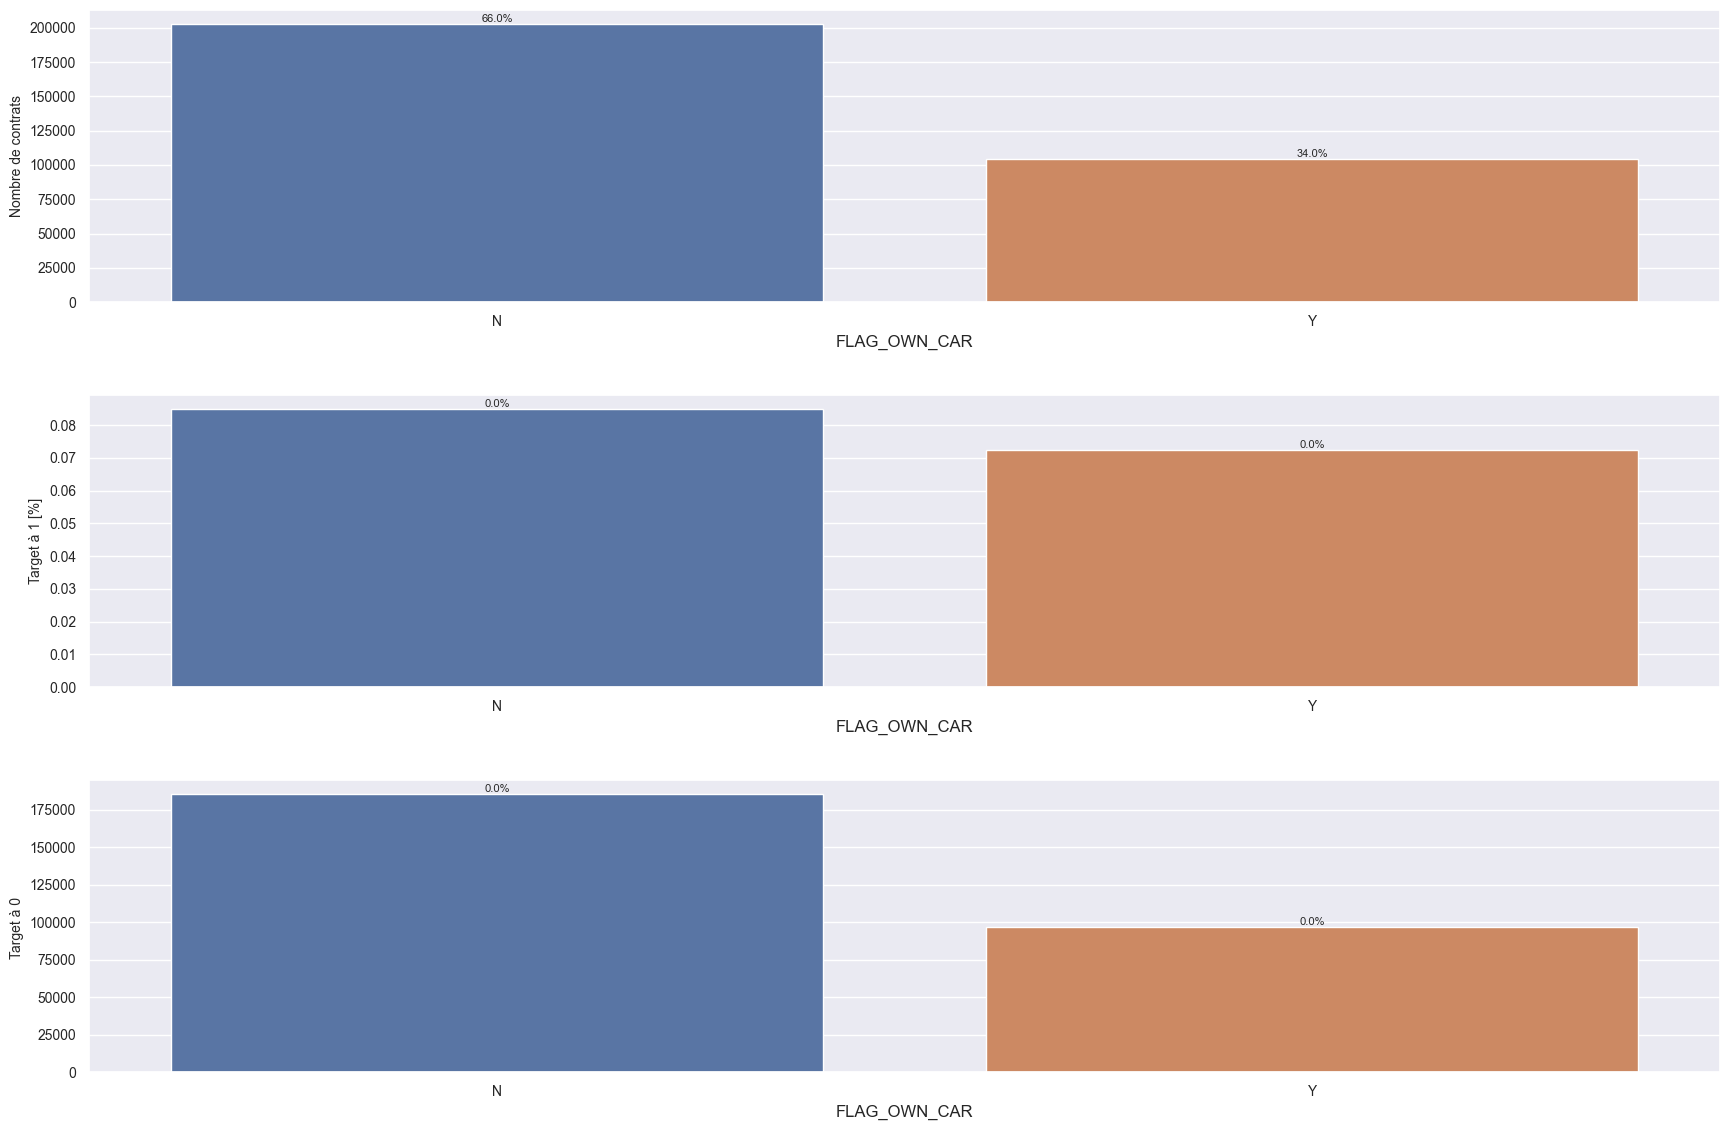

In [102]:
plot_stats('FLAG_OWN_CAR')

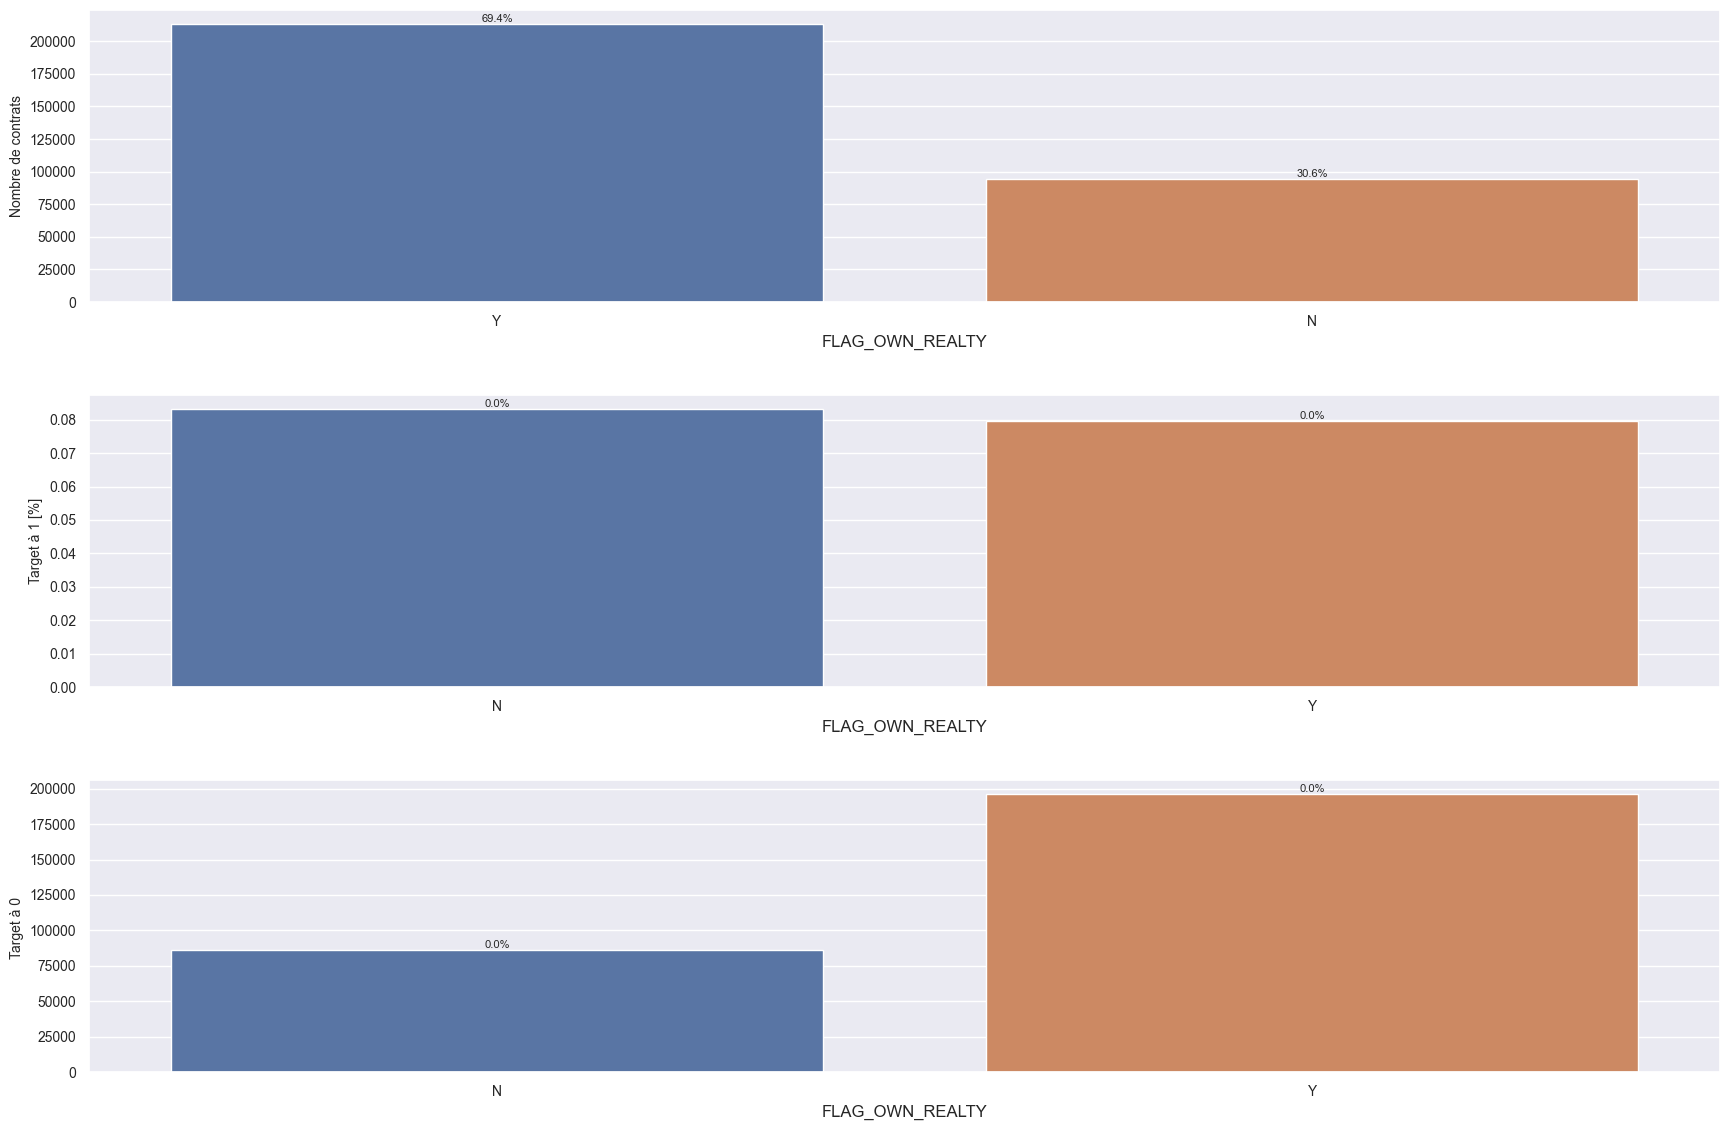

In [103]:
plot_stats('FLAG_OWN_REALTY')

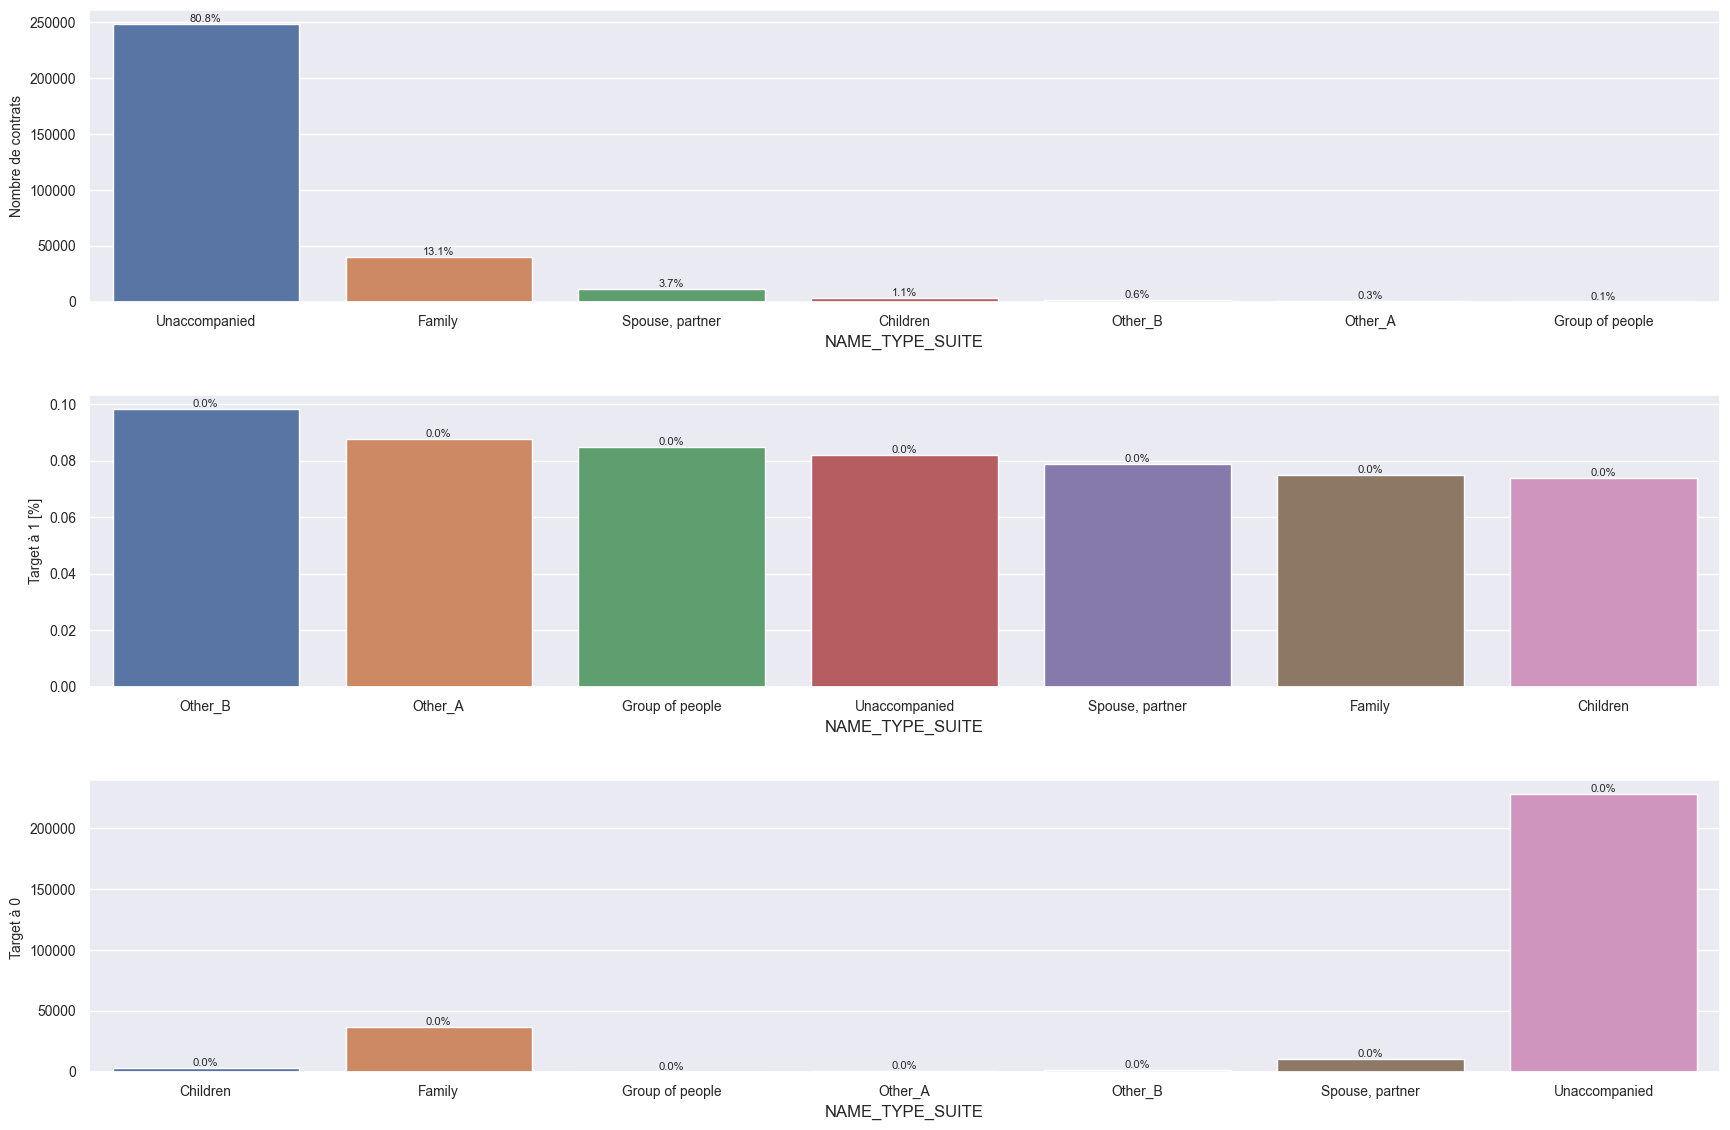

In [104]:
plot_stats('NAME_TYPE_SUITE')

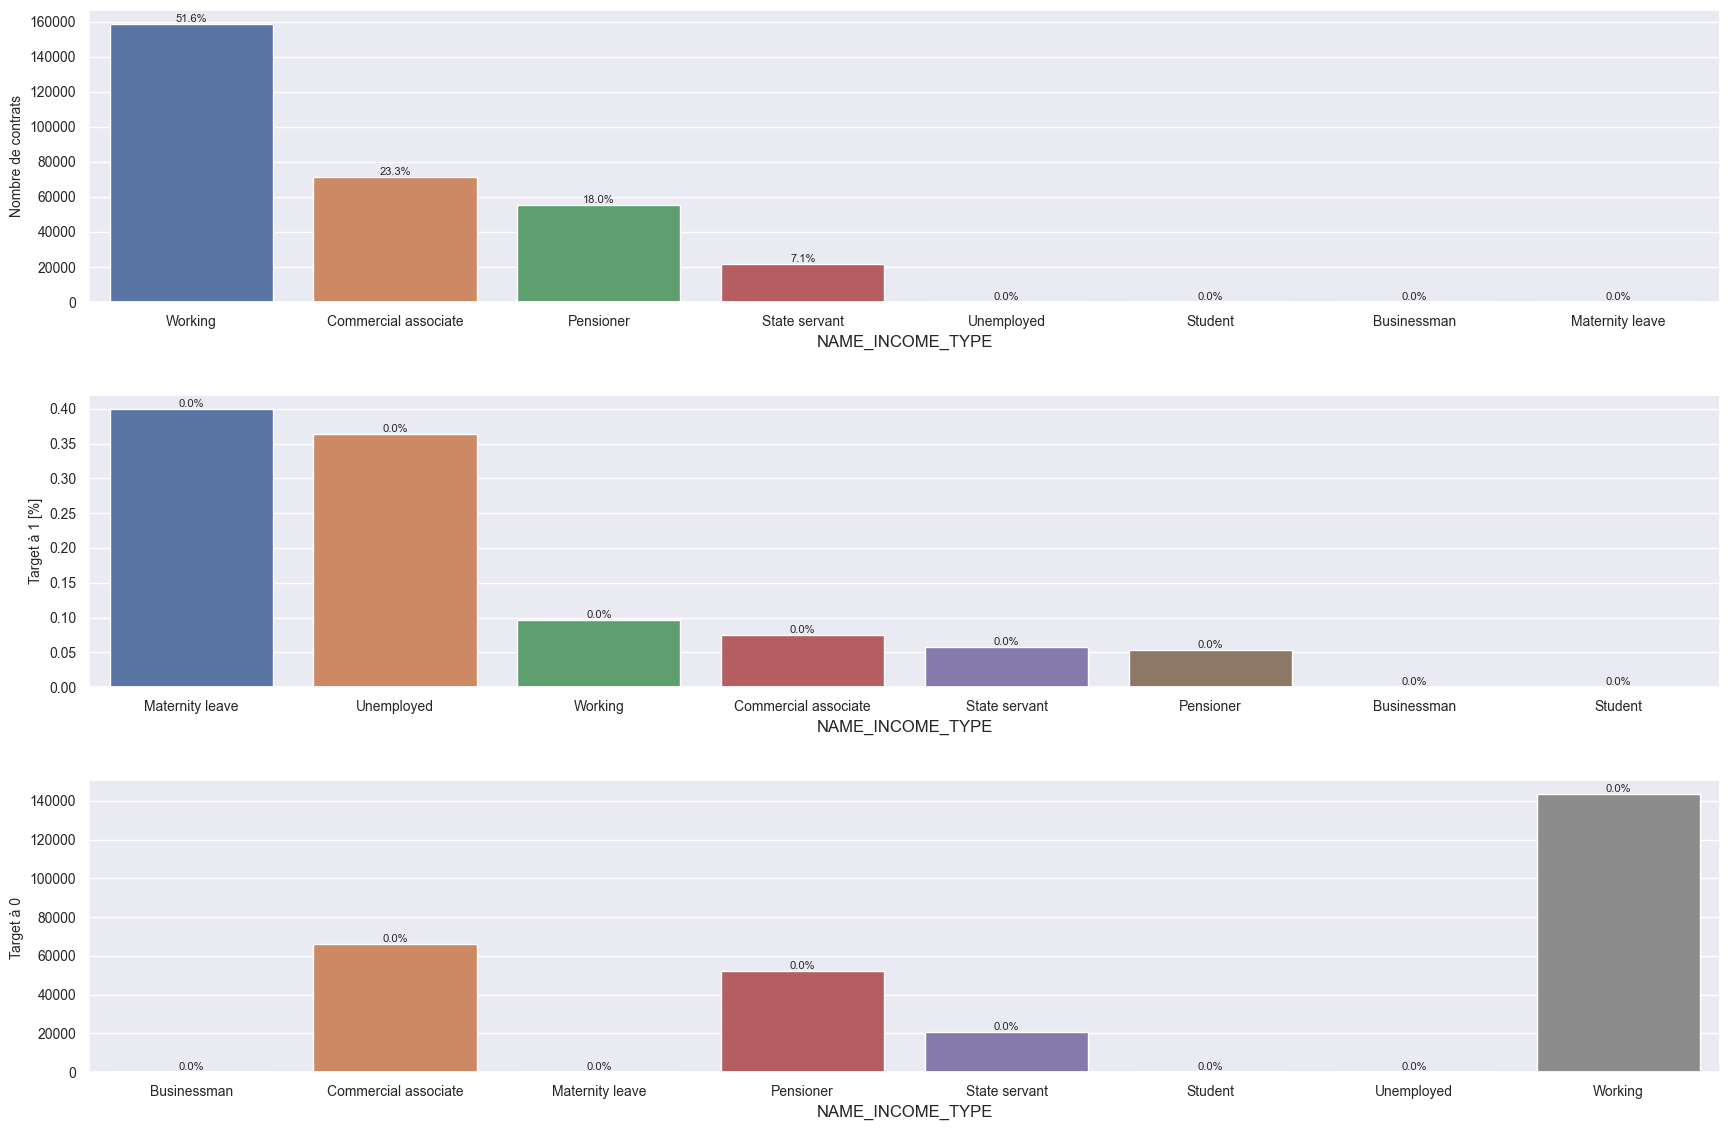

In [105]:
plot_stats('NAME_INCOME_TYPE')

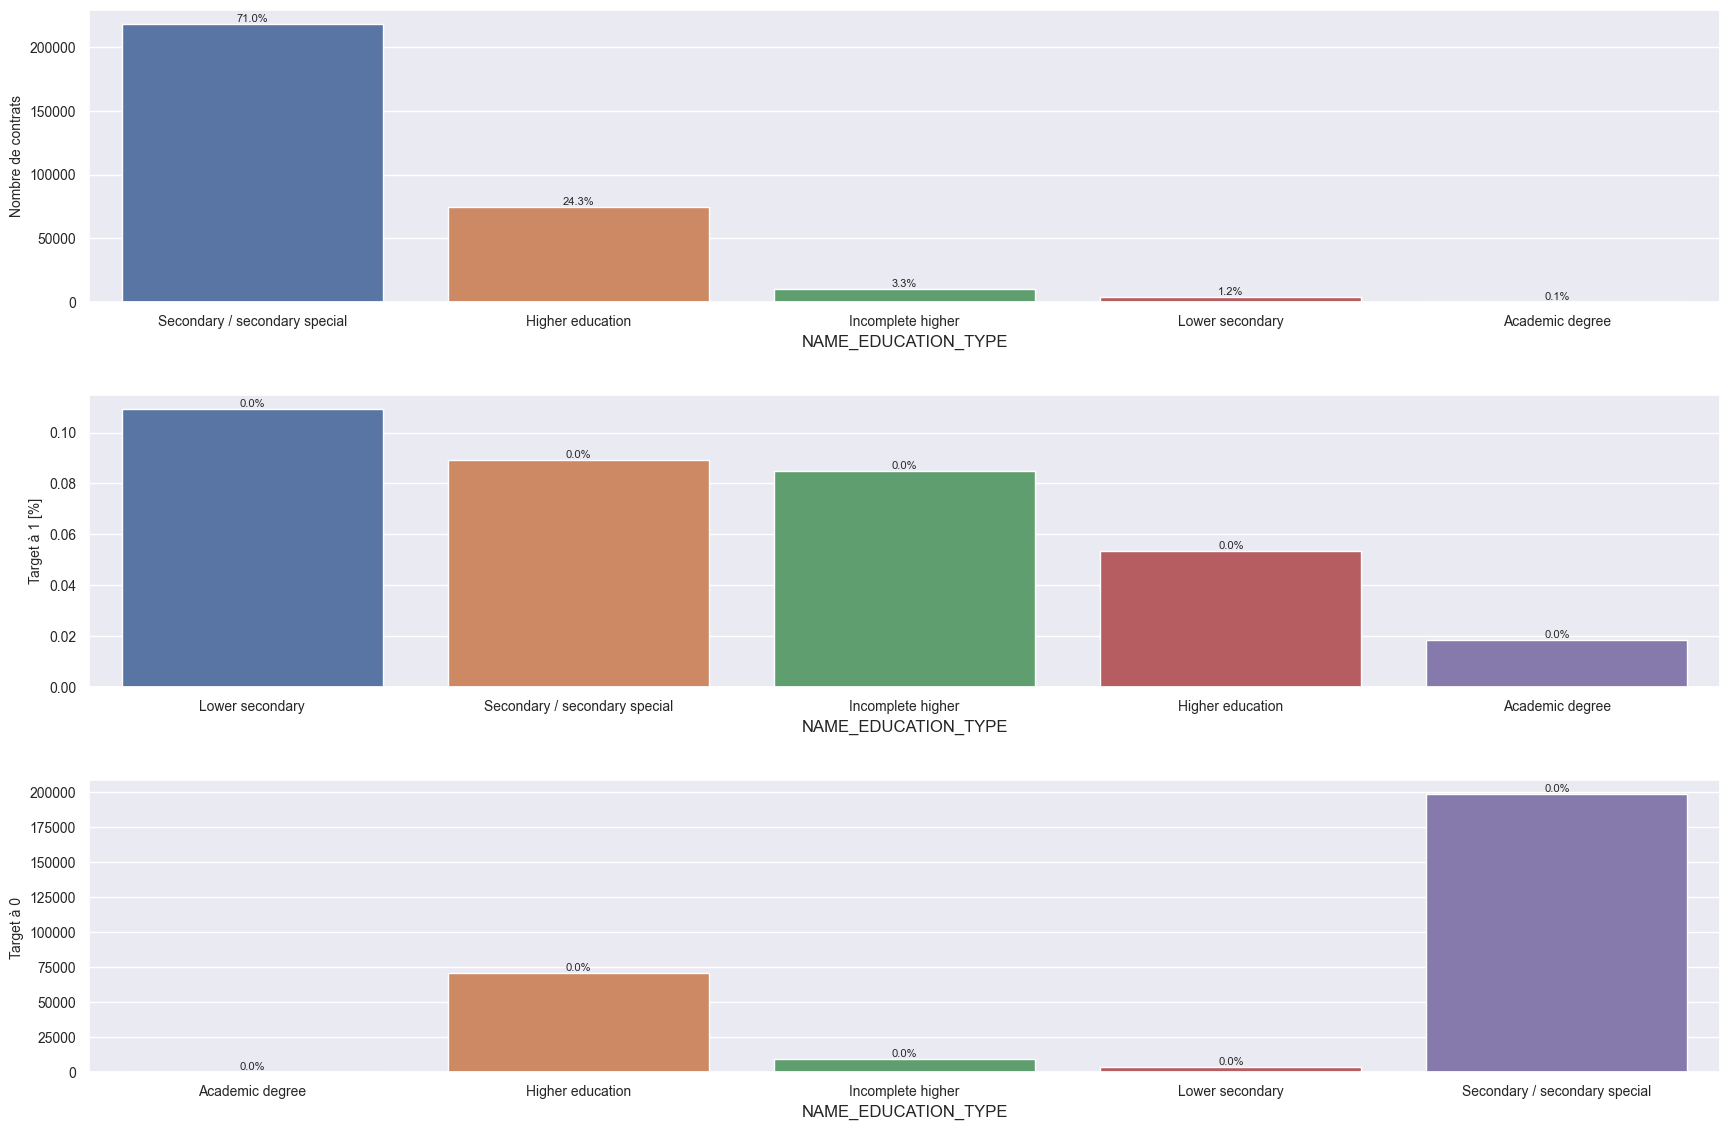

In [106]:
plot_stats('NAME_EDUCATION_TYPE')

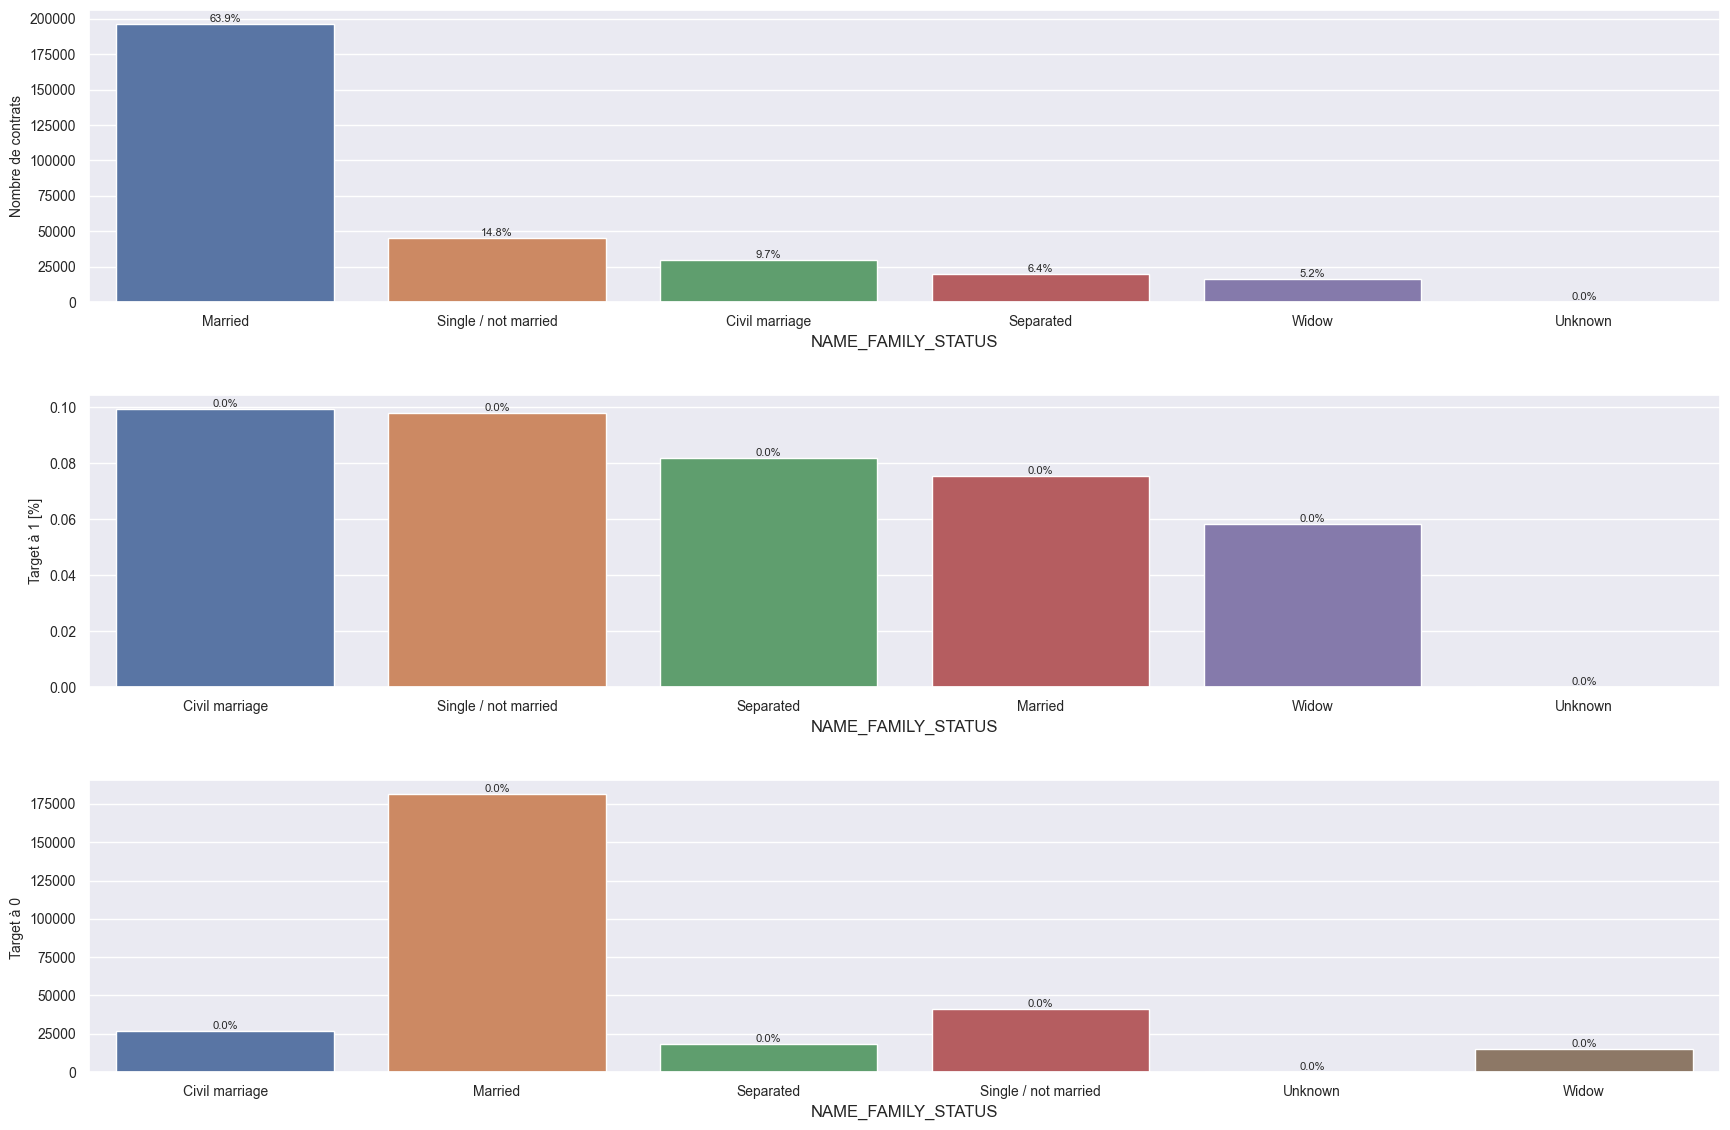

In [107]:
plot_stats('NAME_FAMILY_STATUS')

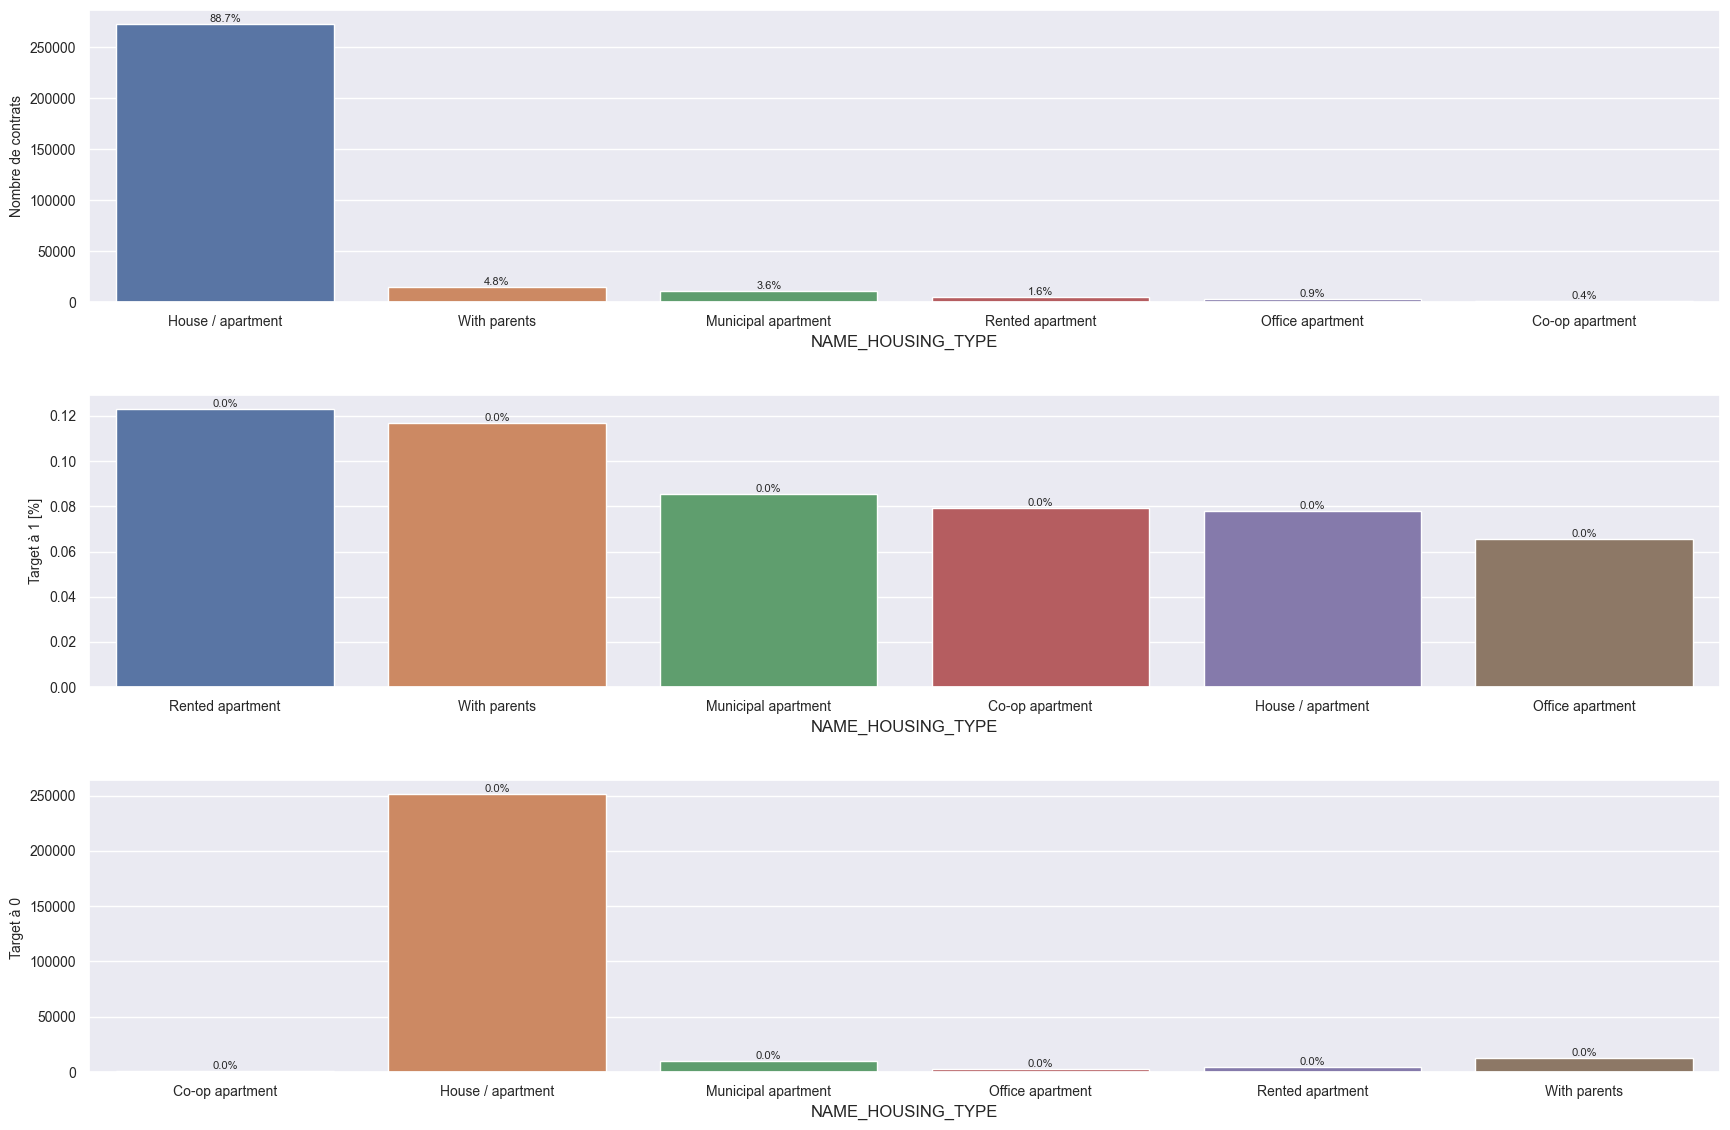

In [108]:
plot_stats('NAME_HOUSING_TYPE')

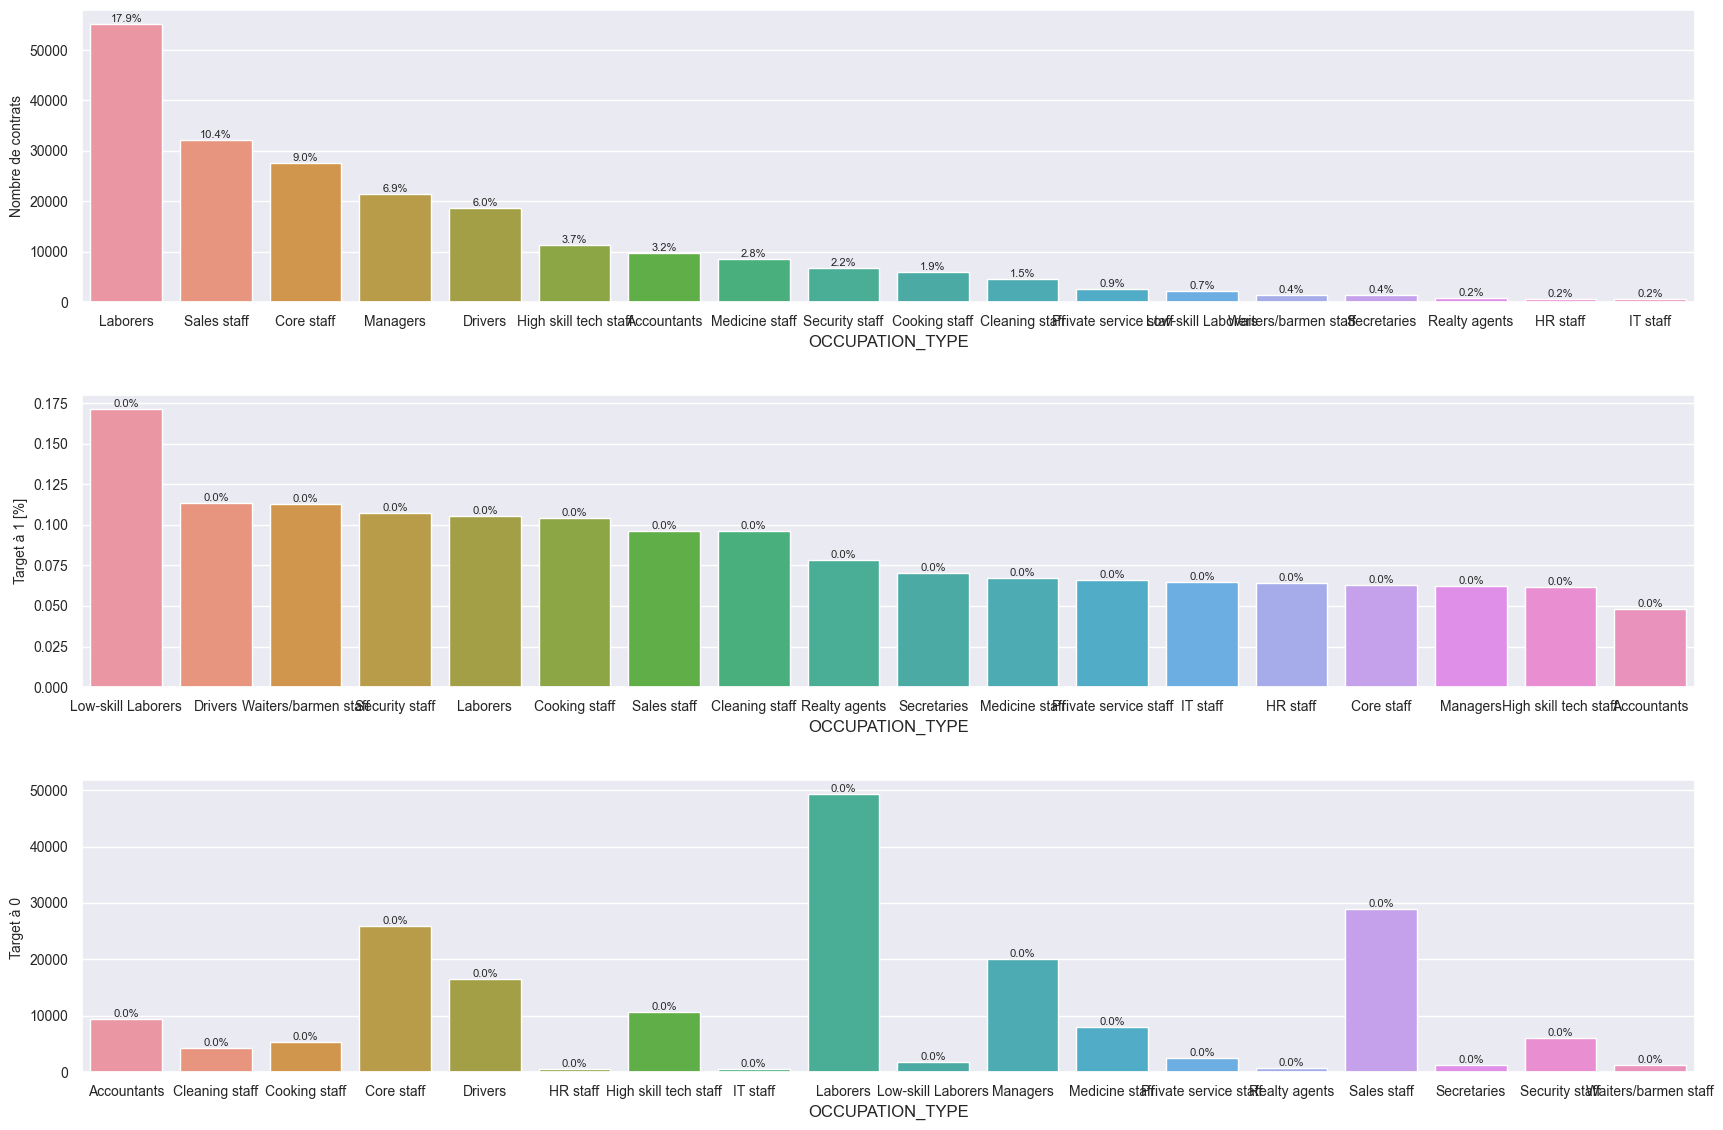

In [109]:
plot_stats('OCCUPATION_TYPE')

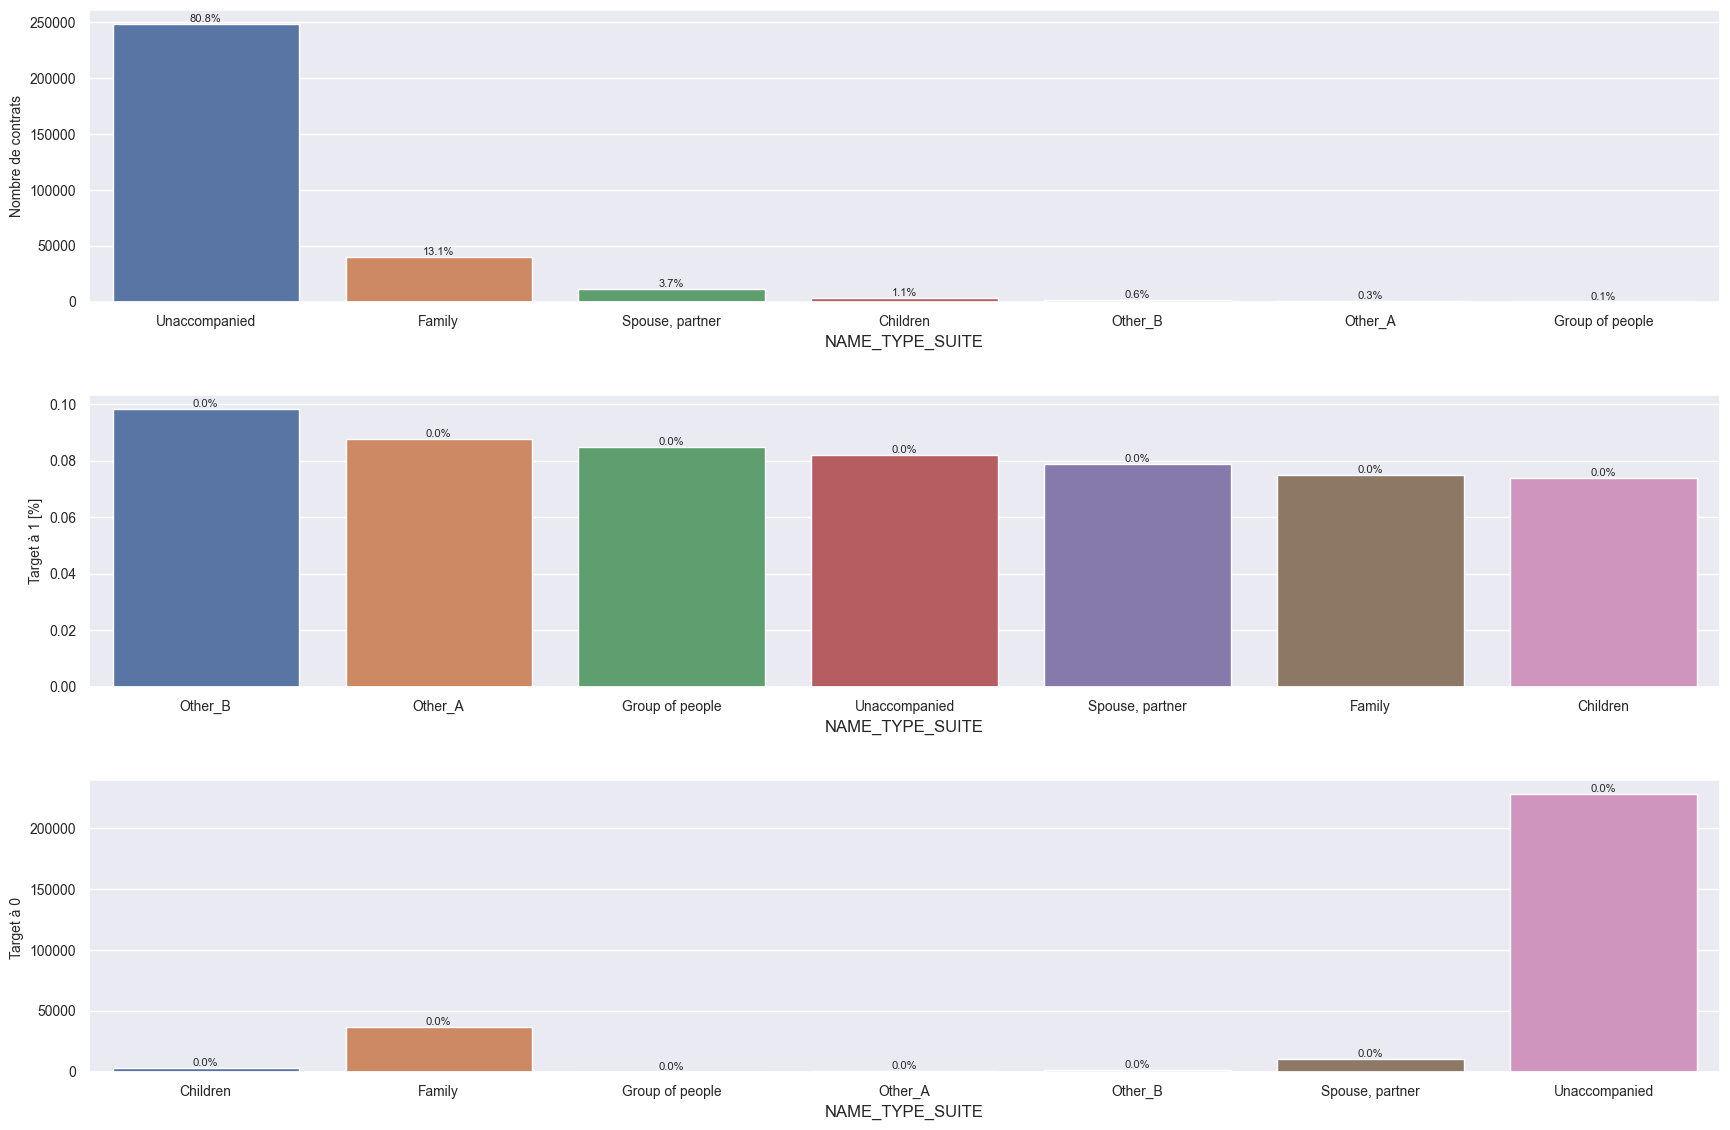

In [110]:
plot_stats('NAME_TYPE_SUITE')

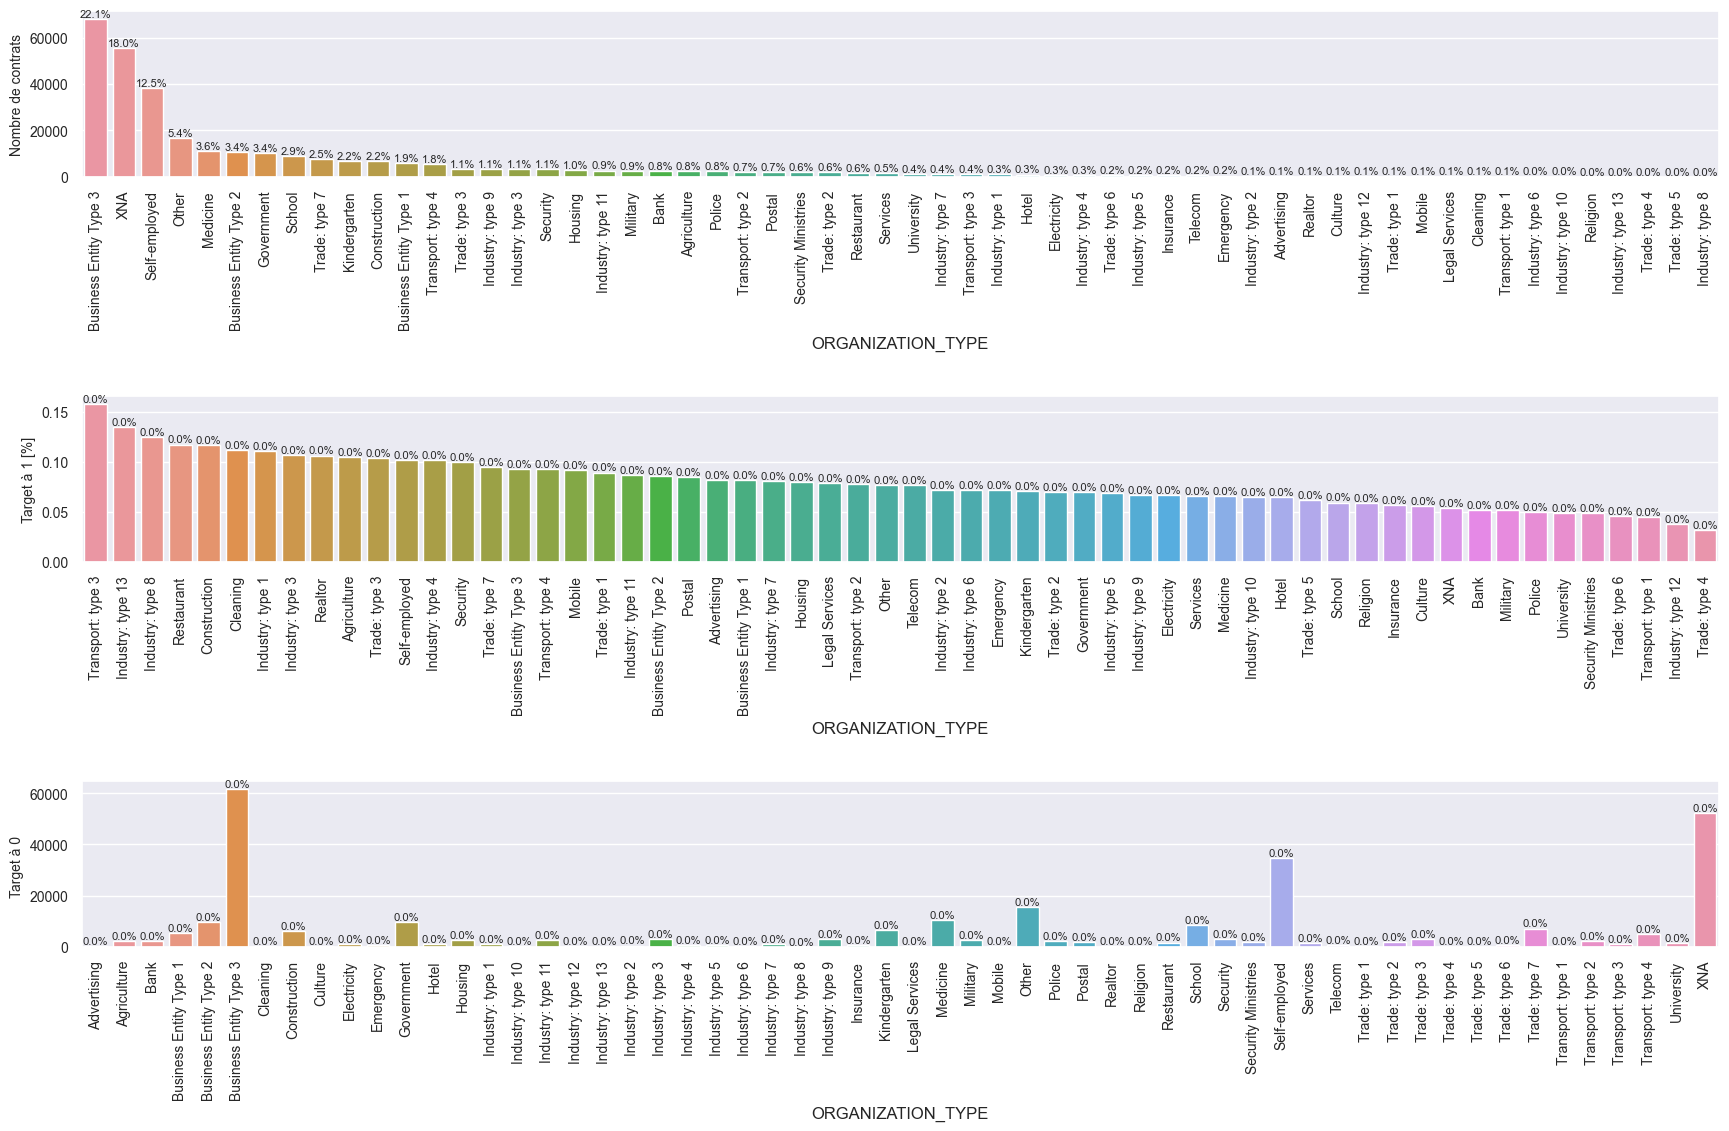

In [111]:
plot_stats('ORGANIZATION_TYPE', label_rotation=True)

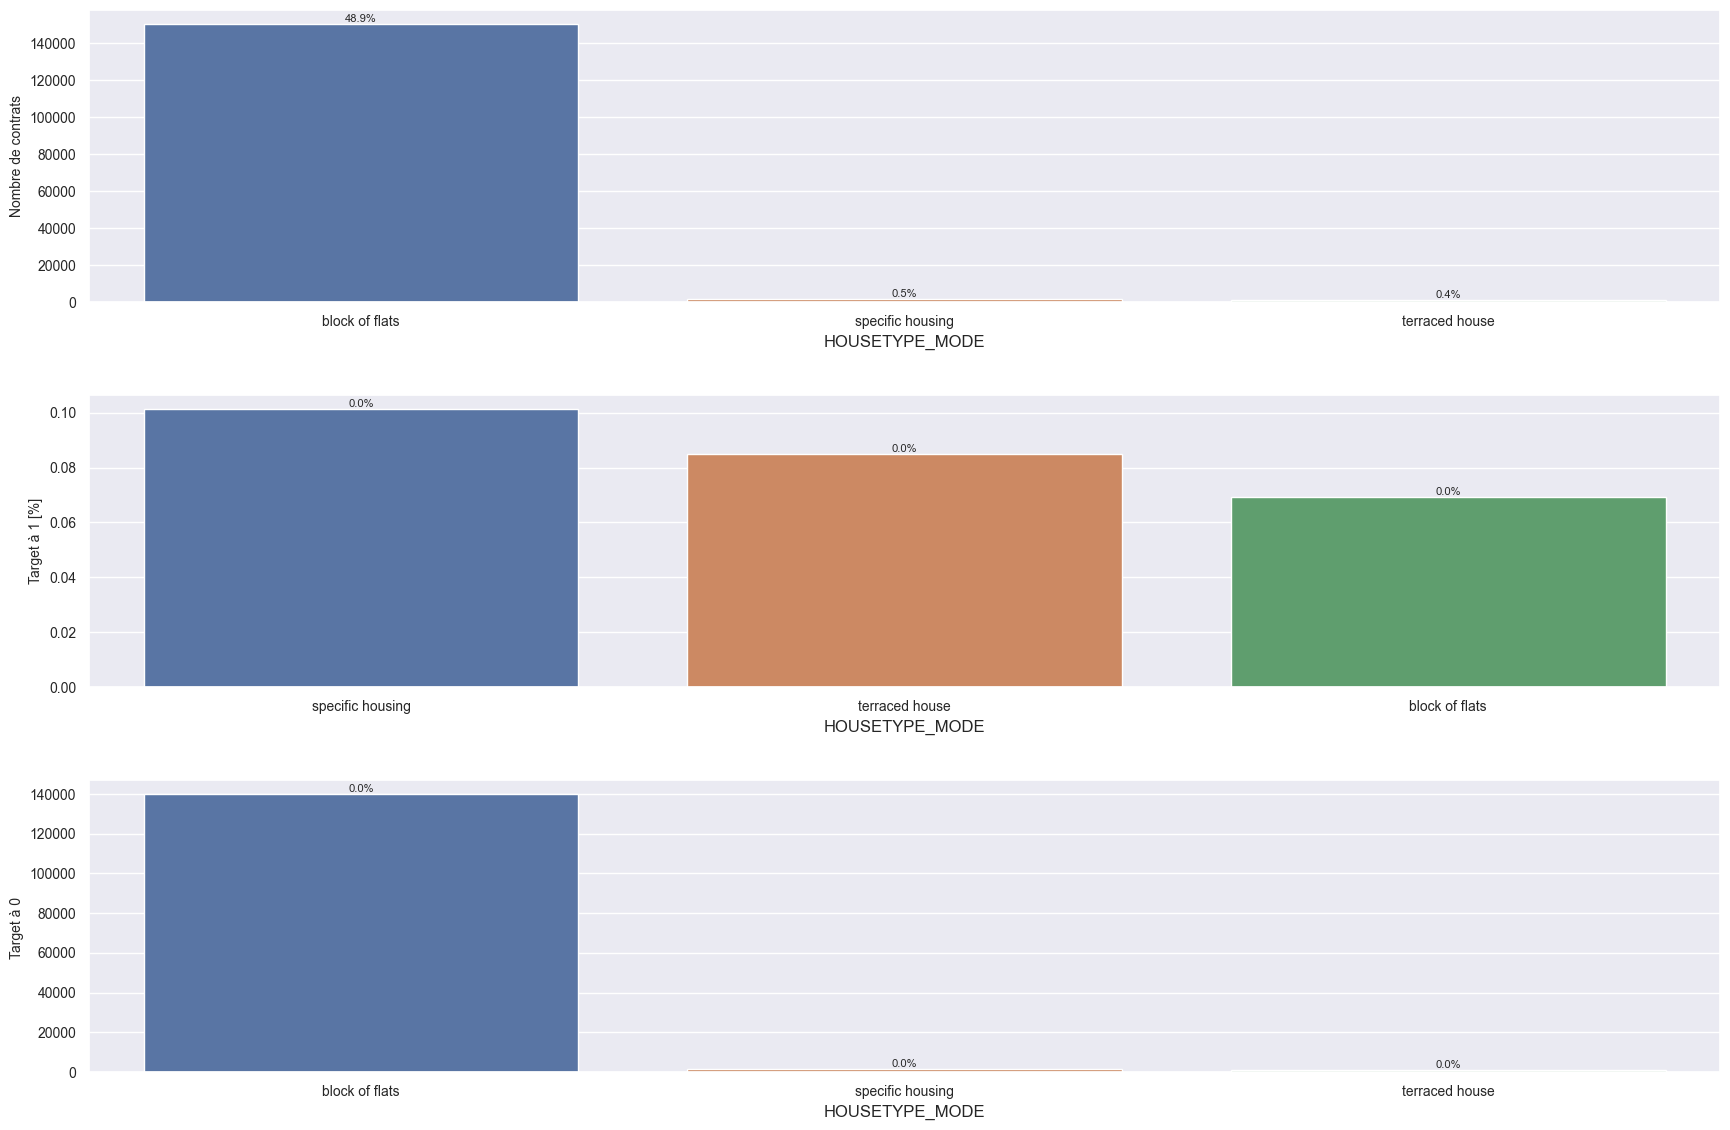

In [112]:
plot_stats('HOUSETYPE_MODE')

## Statistiques générales

In [113]:
# Visualisation des statistiques générales
pd.options.display.max_columns = None
display(app_train.describe().T)

count         mean           std  \
SK_ID_CURR                    307511.0  2.78181e+05  102790.17535   
TARGET                        307511.0  8.07288e-02       0.27242   
CNT_CHILDREN                  307511.0  4.17052e-01       0.72212   
AMT_INCOME_TOTAL              307511.0          NaN           NaN   
AMT_CREDIT                    307511.0          NaN           NaN   
AMT_ANNUITY                   307499.0          NaN           NaN   
AMT_GOODS_PRICE               307233.0          NaN           NaN   
REGION_POPULATION_RELATIVE    307511.0  0.00000e+00       0.00000   
AGE                           307511.0          NaN       0.00000   
DAYS_EMPLOYED                 307511.0 -1.19967e+01      72.58876   
DAYS_REGISTRATION             307511.0          NaN           NaN   
DAYS_ID_PUBLISH               307511.0 -7.76993e-01      73.87814   
OWN_CAR_AGE                   104582.0          NaN       0.00000   
FLAG_MOBIL                    307511.0  9.99997e-01       0.00180   
FLAG_EMP_PHONE                307511.0  8.19889e-01       0.38428   
FLAG_WORK_PHONE               307511.0  1.99368e-01       0.39953   
FLAG_CONT_MOBILE              307511.0  9.98133e-01       0.04316   
FLAG_PHONE                    307511.0  2.81066e-01       0.44952   
FLAG_EMAIL                    307511.0  5.67199e-02       0.23131   
CNT_FAM_MEMBERS               307509.0          NaN       0.00000   
REGION_RATING_CLIENT          307511.0  2.05246e+00       0.50903   
REGION_RATING_CLIENT_W_CITY   307511.0  2.03152e+00       0.50274   
HOUR_APPR_PROCESS_START       307511.0  1.20634e+01       3.26583   
REG_REGION_NOT_LIVE_REGION    307511.0  1.51442e-02       0.12213   
REG_REGION_NOT_WORK_REGION    307511.0  5.07689e-02       0.21953   
LIVE_REGION_NOT_WORK_REGION   307511.0  4.06587e-02       0.19750   
REG_CITY_NOT_LIVE_CITY        307511.0  7.81728e-02       0.26844   
REG_CITY_NOT_WORK_CITY        307511.0  2.30454e-01       0.42112   
LIVE_CITY_NOT_WORK_CITY       307511.0  1.79555e-01       0.38382   
EXT_SOURCE_1                  134133.0          NaN       0.00000   
EXT_SOURCE_2                  306851.0          NaN       0.00000   
EXT_SOURCE_3                  246546.0          NaN       0.00000   
APARTMENTS_AVG                151450.0  0.00000e+00       0.00000   
BASEMENTAREA_AVG              127568.0  0.00000e+00       0.00000   
YEARS_BEGINEXPLUATATION_AVG   157504.0          NaN       0.00000   
YEARS_BUILD_AVG               103023.0          NaN       0.00000   
COMMONAREA_AVG                 92646.0  0.00000e+00       0.00000   
ELEVATORS_AVG                 143620.0  0.00000e+00       0.00000   
ENTRANCES_AVG                 152683.0  0.00000e+00       0.00000   
FLOORSMAX_AVG                 154491.0  0.00000e+00       0.00000   
FLOORSMIN_AVG                  98869.0  0.00000e+00       0.00000   
LANDAREA_AVG                  124921.0  0.00000e+00       0.00000   
LIVINGAPARTMENTS_AVG           97312.0  0.00000e+00       0.00000   
LIVINGAREA_AVG                153161.0  0.00000e+00       0.00000   
NONLIVINGAPARTMENTS_AVG        93997.0  0.00000e+00       0.00000   
NONLIVINGAREA_AVG             137829.0  0.00000e+00       0.00000   
APARTMENTS_MODE               151450.0  0.00000e+00       0.00000   
BASEMENTAREA_MODE             127568.0  0.00000e+00       0.00000   
YEARS_BEGINEXPLUATATION_MODE  157504.0          NaN       0.00000   
YEARS_BUILD_MODE              103023.0          NaN       0.00000   
COMMONAREA_MODE                92646.0  0.00000e+00       0.00000   
ELEVATORS_MODE                143620.0  0.00000e+00       0.00000   
ENTRANCES_MODE                152683.0  0.00000e+00       0.00000   
FLOORSMAX_MODE                154491.0  0.00000e+00       0.00000   
FLOORSMIN_MODE                 98869.0  0.00000e+00       0.00000   
LANDAREA_MODE                 124921.0  0.00000e+00       0.00000   
LIVINGAPARTMENTS_MODE          97312.0  0.00000e+00       0.00000   
LIVINGAREA_MODE               1

## Distribution des variables numérique

In [114]:
cols_num = app_train.select_dtypes(include=[np.number]).columns.tolist()

In [115]:
cols_num


['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'AGE',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE

In [116]:
cols = ['CNT_CHILDREN',
'AMT_INCOME_TOTAL',
'AMT_CREDIT',
'AMT_ANNUITY',
'AMT_GOODS_PRICE',
'CNT_FAM_MEMBERS',
'EXT_SOURCE_1',
'EXT_SOURCE_2',
'EXT_SOURCE_3',
'OBS_30_CNT_SOCIAL_CIRCLE',
'DEF_30_CNT_SOCIAL_CIRCLE',
'OBS_60_CNT_SOCIAL_CIRCLE',
'DEF_60_CNT_SOCIAL_CIRCLE',
'AGE'
]

In [117]:

nan_info = app_train[cols].isna().mean() * 100
nan_info = nan_info.reset_index()
nan_info.columns = ['Column', 'Percentage of NaN']
nan_info = nan_info.sort_values('Percentage of NaN', ascending=False)

print(nan_info)

                      Column  Percentage of NaN
6               EXT_SOURCE_1           56.38107
8               EXT_SOURCE_3           19.82531
9   OBS_30_CNT_SOCIAL_CIRCLE            0.33202
10  DEF_30_CNT_SOCIAL_CIRCLE            0.33202
11  OBS_60_CNT_SOCIAL_CIRCLE            0.33202
12  DEF_60_CNT_SOCIAL_CIRCLE            0.33202
7               EXT_SOURCE_2            0.21463
4            AMT_GOODS_PRICE            0.09040
3                AMT_ANNUITY            0.00390
5            CNT_FAM_MEMBERS            0.00065
0               CNT_CHILDREN            0.00000
1           AMT_INCOME_TOTAL            0.00000
2                 AMT_CREDIT            0.00000
13                       AGE            0.00000


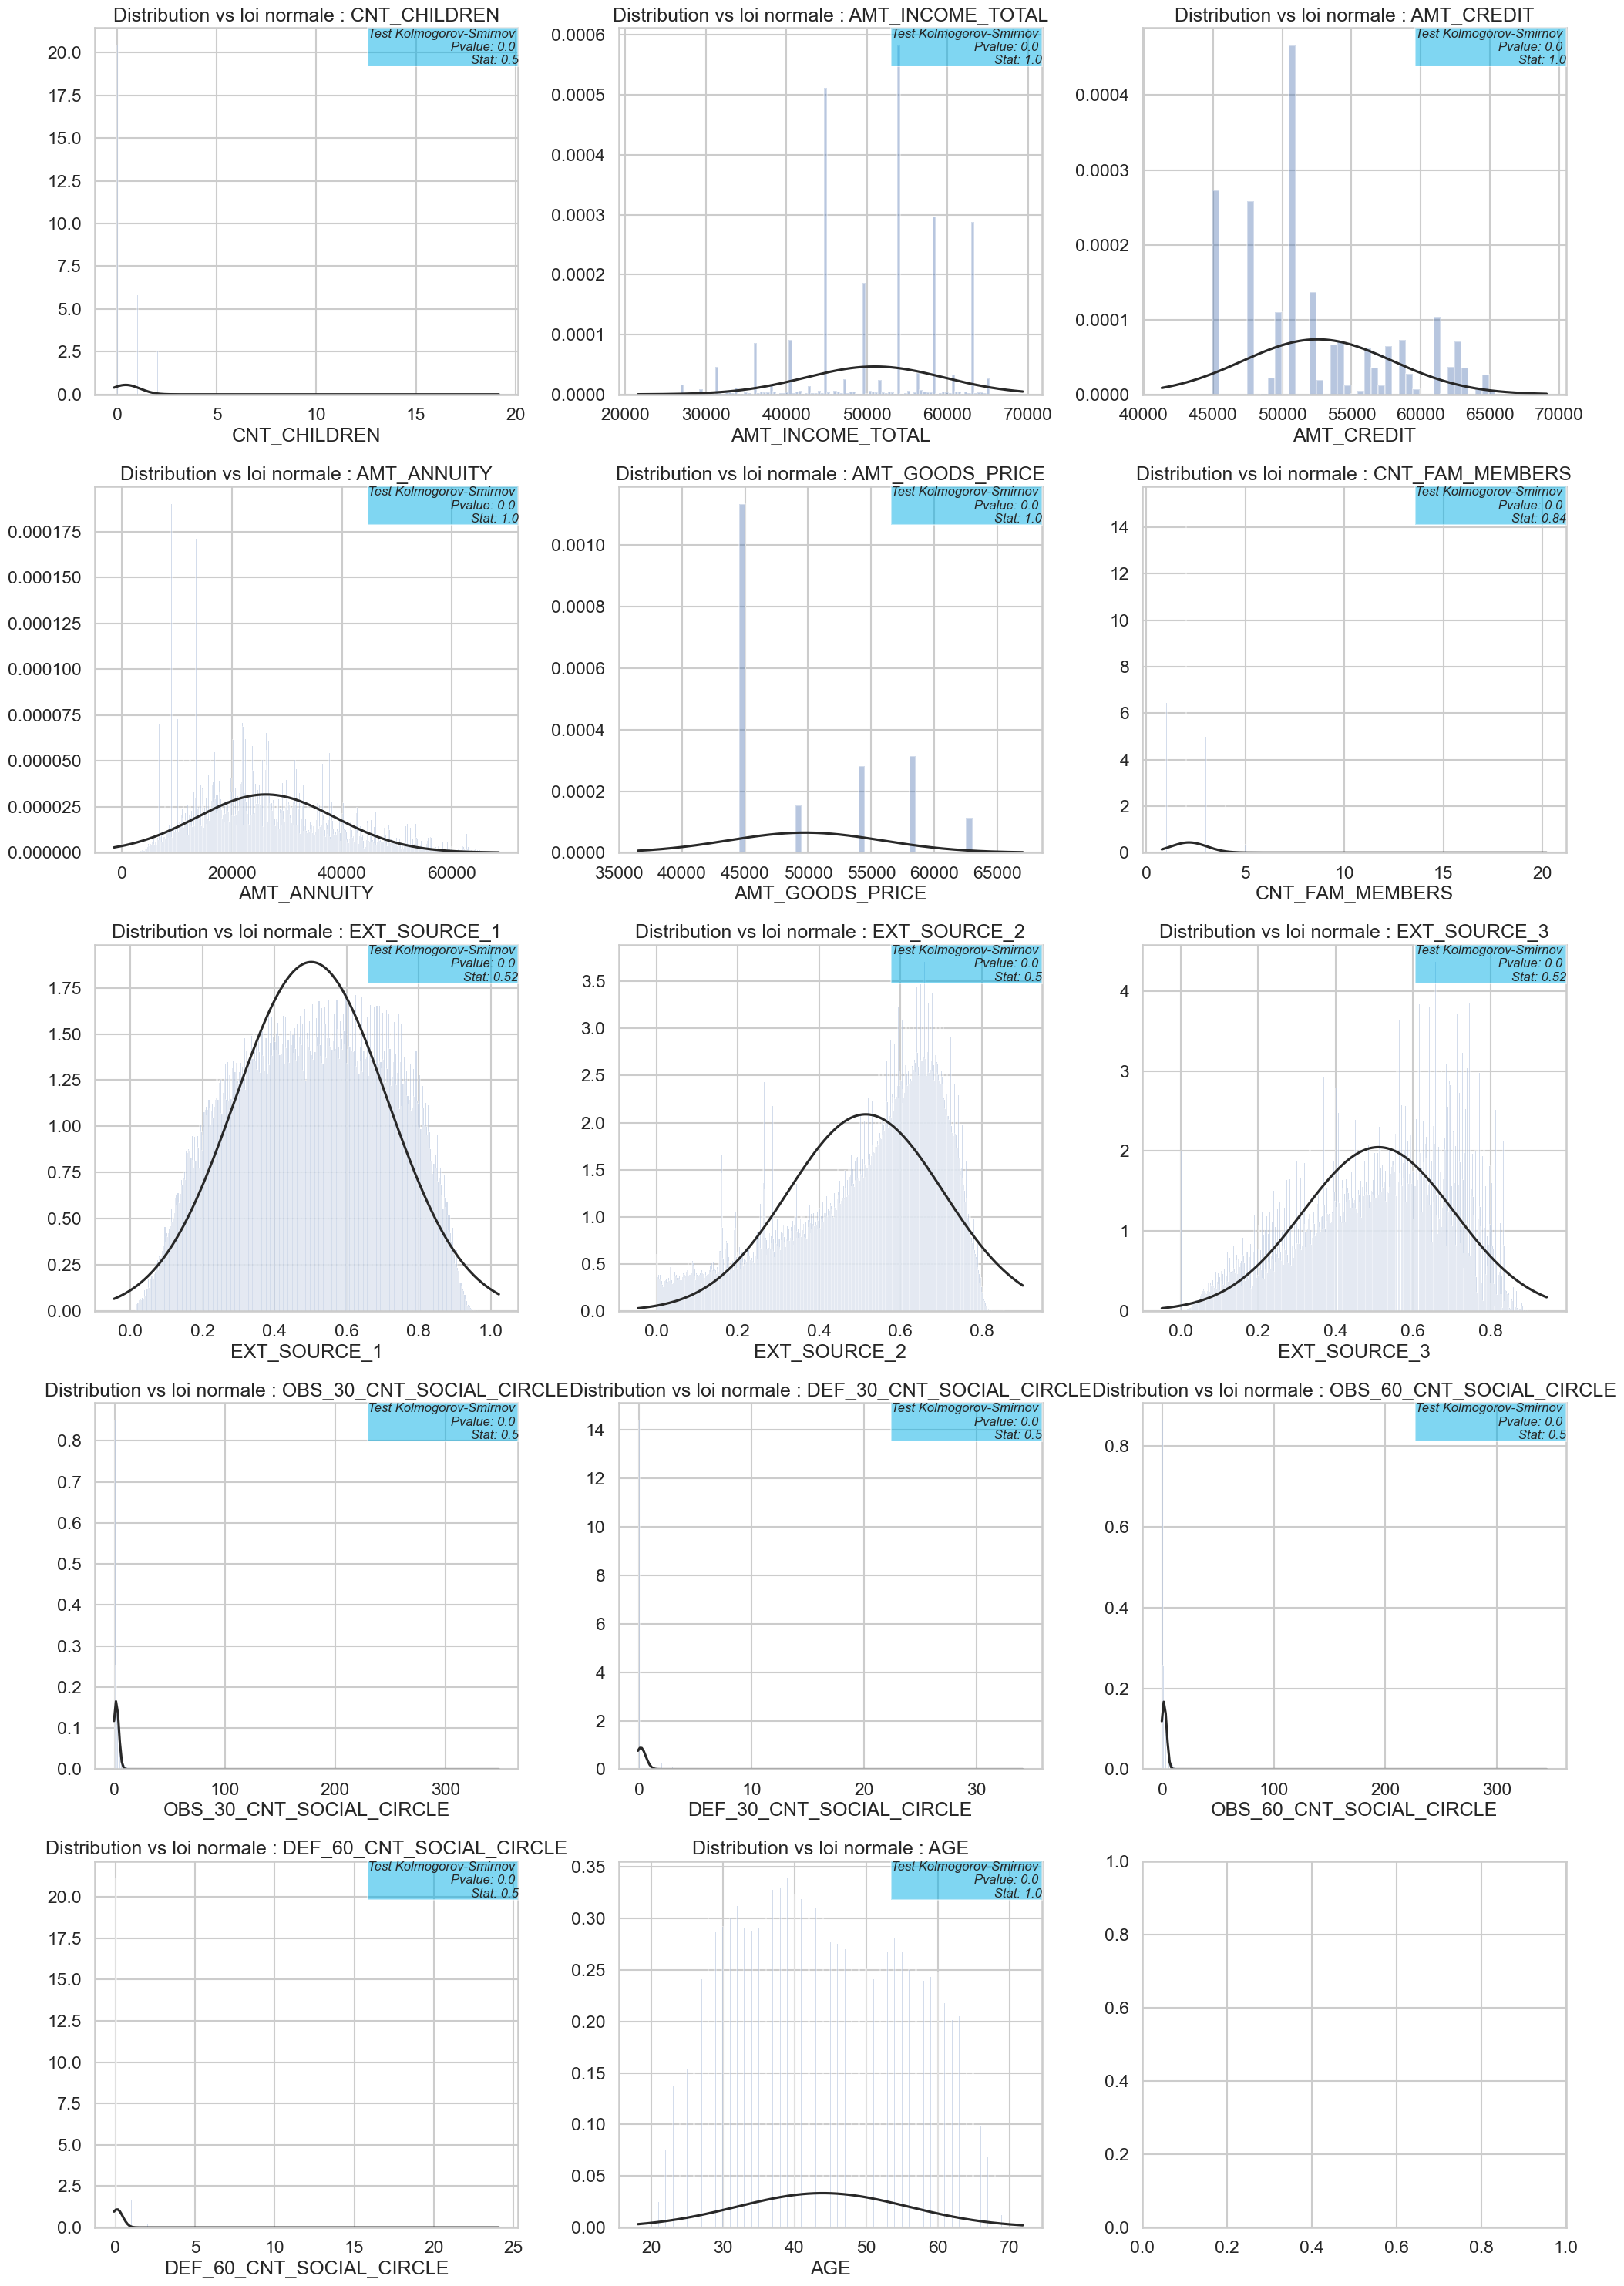

In [118]:
data_subset = app_train[cols]

distribution(data_subset)

In [119]:
data_subset.corr()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                   1.00000           0.00714    -0.02257   
AMT_INCOME_TOTAL               0.00714           1.00000     0.03574   
AMT_CREDIT                    -0.02257           0.03574     1.00000   
AMT_ANNUITY                    0.02422           0.11513     0.35401   
AMT_GOODS_PRICE               -0.02427           0.03477     0.76444   
CNT_FAM_MEMBERS                0.87916          -0.01750    -0.01418   
EXT_SOURCE_1                  -0.13847          -0.02913    -0.03077   
EXT_SOURCE_2                  -0.01801           0.03747    -0.04240   
EXT_SOURCE_3                  -0.04271          -0.02996     0.02160   
OBS_30_CNT_SOCIAL_CIRCLE       0.01559          -0.00270    -0.05872   
DEF_30_CNT_SOCIAL_CIRCLE      -0.00126          -0.00250    -0.01068   
OBS_60_CNT_SOCIAL_CIRCLE       0.01523          -0.00315    -0.05987   
DEF_60_CNT_SOCIAL_CIRCLE      -0.00186          -0.00612    -0.01136   
AGE                           -0.33081          -0.04605     0.04024   

                          AMT_ANNUITY  AMT_GOODS_PRICE  CNT_FAM_MEMBERS  \
CNT_CHILDREN                  0.02422         -0.02427          0.87916   
AMT_INCOME_TOTAL              0.11513          0.03477         -0.01750   
AMT_CREDIT                    0.35401          0.76444         -0.01418   
AMT_ANNUITY                   1.00000          0.41911          0.08073   
AMT_GOODS_PRICE               0.41911          1.00000         -0.01557   
CNT_FAM_MEMBERS               0.08073         -0.01557          1.00000   
EXT_SOURCE_1                  0.10387         -0.00037         -0.09657   
EXT_SOURCE_2                  0.11470         -0.01965         -0.00182   
EXT_SOURCE_3                  0.01522         -0.01471         -0.02796   
OBS_30_CNT_SOCIAL_CIRCLE     -0.00471         -0.01236          0.02532   
DEF_30_CNT_SOCIAL_CIRCLE     -0.01772         -0.00165         -0.00265   
OBS_60_CNT_SOCIAL_CIRCLE     -0.00439         -0.01323          0.02497   
DEF_60_CNT_SOCIAL_CIRCLE     -0.01974         -0.01024         -0.00475   
AGE                          -0.01460          0.01197         -0.27875   

                          EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
CNT_CHILDREN                  -0.13847      -0.01801      -0.04271   
AMT_INCOME_TOTAL              -0.02913       0.03747      -0.02996   
AMT_CREDIT                    -0.03077      -0.04240       0.02160   
AMT_ANNUITY                    0.10387       0.11470       0.01522   
AMT_GOODS_PRICE               -0.00037      -0.01965      -0.01471   
CNT_FAM_MEMBERS               -0.09657      -0.00182      -0.02796   
EXT_SOURCE_1                   1.00000       0.21398       0.18684   
EXT_SOURCE_2                   0.21398       1.00000       0.10917   
EXT_SOURCE_3                   0.18684       0.10917       1.00000   
OBS_30_CNT_SOCIAL_CIRCLE      -0.02579      -0.01924      -0.00042   
DEF_30_CNT_SOCIAL_CIRCLE      -0.02875      -0.03041      -0.03625   
OBS_60_CNT_SOCIAL_CIRCLE      -0.02535      -0.01888      -0.00072   
DEF_60_CNT_SOCIAL_CIRCLE      -0.03051      -0.03234      -0.03410   
AGE                            0.60033       0.09199       0.20549   

                          OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
CNT_CHILDREN                               0.01559                  -0.00126   
AMT_INCOME_TOTAL                          -0.00270                  -0.00250   
AMT_CREDIT                                -0.05872                  -0.01068   
AMT_ANNUITY                               -0.00471                  -0.01772   
AMT_GOODS_PRICE                           -0.01236                  -0.00165   
CNT_FAM_MEMBERS                            0.02532                  -0.00265   
EXT_SOURCE_1                              -0.02579                  -0.02875   
EXT_SOURCE_2                              -0.01924                  -0.03041   
EXT_SOURCE_3                              -0.000

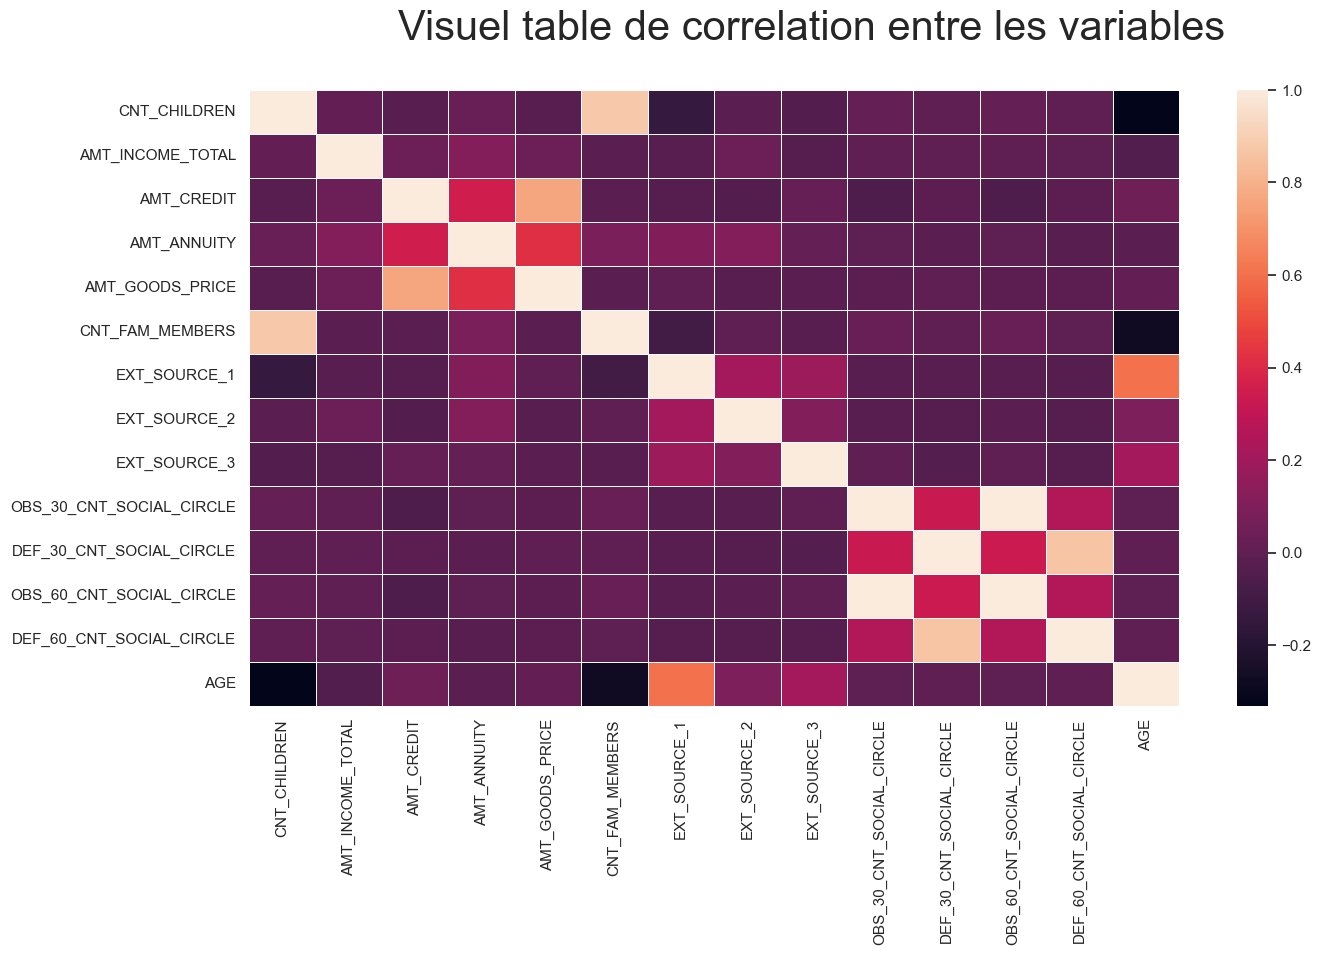

In [120]:
#On donne un aspect graphique à nos valeurs de corrélation
fig = plt.figure(figsize=(15,8))
fig.suptitle('Visuel table de correlation entre les variables', fontsize=30)

data_subset.corr()
sns.set(font_scale=1)
ax = sns.heatmap(data_subset.corr(), linewidths=.5)

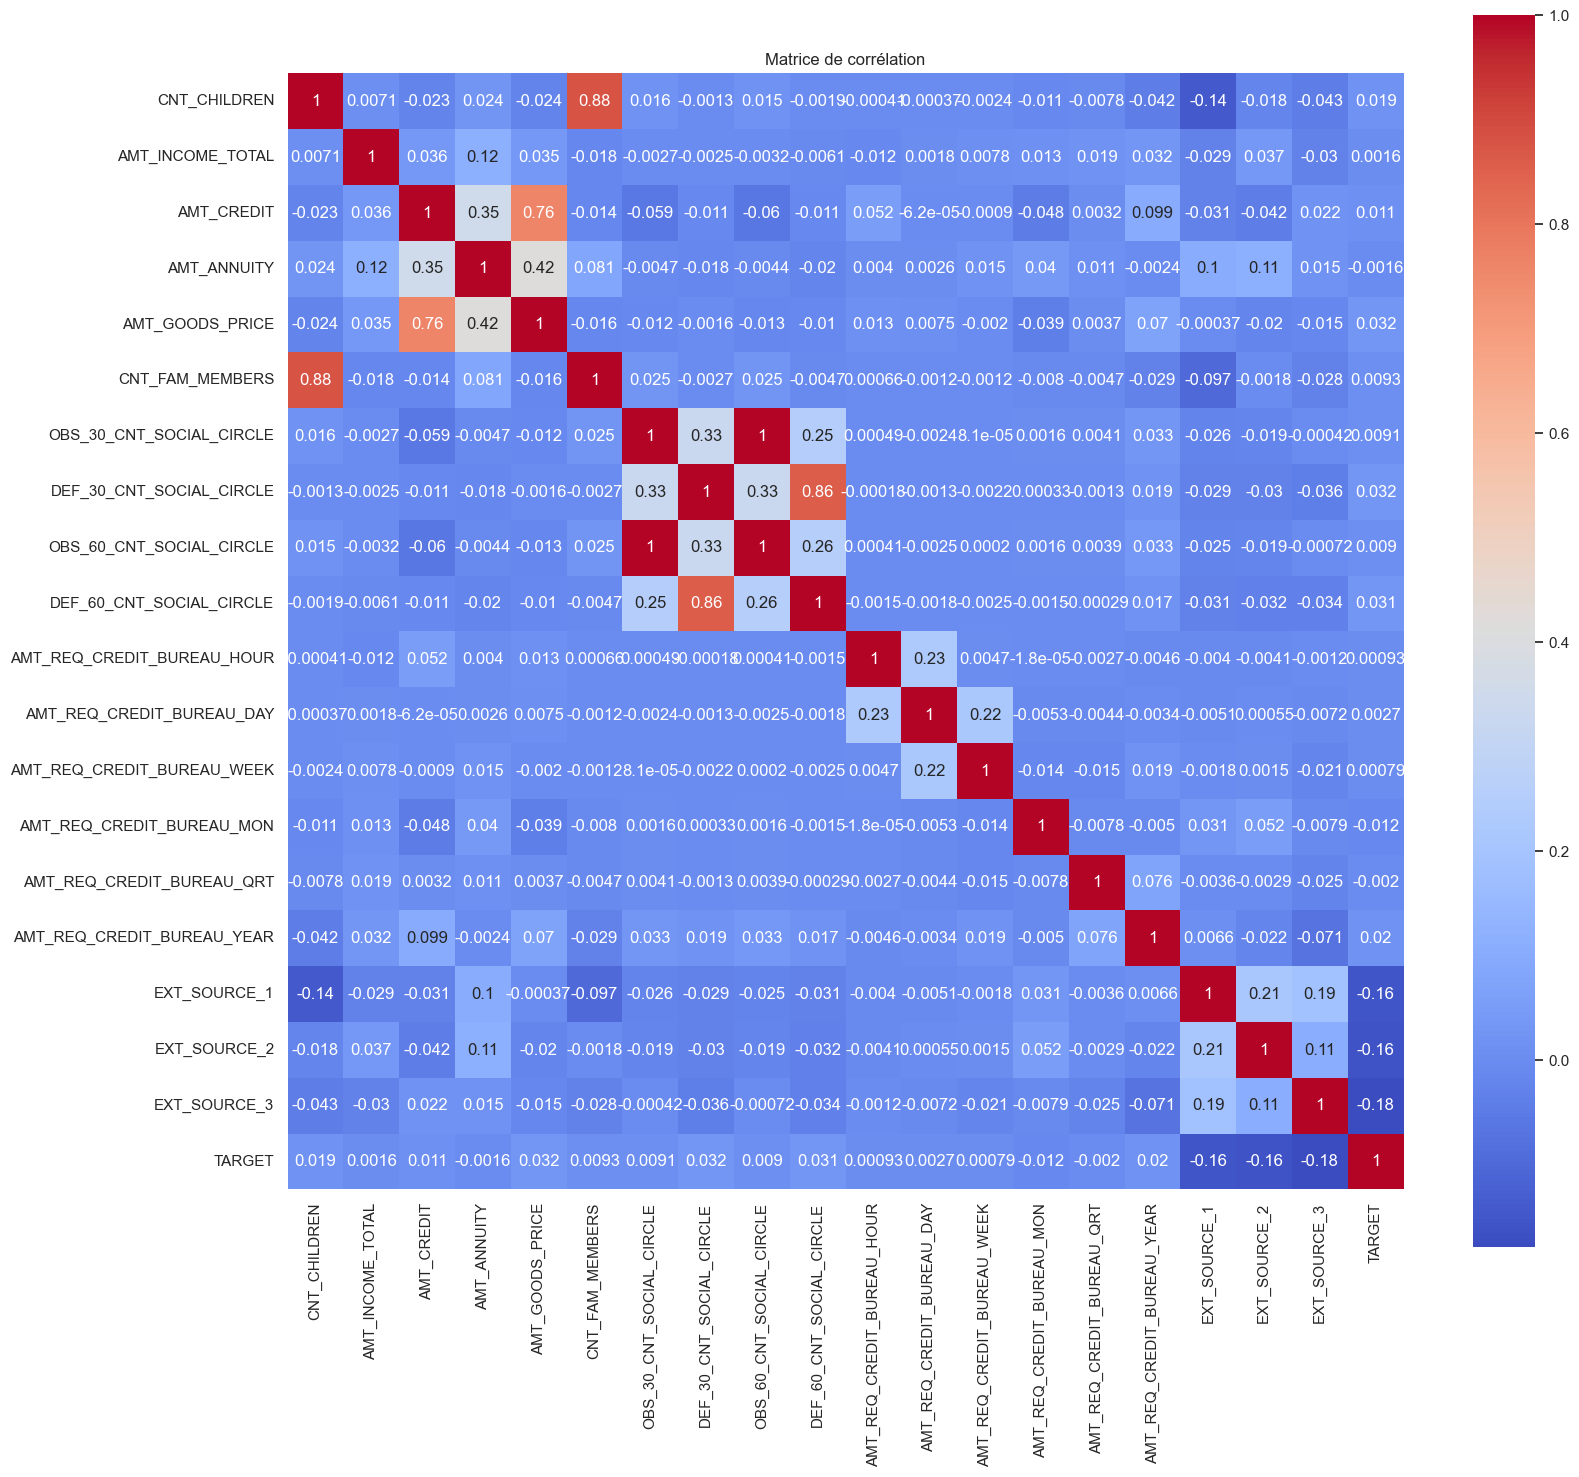

In [121]:
# Sélection des colonnes spécifiées
cols = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS',
        'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
        'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
        'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
        'AMT_REQ_CREDIT_BUREAU_YEAR', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

target = 'TARGET'

data_subset = app_train[cols + [target]]

# Calcul de la matrice de corrélation
correlation_matrix = data_subset.corr()

# Affichage de la matrice de corrélation avec heatmap
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Matrice de corrélation")
plt.show()

In [122]:
# Calculer la matrice de corrélation
correlation_matrix = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AGE', 'TARGET']].corr()

print(correlation_matrix)


              EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3      AGE   TARGET
EXT_SOURCE_1       1.00000       0.21398       0.18684  0.60033 -0.15532
EXT_SOURCE_2       0.21398       1.00000       0.10917  0.09199 -0.16047
EXT_SOURCE_3       0.18684       0.10917       1.00000  0.20549 -0.17892
AGE                0.60033       0.09199       0.20549  1.00000 -0.07826
TARGET            -0.15532      -0.16047      -0.17892 -0.07826  1.00000


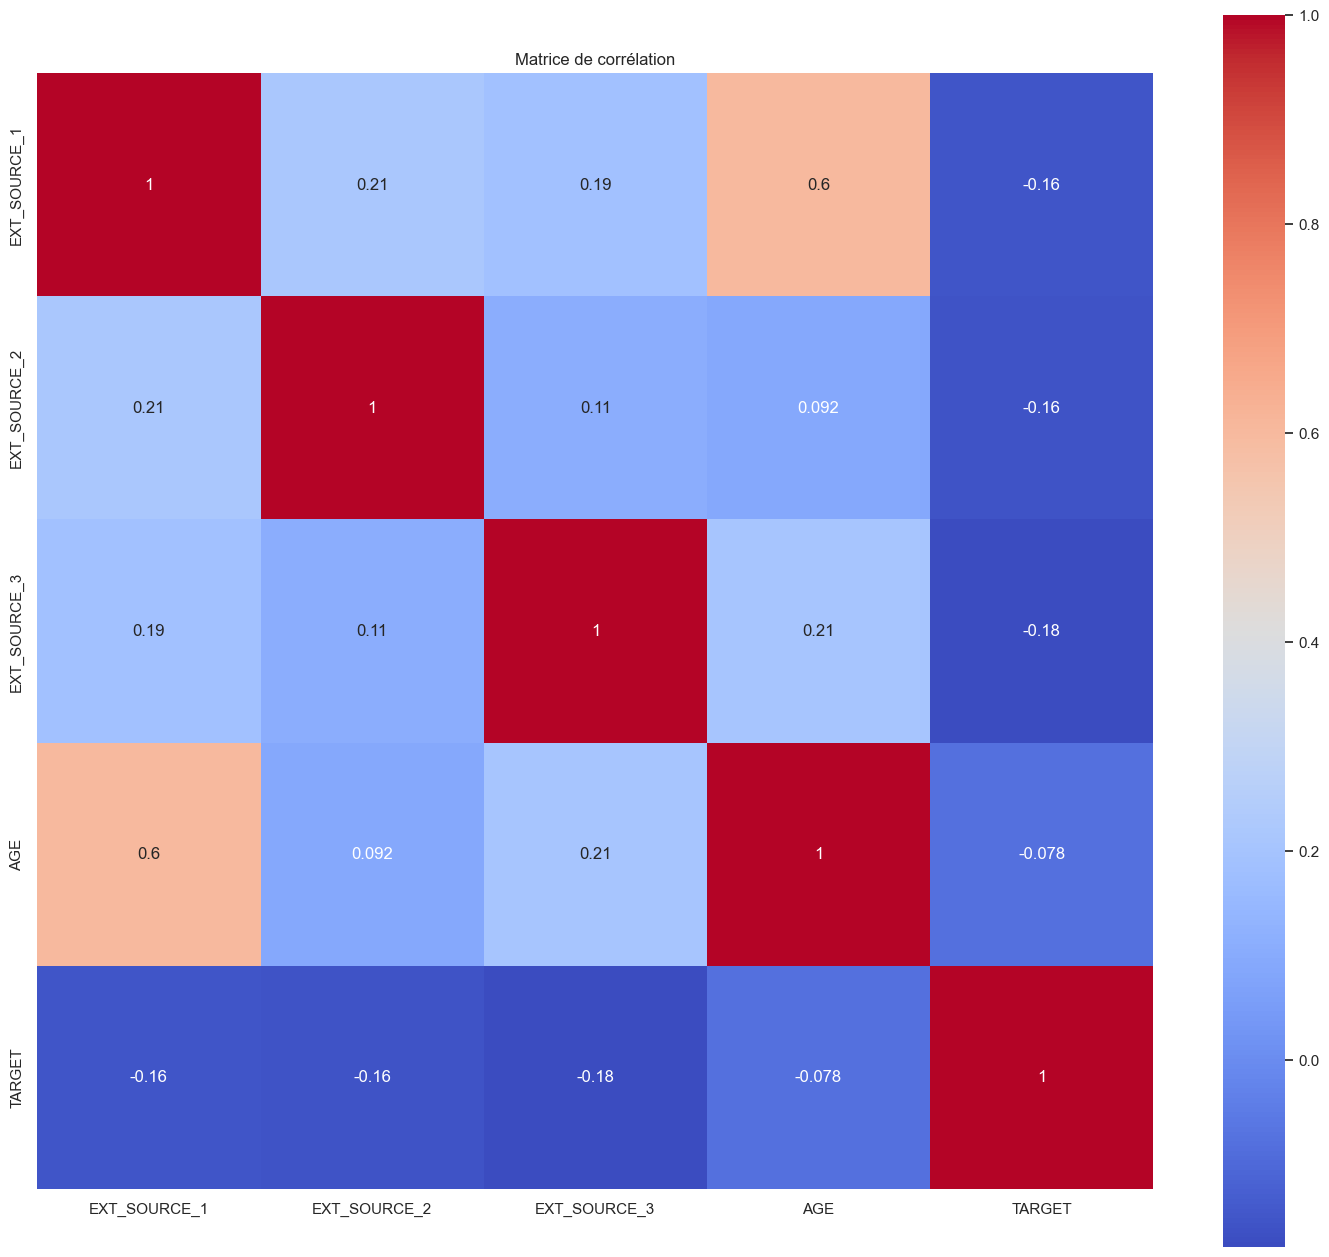

In [123]:
# Affichage de la matrice de corrélation avec heatmap
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Matrice de corrélation")
plt.show()

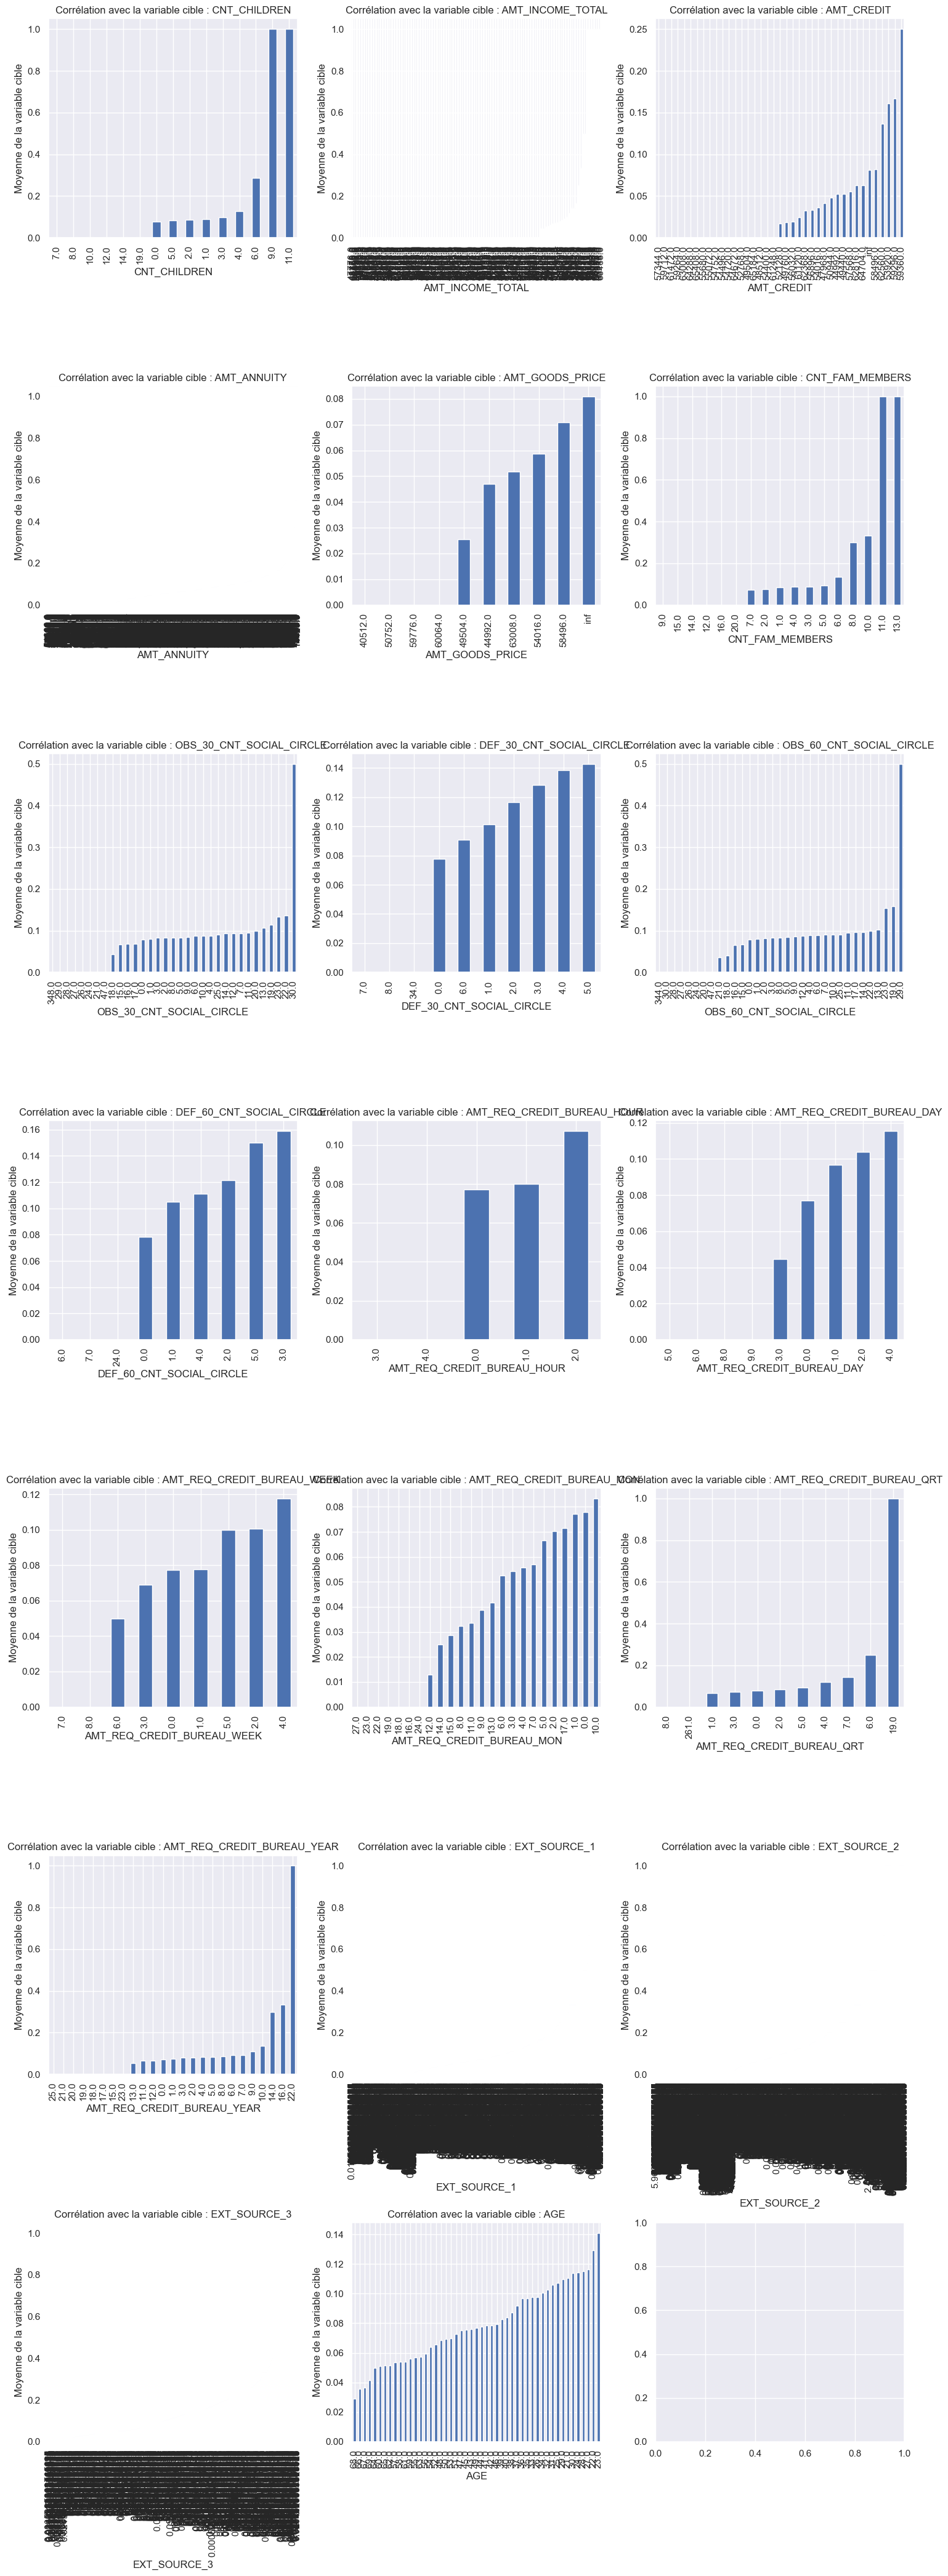

In [124]:
import matplotlib.pyplot as plt

# Sélection des colonnes spécifiées
cols = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS',
        'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
        'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
        'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
        'AMT_REQ_CREDIT_BUREAU_YEAR', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AGE']

target = 'TARGET'

# Conversion des index en type de données approprié
app_train = app_train.astype({col: 'float64' for col in cols})

# Création d'une figure en barres pour chaque colonne
fig, axes = plt.subplots(nrows=int(np.ceil(len(cols) / 3)), ncols=3, figsize=(15, 6 * int(np.ceil(len(cols) / 3))))
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = axes[i]
    grouped_data = app_train.groupby(col)[target].mean().sort_values()
    grouped_data.plot(kind='bar', ax=ax)
    ax.set_title("Corrélation avec la variable cible : {}".format(col))
    ax.set_xlabel(col)
    ax.set_ylabel("Moyenne de la variable cible")

fig.tight_layout()
plt.show()


In [125]:
app_test.to_csv('/Users/xparisot/Formation_OpenClassRoom/Projets/Projet_7/datasets/data_app_test.csv', index=False)
app_train.to_csv('/Users/xparisot/Formation_OpenClassRoom/Projets/Projet_7datasets//data_app_train.csv', index=False)
balance.to_csv('/Users/xparisot/Formation_OpenClassRoom/Projets/Projet_7/datasets/data_balance.csv', index=False)
bureau.to_csv('/Users/xparisot/Formation_OpenClassRoom/Projets/Projet_7/datasets/data_bureau.csv', index=False)
cc_balance.to_csv('/Users/xparisot/Formation_OpenClassRoom/Projets/Projet_7/datasets/data_cc_balance.csv', index=False)
installmnt.to_csv('/Users/xparisot/Formation_OpenClassRoom/Projets/Projet_7/datasets/data_installmnt.csv', index=False)
POS.to_csv('/Users/xparisot/Formation_OpenClassRoom/Projets/Projet_7/datasets/data_POS.csv', index=False)
prv_app.to_csv('/Users/xparisot/Formation_OpenClassRoom/Projets/Projet_7/datasets/data_prv_app.csv', index=False)
sample.to_csv('/Users/xparisot/Formation_OpenClassRoom/Projets/Projet_7/datasets/data_sample.csv', index=False)